# Import Liabiries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 300
sns.set_theme(style='darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Read Data Frame

In [2]:
df = pd.read_csv("adult_with_headers.csv")
df

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

# Describing the data

In [3]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [4]:
df.describe(include= object)

workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Duplicates

In [7]:
df.duplicated().sum()

24

# Print the duplicated values

In [8]:
df[df.duplicated()]

age          workclass  fnlwgt      education  education_num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th              2   
22367   44            Private  367749      Bachelors             13   
22494   49   Self-emp-not-inc   43479   Some-college             10   
25872   23            Private  240137        5th-6th              3   
26313   28            Private  274679        Masters             14   
28230   27            Private  255582        HS-grad              9   
28522   42            Private  204235   Some-college             10   
28846   39            Private   30916        HS-grad              9   
29157   38            Private  207202        HS-grad              9   
30845   46            Private  133616   Some-college             10   
31993   19            Private  251579   Some-college             10   
32404   35            Private  379959        HS-grad              9   

            marital_status          occupation    relationship  \
4881         Never-married        Craft-repair   Not-in-family   
5104         Never-married       Other-service   Not-in-family   
9171         Never-married      Prof-specialty       Own-child   
11631        Never-married        Tech-support   Not-in-family   
13084        Never-married     Priv-house-serv   Not-in-family   
15059        Never-married     Farming-fishing   Not-in-family   
17040   Married-civ-spouse        Craft-repair         Husband   
18555        Never-married       Other-service   Not-in-family   
18698        Never-married     Farming-fishing   Not-in-family   
21318        Never-married        Adm-clerical       Own-child   
21490        Never-married     Exec-managerial       Own-child   
21875   Married-civ-spouse        Craft-repair         Husband   
22300        Never-married     Priv-house-serv   Not-in-family   
22367        Never-married      Prof-specialty   Not-in-family   
22494   Married-civ-spouse        Craft-repair         Husband   
25872        Never-married   Handlers-cleaners   Not-in-family   
26313        Never-married      Prof-specialty   Not-in-family   
28230        Never-married   Machine-op-inspct   Not-in-family   
28522   Married-civ-spouse      Prof-specialty         Husband   
28846   Married-civ-spouse        Craft-repair         Husband   
29157   Married-civ-spouse   Machine-op-inspct         Husband   
30845             Divorced        Adm-clerical       Unmarried   
31993        Never-married       Other-service       Own-child   
32404             Divorced       Other-service   Not-in-family   

                      race      sex  capital_gain  capital_loss  \
4881                 White     Male             0             0   
5104    Asian-Pac-Islander     Male             0             0   
9171                 White   Female             0             0   
11631                White   Female             0             0   
13084                White   Female             0             0   
15059                White     Male             0             0   
17040                White     Male             0             0   
18555                Black     Male         

In [9]:
df[df.duplicated(keep = False)]

age          workclass  fnlwgt      education  education_num  \
2303    90            Private   52386   Some-college             10   
3917    19            Private  251579   Some-college             10   
4325    25            Private  308144      Bachelors             13   
4767    21            Private  250051   Some-college             10   
4881    25            Private  308144      Bachelors             13   
4940    38            Private  207202        HS-grad              9   
5104    90            Private   52386   Some-college             10   
5579    27            Private  255582        HS-grad              9   
5805    20            Private  107658   Some-college             10   
5842    25            Private  195994        1st-4th              2   
6990    19            Private  138153   Some-college             10   
7053    49   Self-emp-not-inc   43479   Some-college             10   
7920    49            Private   31267        7th-8th              4   
8080    21            Private  243368      Preschool              1   
8679    28            Private  274679        Masters             14   
9171    21            Private  250051   Some-college             10   
10367   42            Private  204235   Some-college             10   
11631   20            Private  107658   Some-college             10   
11965   46            Private  133616   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
15189   19            Private  146679   Some-college             10   
16297   46            Private  173243        HS-grad              9   
16846   35            Private  379959        HS-grad              9   
16975   30            Private  144593        HS-grad              9   
17040   46            Private  173243        HS-grad              9   
17673   19            Private   97261        HS-grad              9   
17916   44            Private  367749      Bachelors             13   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21103   23            Private  240137        5th-6th              3   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th              2   
22367   44            Private  367749      Bachelors             13   
22494   49   Self-emp-not-inc   43479   Some-college             10   
25624   39            Private   30916        HS-grad              9   
25872   23            Private  240137        5th-6th              3   
26313   28            Private  274679        Masters             14   
28230   27            Private  255582        HS-grad              9   
28522   42            Private  204235   Some-college             10   
28846   39            Private   30916        HS-grad              9   
29157   38            Private  207202        HS-grad              9   
30845   46            Private  133616   Some-college             10   
31993   19            Private  251579   Some-college             10   
32404   35            Private  379959        HS-grad              9   

            marital_status          occupation    relationship  \
2303         Never-married       Other-service   Not-in-family   
3917         Never-married       Other-service       Own-child   
4325         Never-married        Craft-repair   Not-in-family   
4767         Never-married      Prof-specialty       Own-child   
4881         Never-married        Craft-repair   Not-in-family   
4940    Married-civ-spouse   Machine-op-inspct         Husband   
5104         Never-married       Other-service   Not-in-family   
5579         Never-married   Machine-op-inspct   Not-in-family   
5805

# Drop Duplicated records

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(32537, 15)

In [12]:
df.duplicated().sum()

0

# Missing value imputation
- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
- Incomplete data entry
- Issues with machines
- Improper handling of data
- And many more.

# Checking null values

In [13]:
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Visualizing missing values

<Axes: >

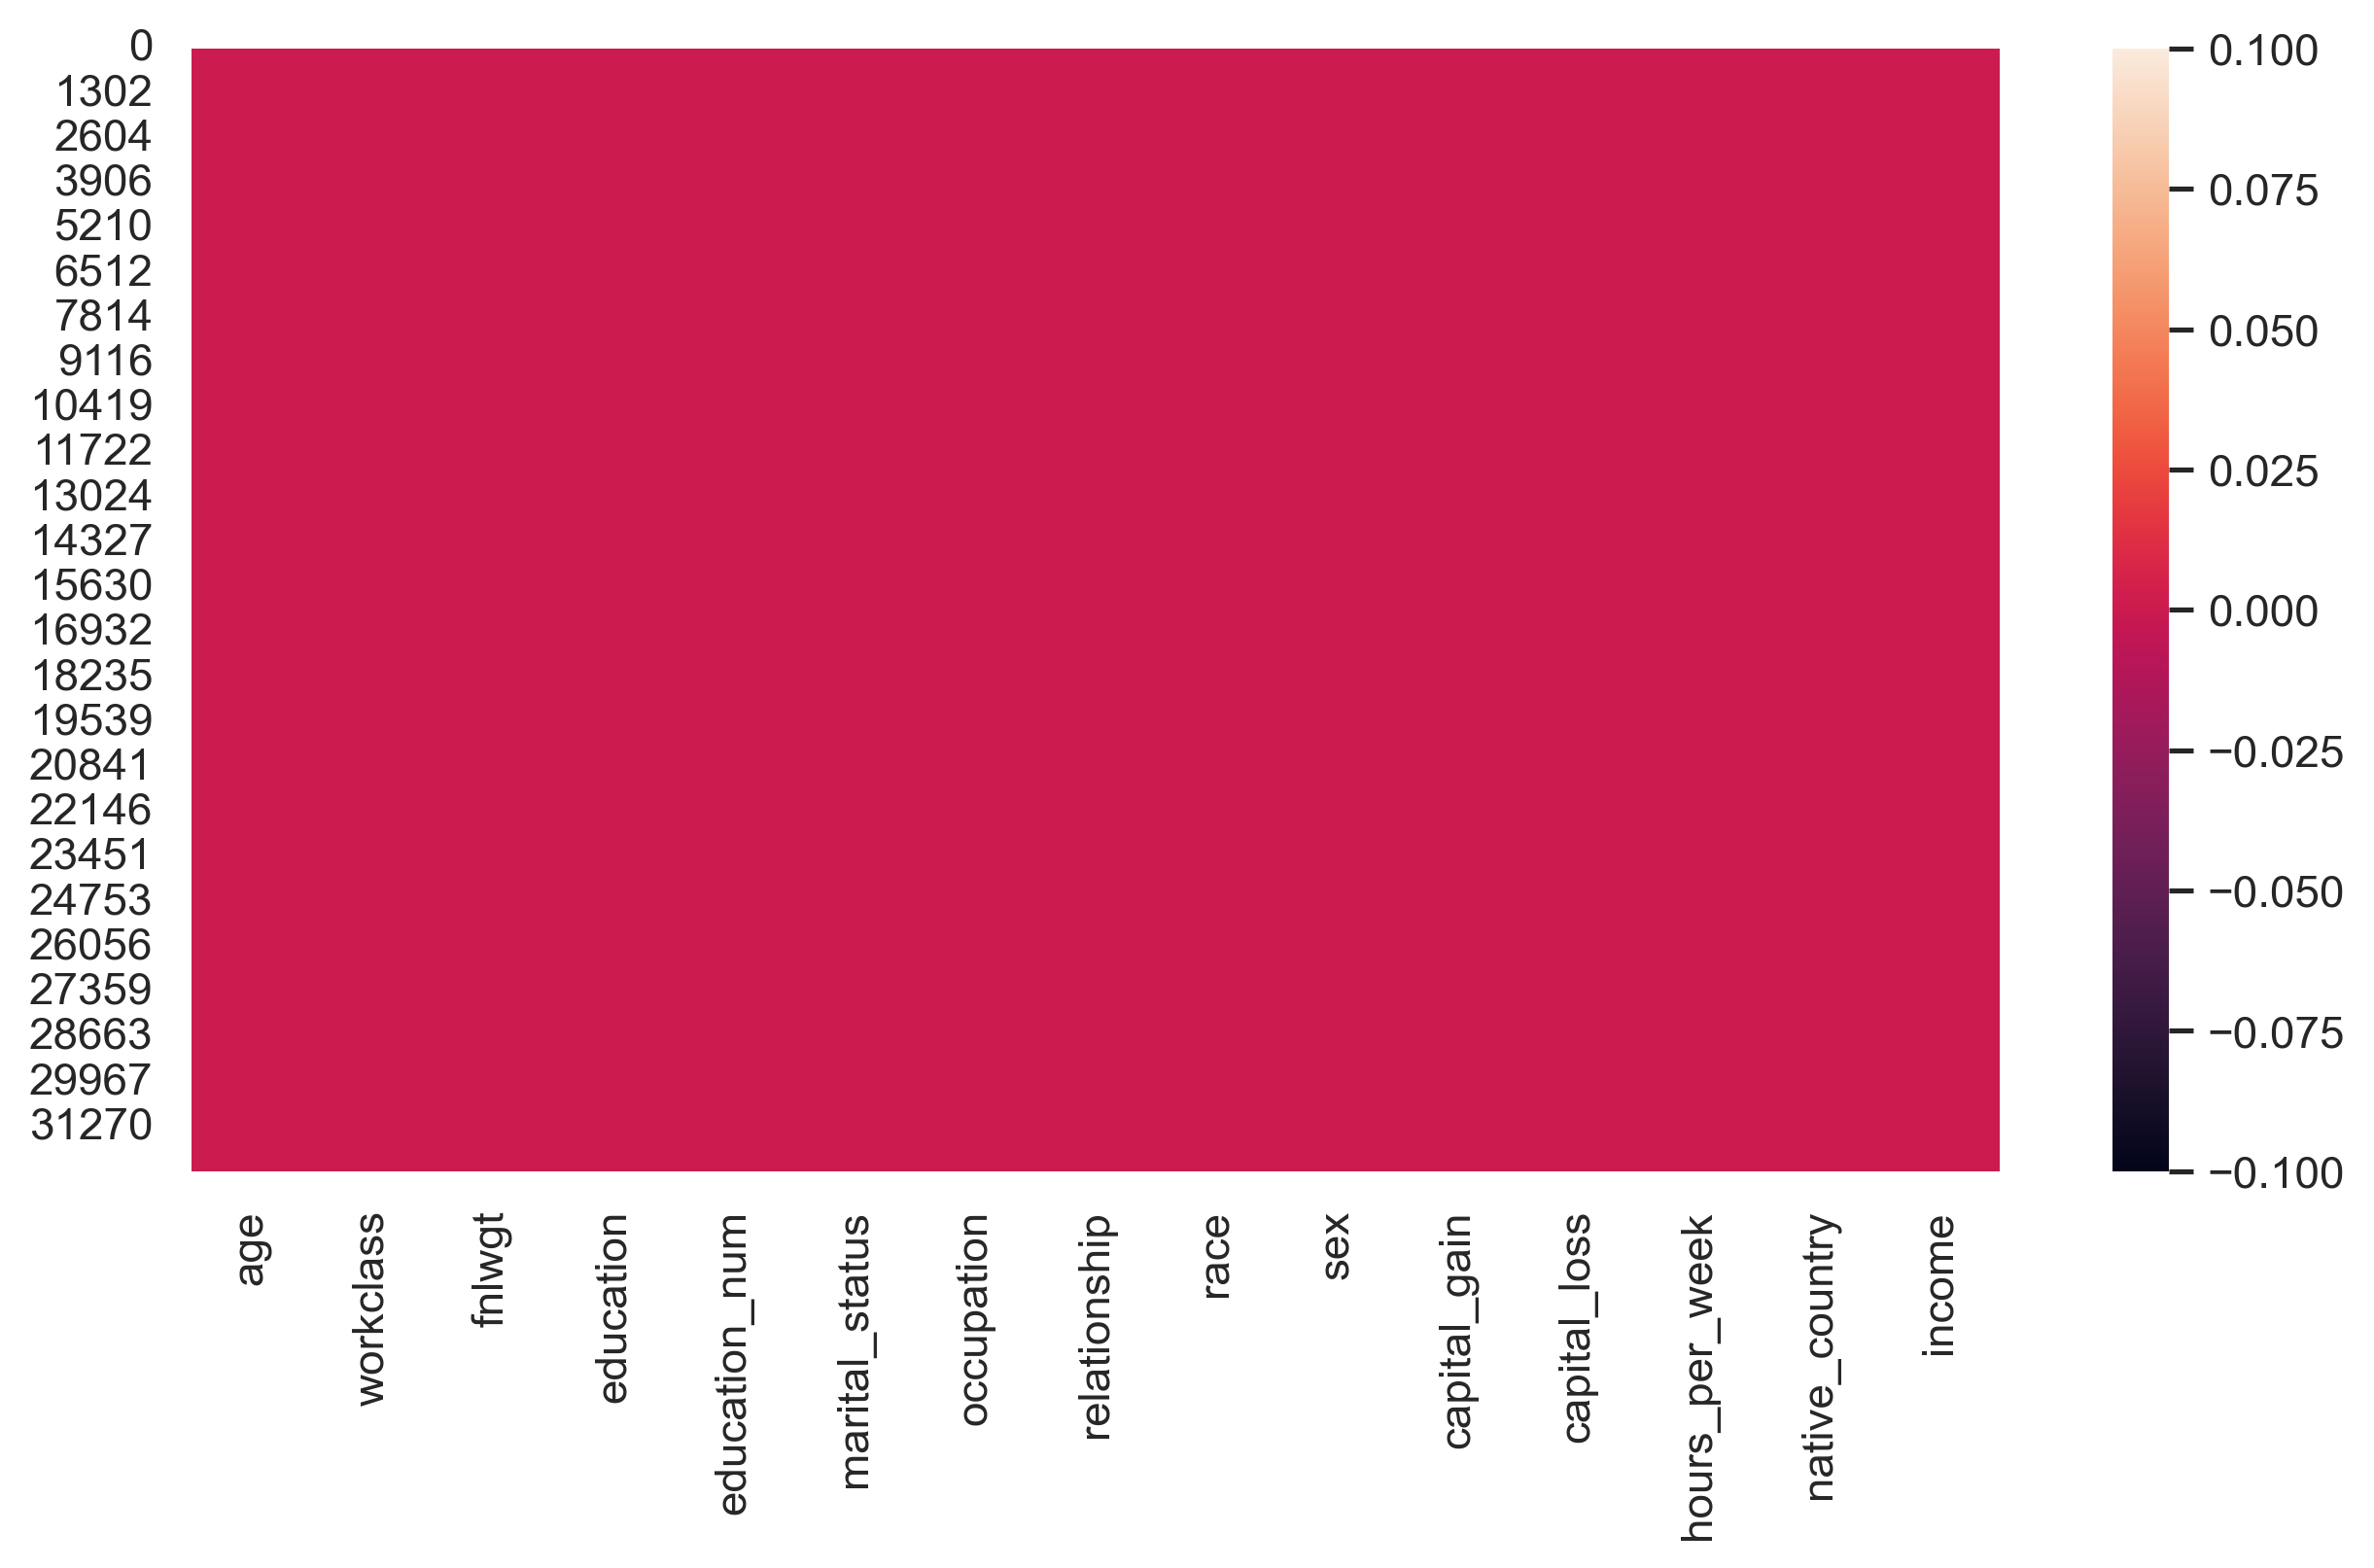

In [15]:
sns.heatmap(df.isnull())

# Outlier detection
- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [16]:
df.describe(include=object)

workclass education       marital_status       occupation relationship  \
count      32537     32537                32537            32537        32537   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22673     10494                14970             4136        13187   

          race    sex  native_country  income  
count    32537  32537           32537   32537  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27795  21775           29153   24698

In [17]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32537.000000  3.253700e+04   32537.000000  32537.000000  32537.000000   
mean      38.585549  1.897808e+05      10.081815   1078.443741     87.368227   
std       13.637984  1.055565e+05       2.571633   7387.957424    403.101833   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369930e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32537.000000  
mean        40.440329  
std         12.346889  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

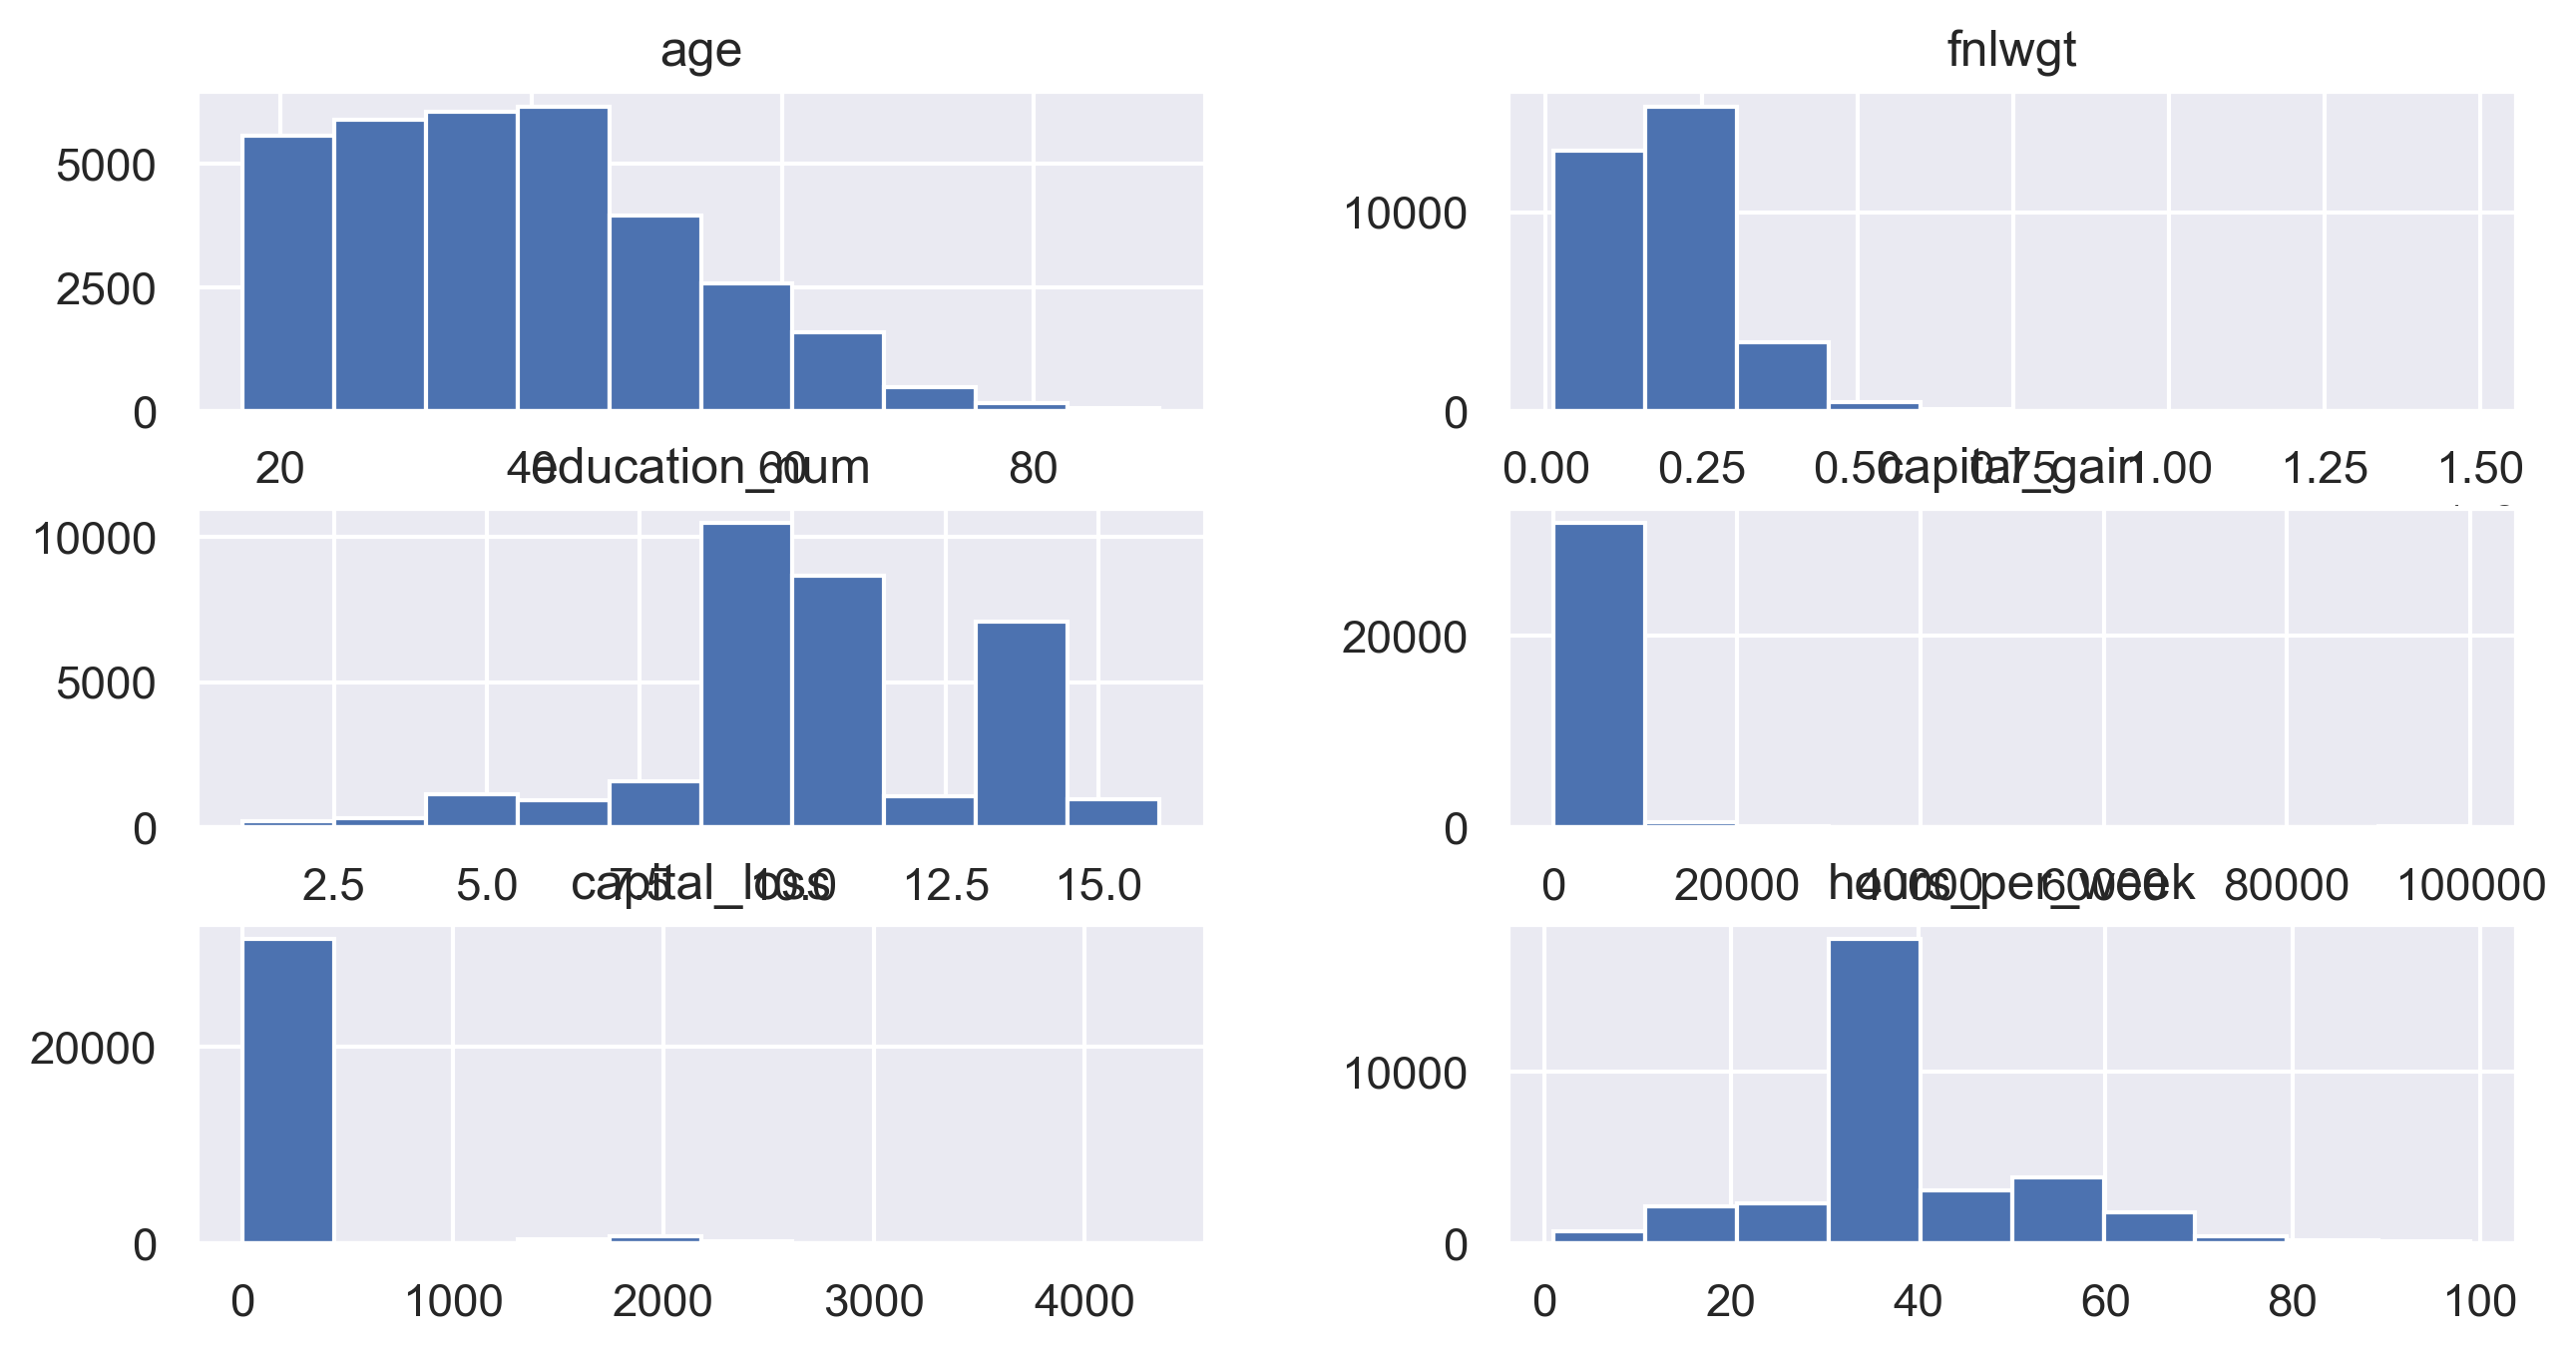

In [18]:
df.hist()
plt.tight_layout

<Axes: >

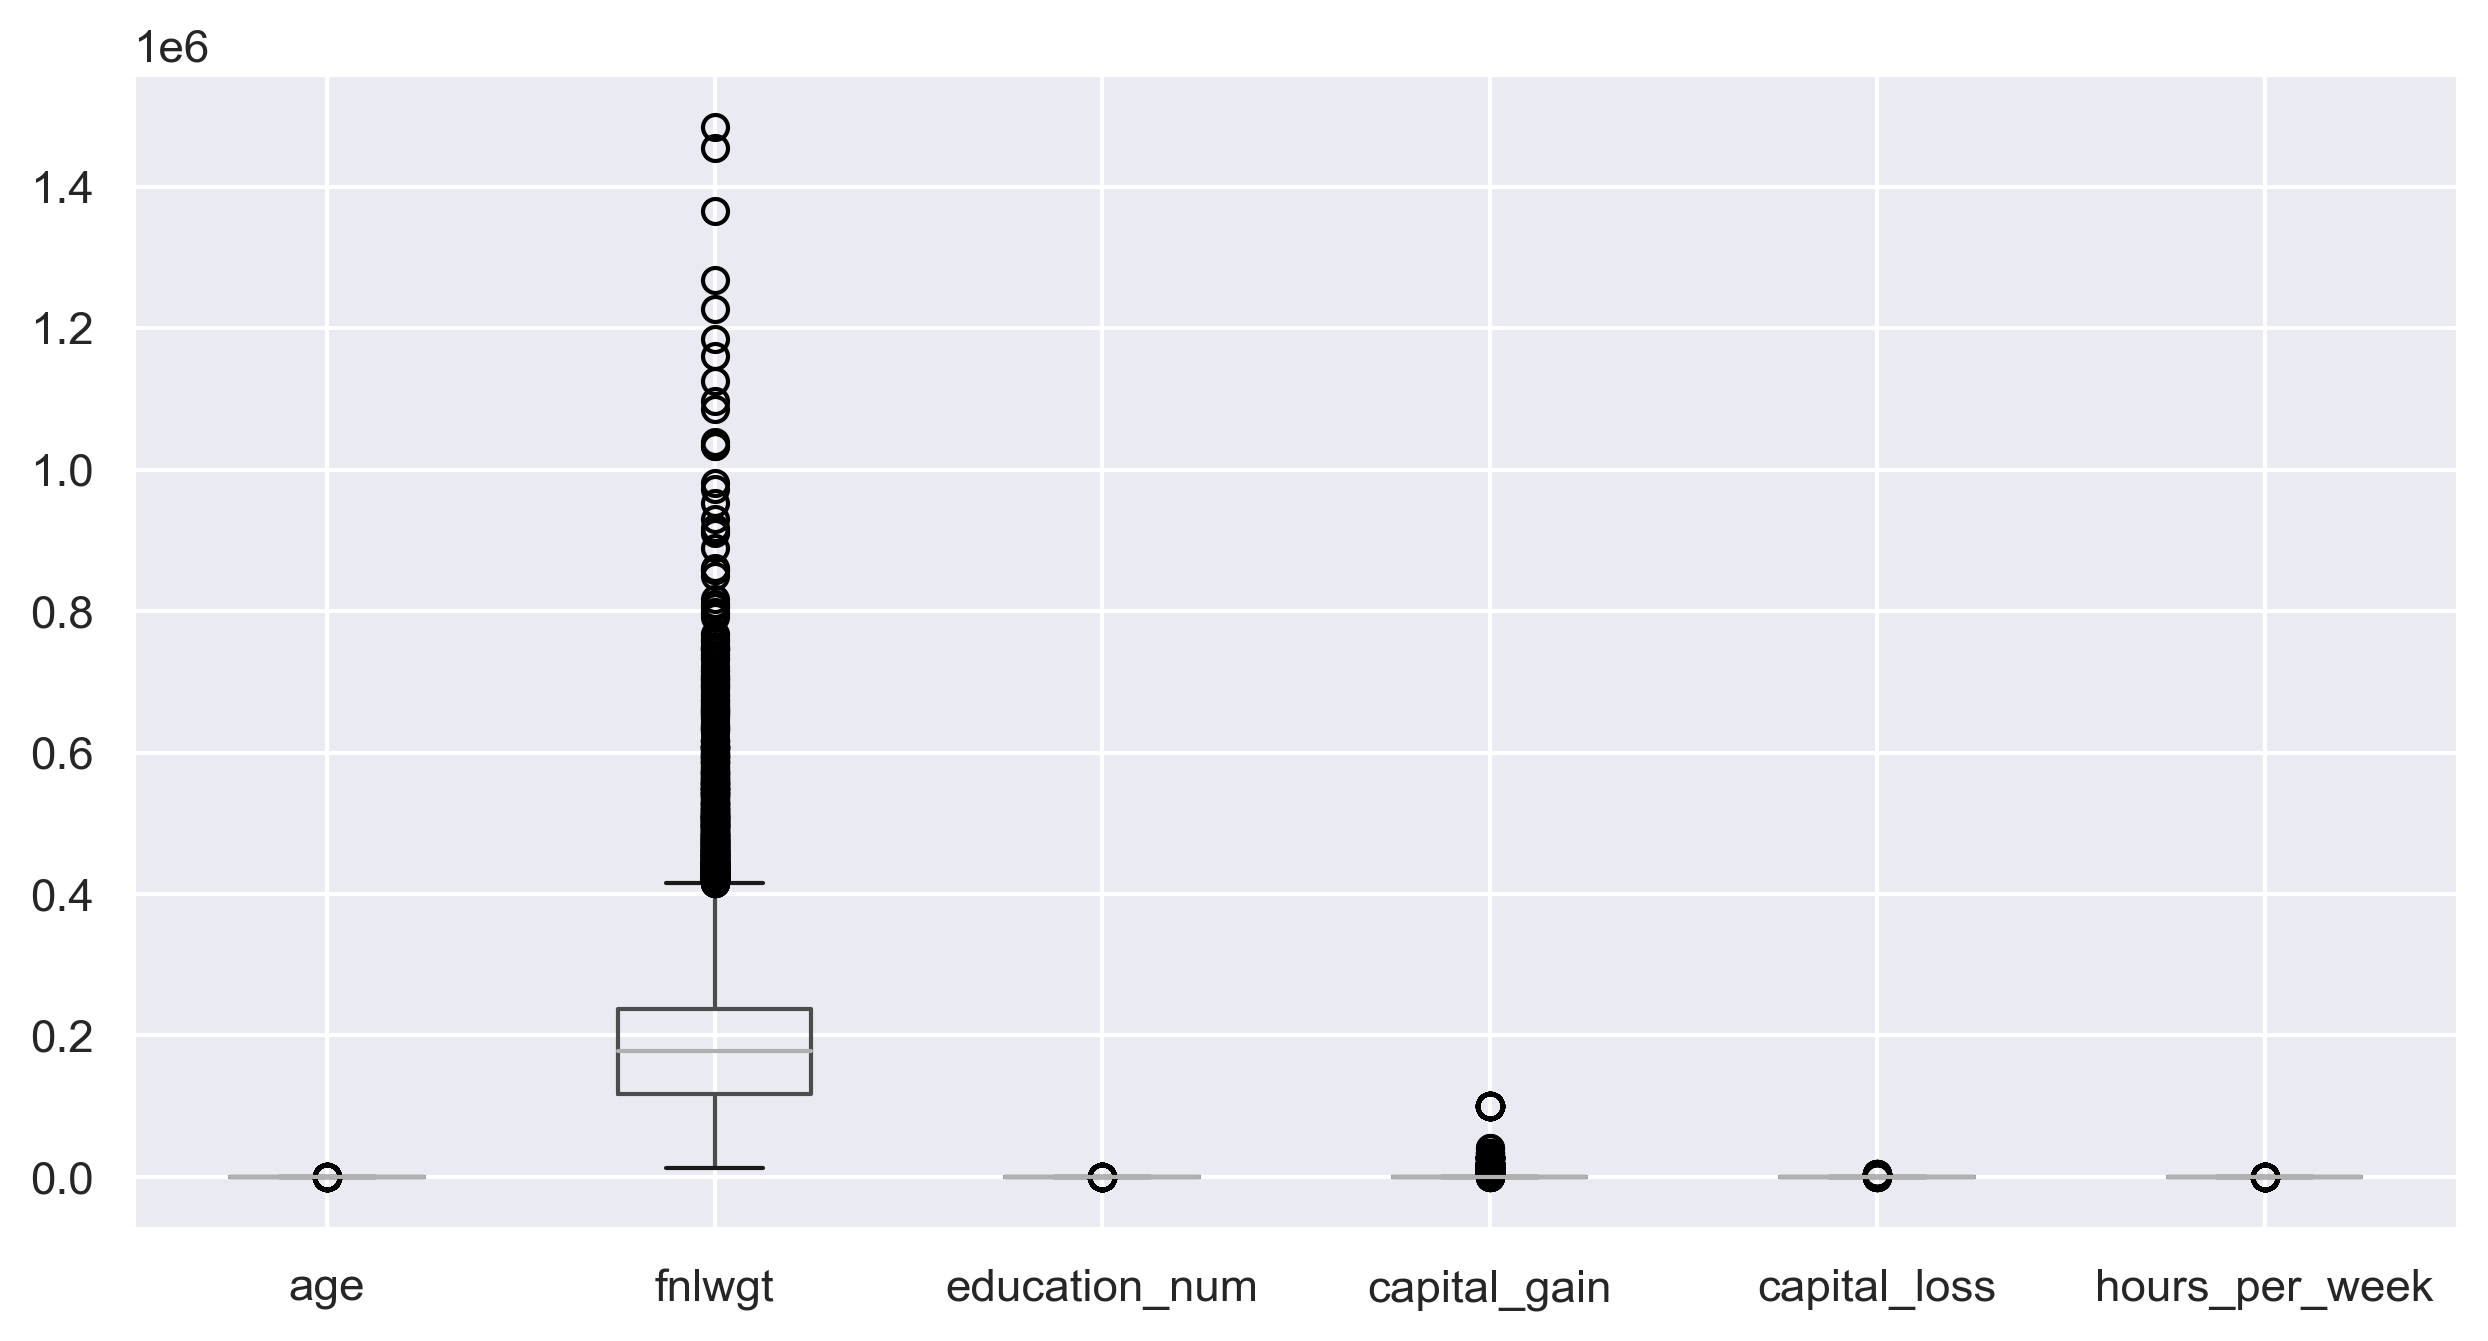

In [19]:
df.boxplot()

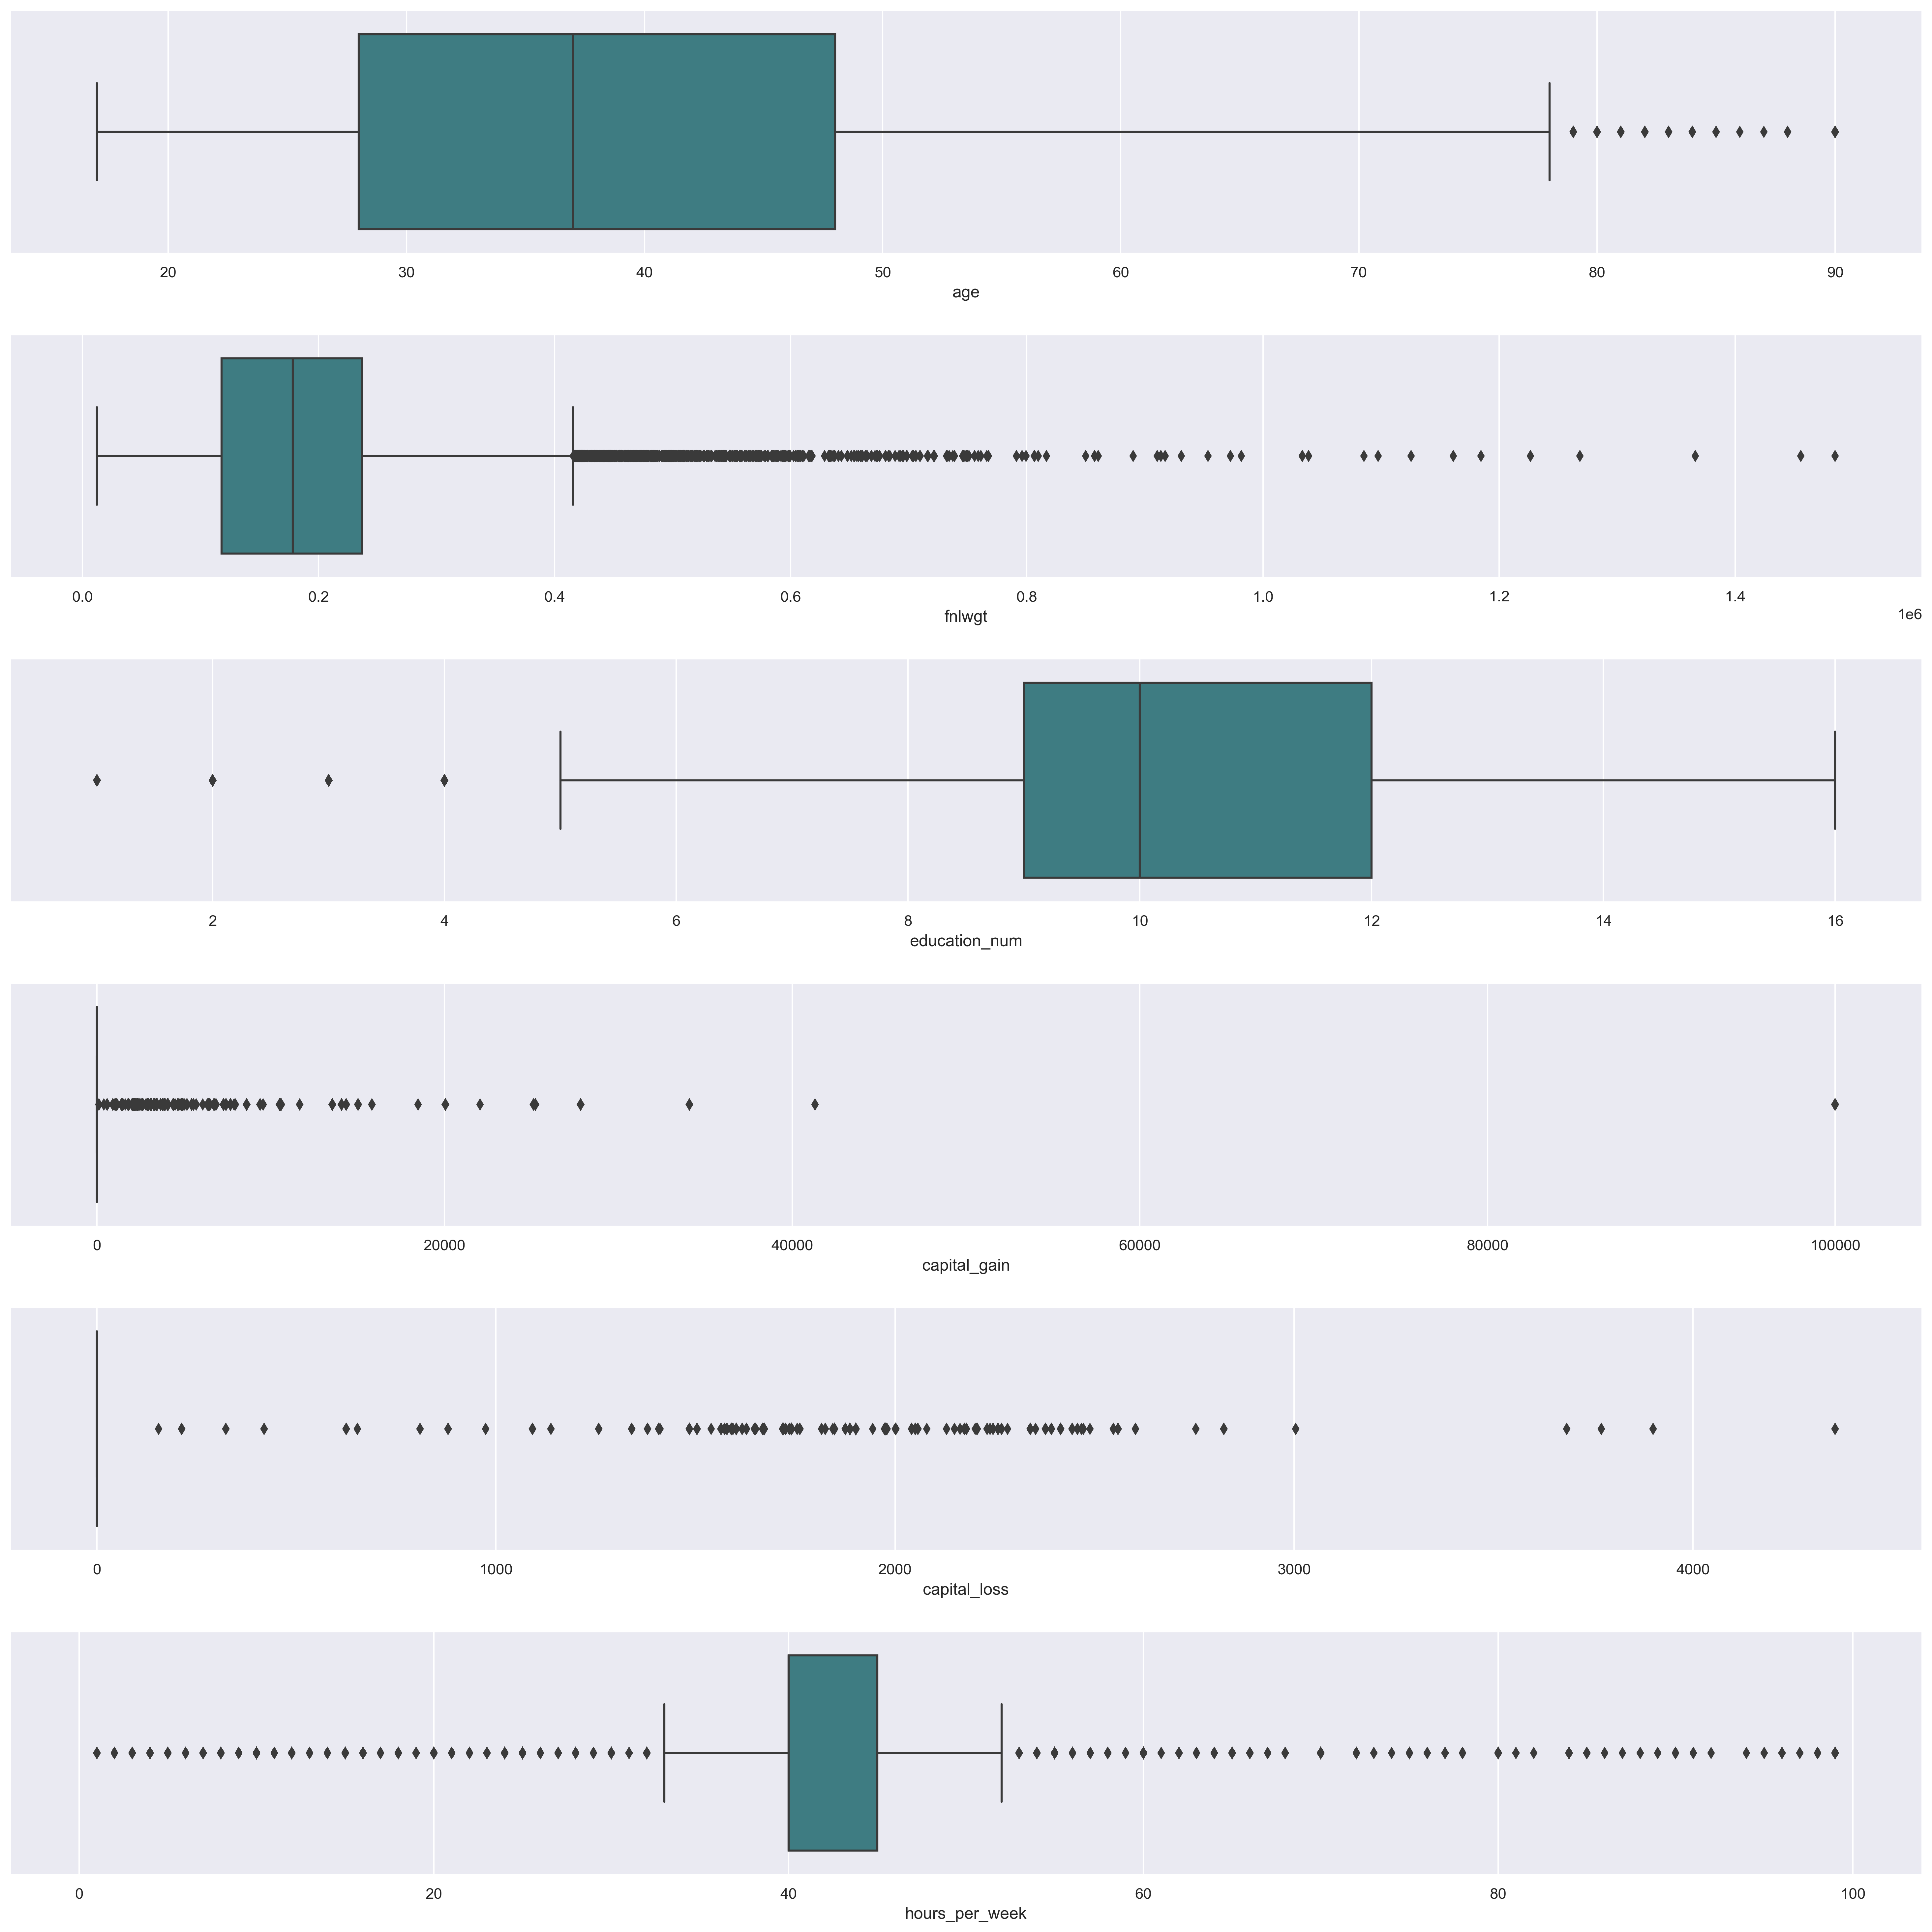

In [20]:
ot=df.copy() 
fig, axes=plt.subplots(6,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='fnlwgt',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='education_num',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='capital_gain',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='capital_loss',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='hours_per_week',data=ot,palette='crest',ax=axes[5])
plt.tight_layout(pad=2.0)

# All of the boxplots shown above contain an outlier, thus we must deal with it before establishing the model.

# Outlier detection function

In [21]:
def outlier_detection (data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    
    iqr = q3-q1
    
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    
    return lower,upper

In [22]:
outlier_detection(df, "age")

(-2.0, 78.0)

# Capping Outliers

Text(0.5, 1.0, 'Before replacing the outilers with upper values')

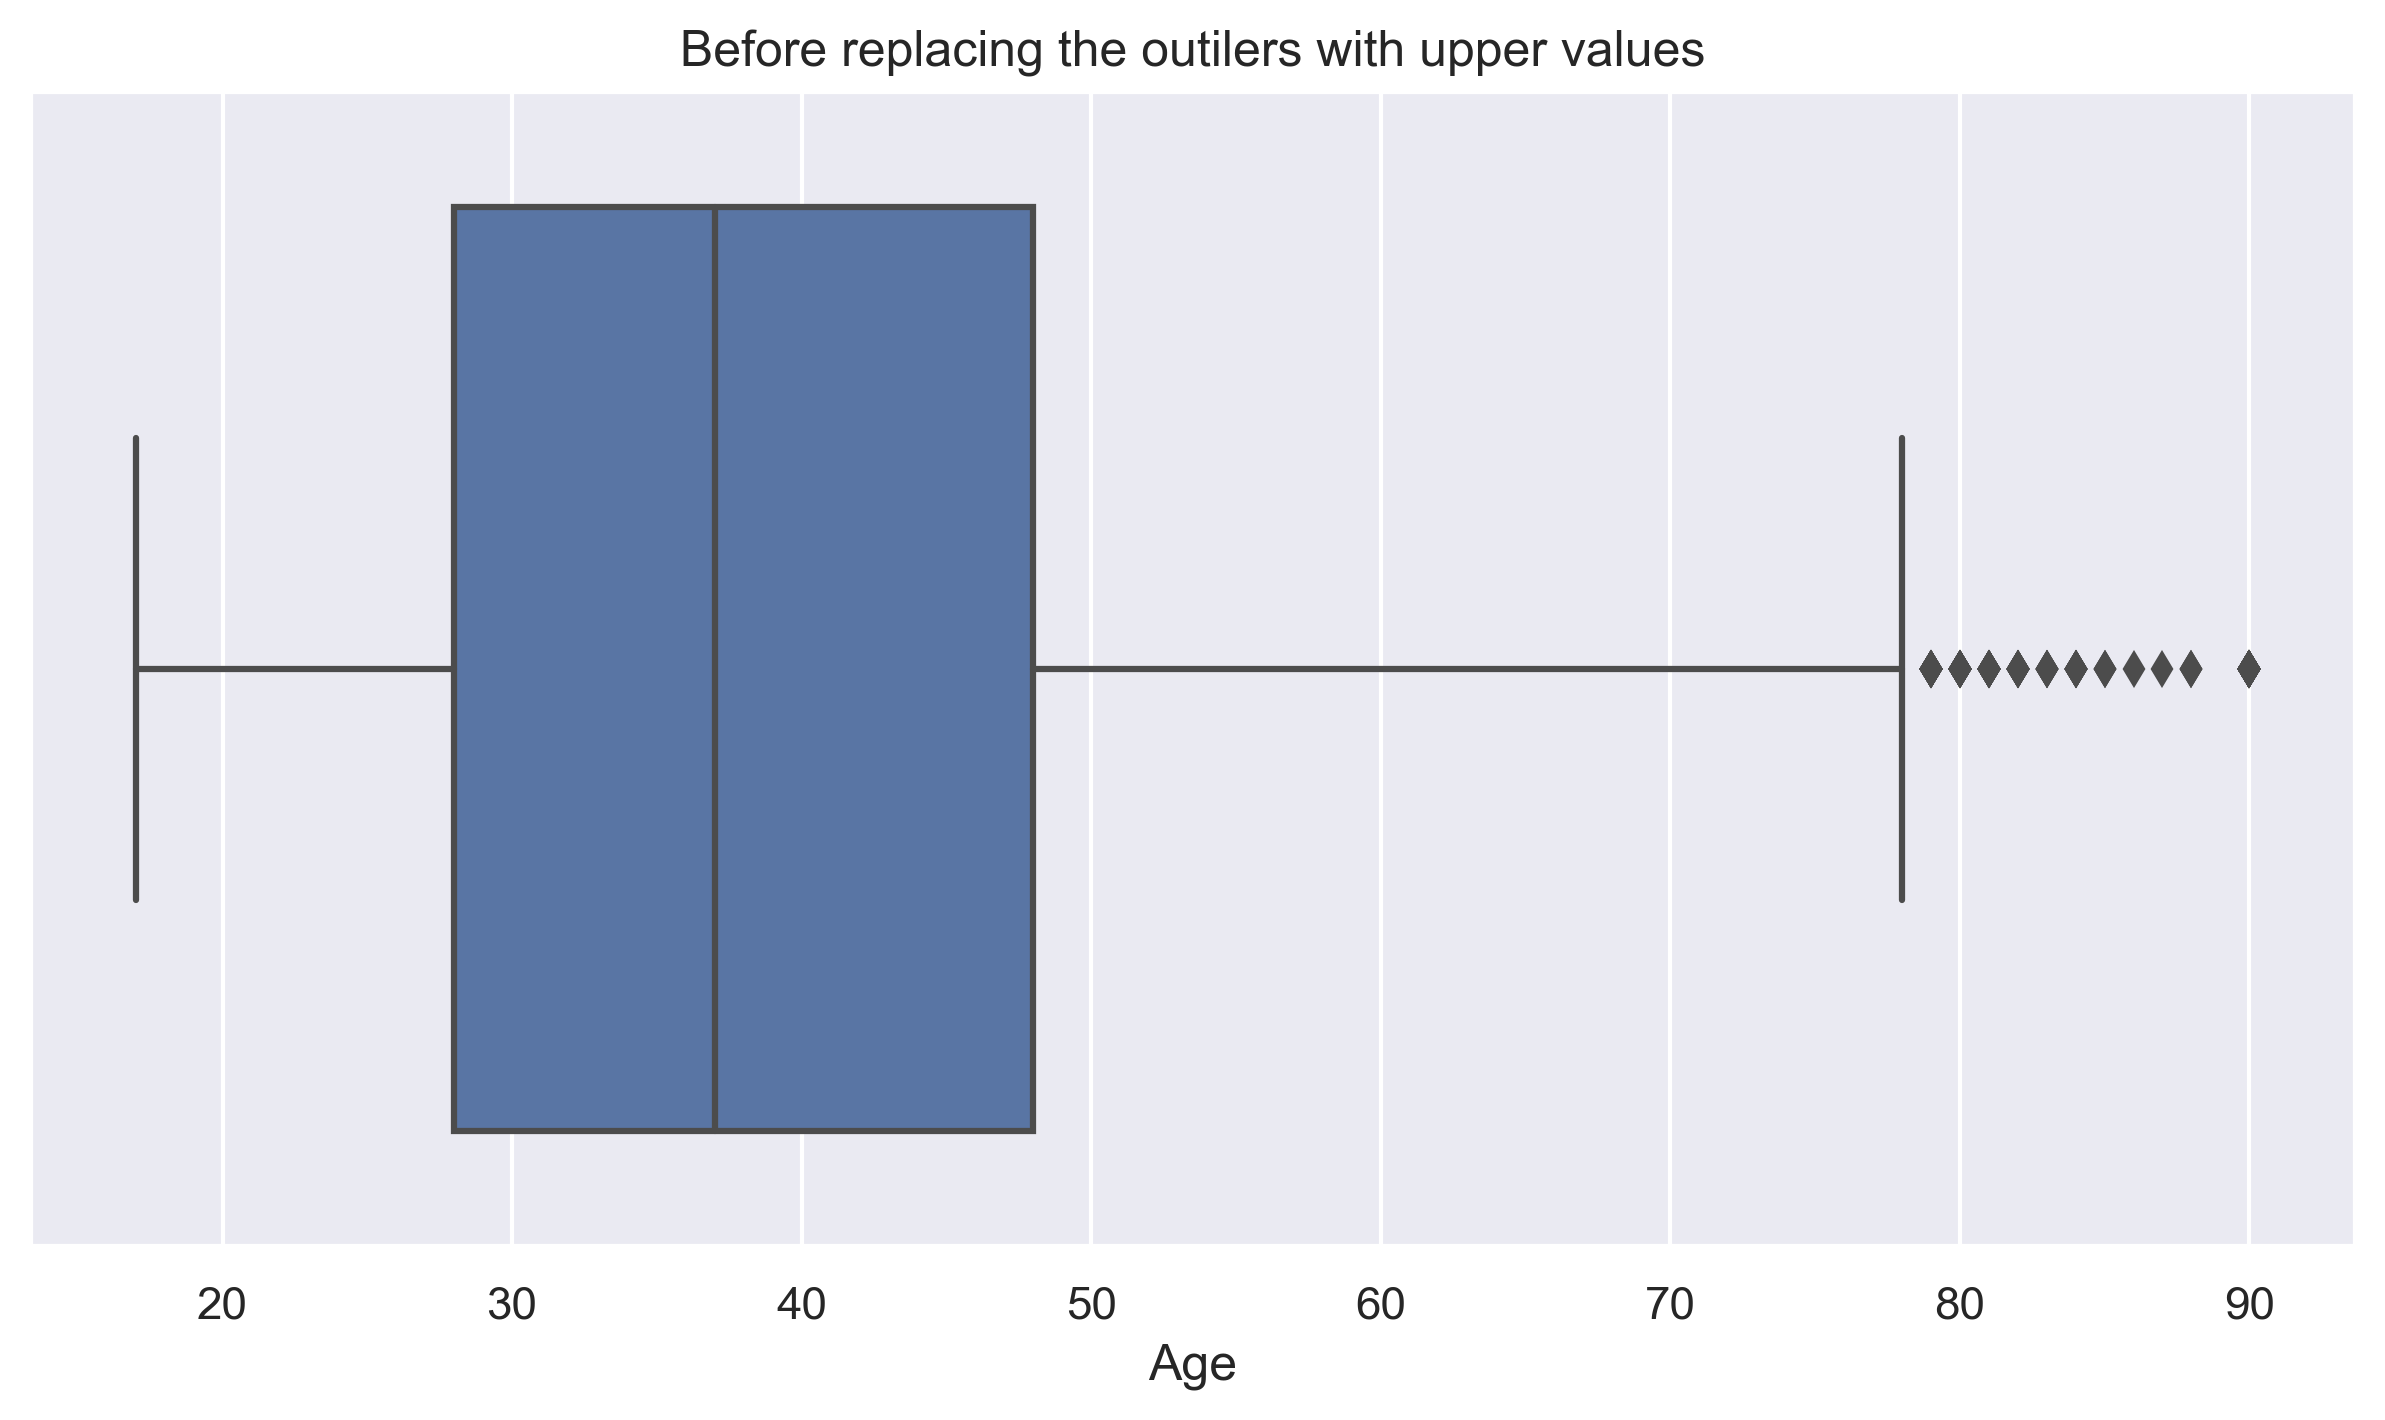

In [23]:
sns.boxplot(x = df["age"])
plt.xlabel("Age")
plt.title("Before replacing the outilers with upper values")

In [24]:
df.loc[df["age"]>78.0, "age"] = 78.0

Text(0.5, 1.0, 'After replaed the outliers with upper extrem values')

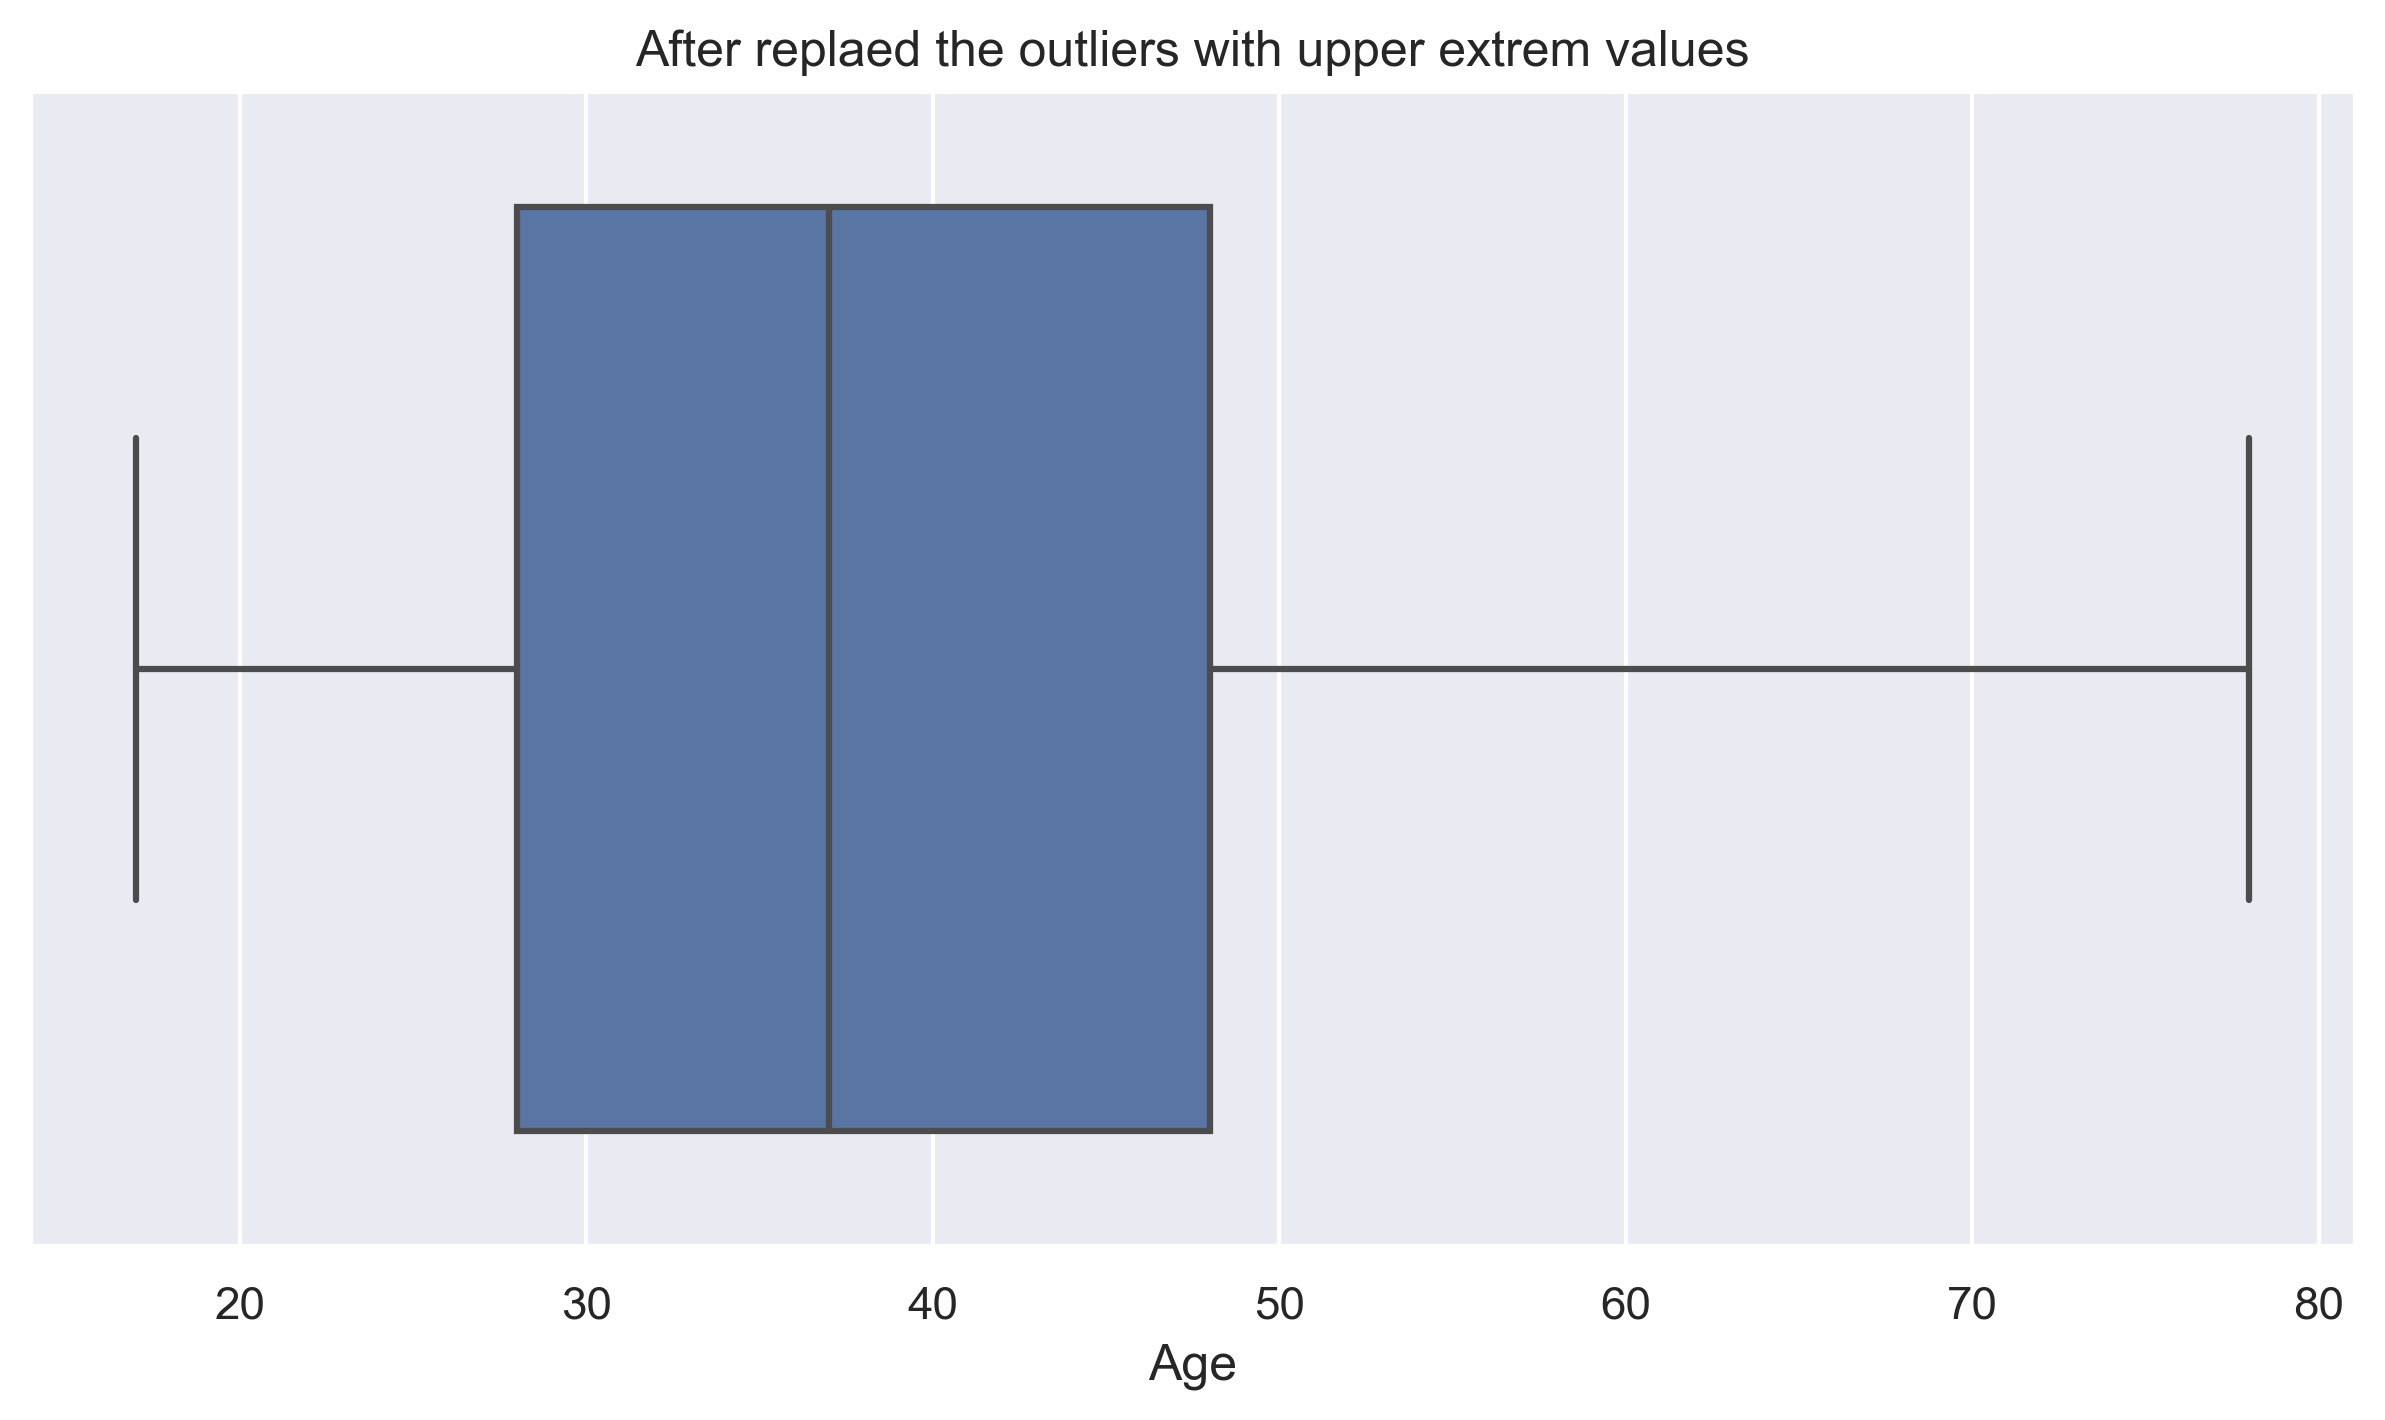

In [25]:
sns.boxplot(x= df["age"])
plt.xlabel("Age")
plt.title("After replaed the outliers with upper extrem values")

Text(0.5, 1.0, 'Before replacing the outliers with upper values')

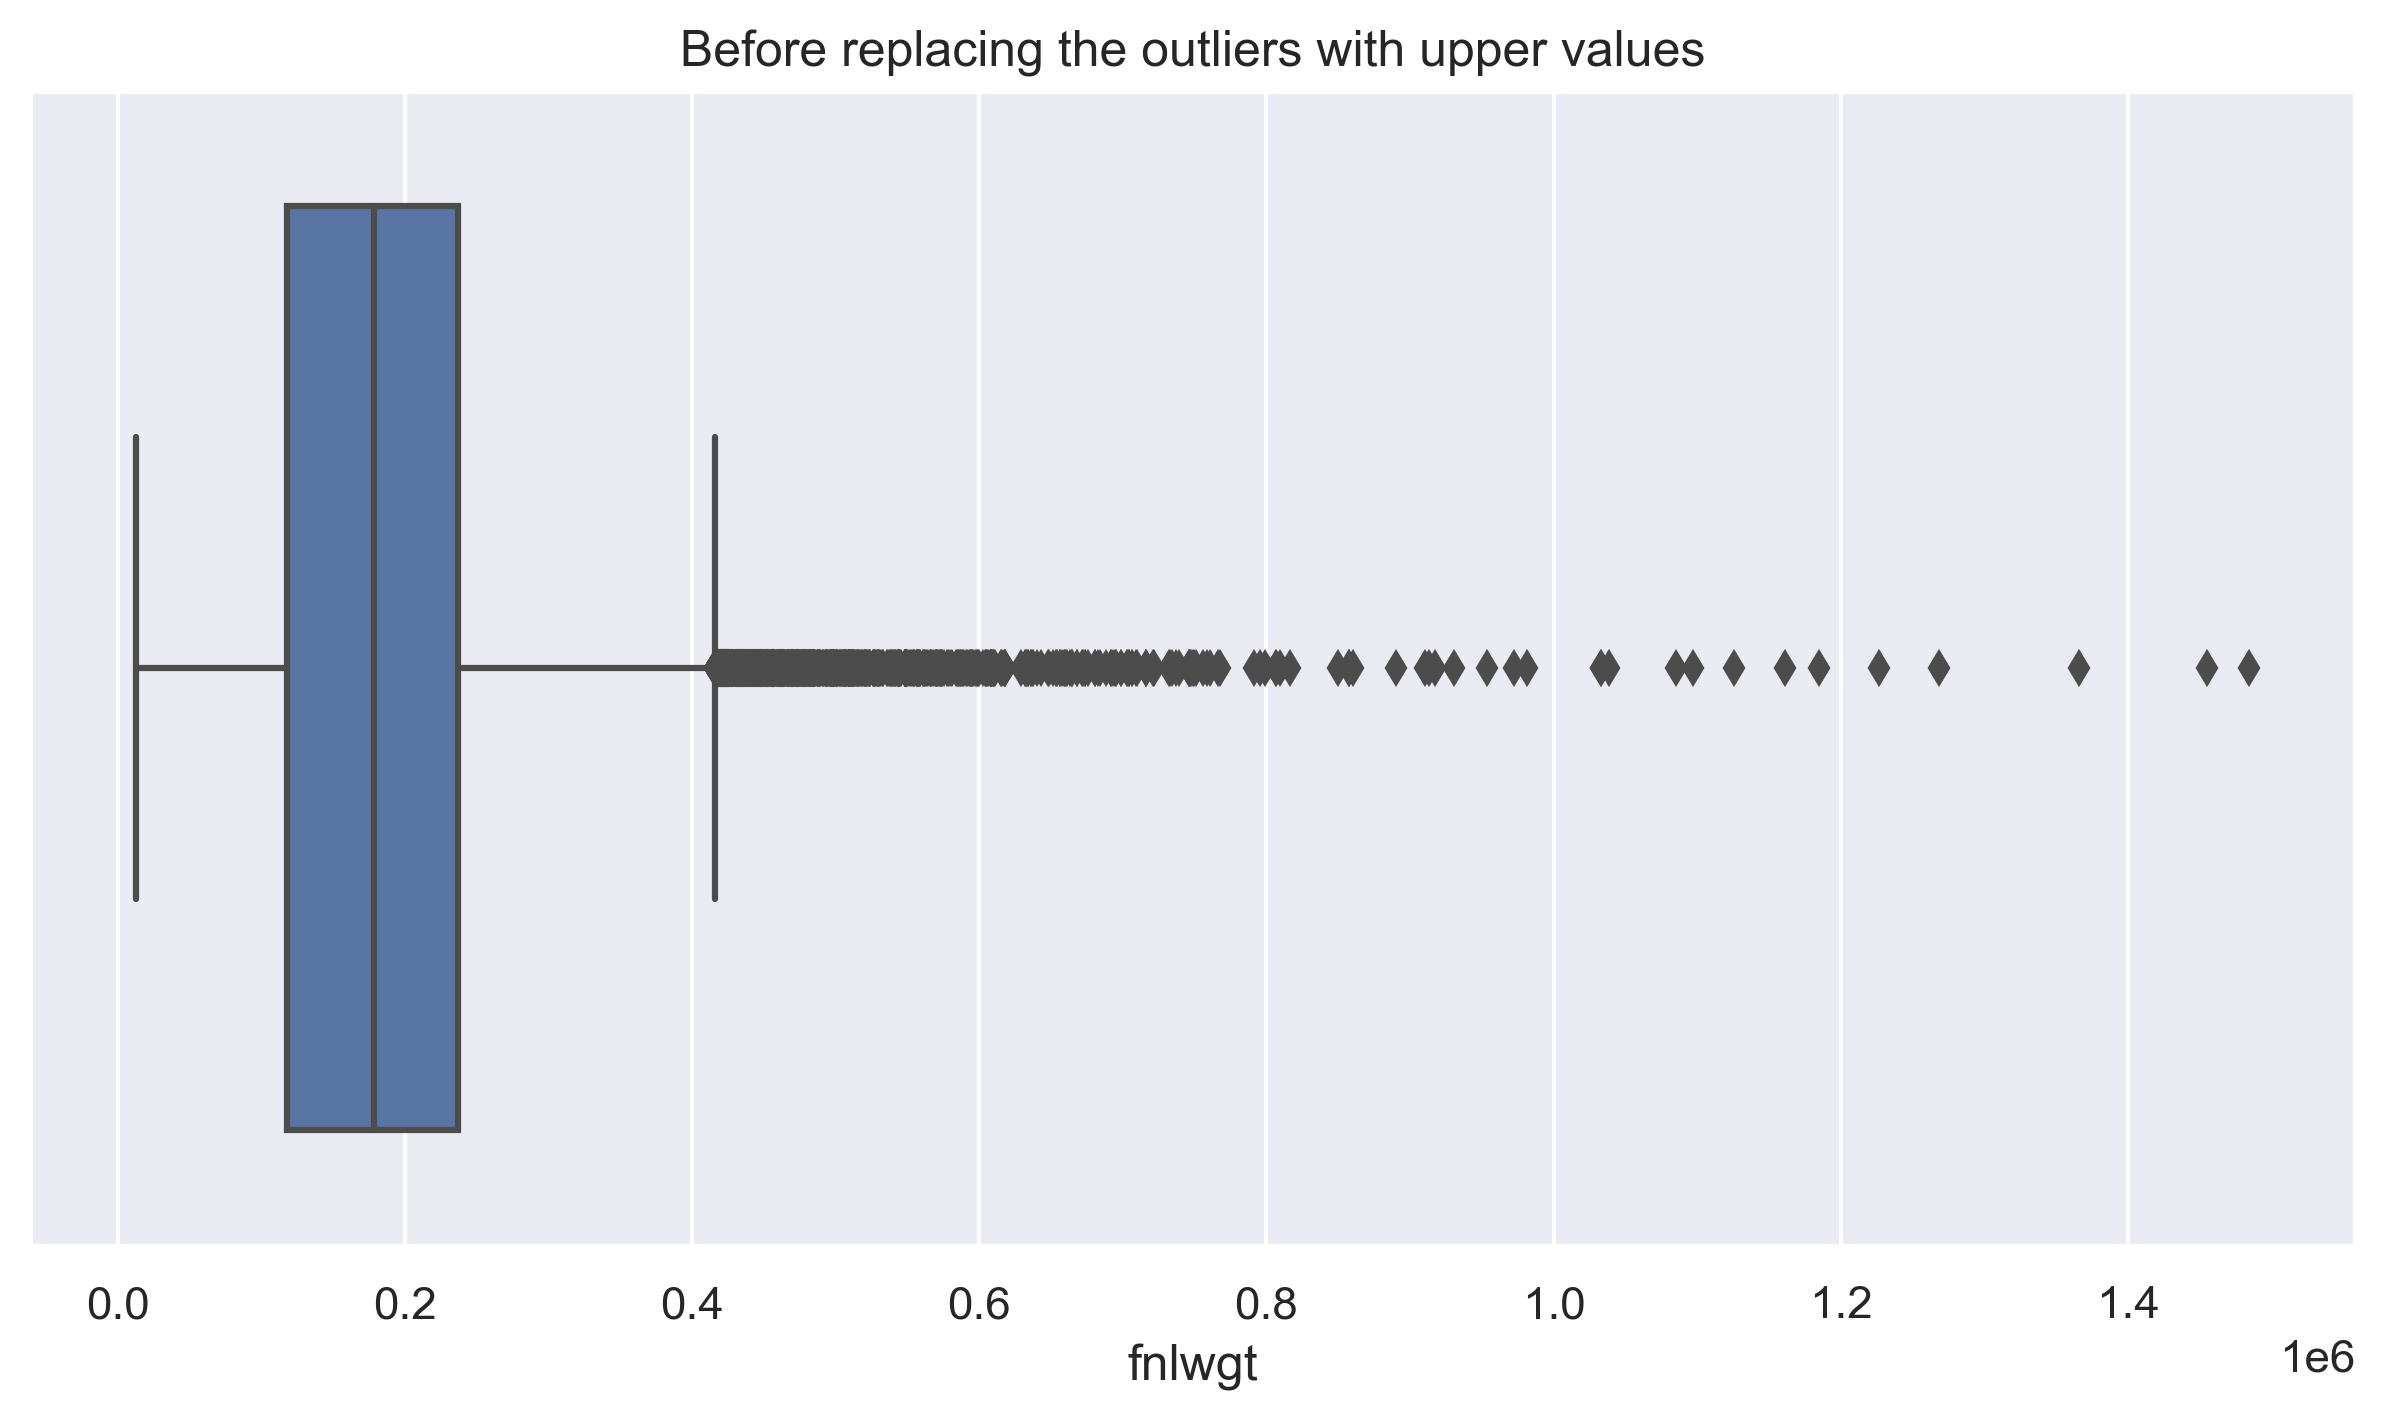

In [26]:
sns.boxplot(x=df["fnlwgt"])
plt.xlabel("fnlwgt")
plt.title("Before replacing the outliers with upper values")

In [27]:
outlier_detection(df,"fnlwgt")

(-60922.0, 415742.0)

In [28]:
df.loc[df["fnlwgt"]>415742.0, "fnlwgt"] = 415742.0

Text(0.5, 1.0, 'After replacing the outlier with upper extreme values')

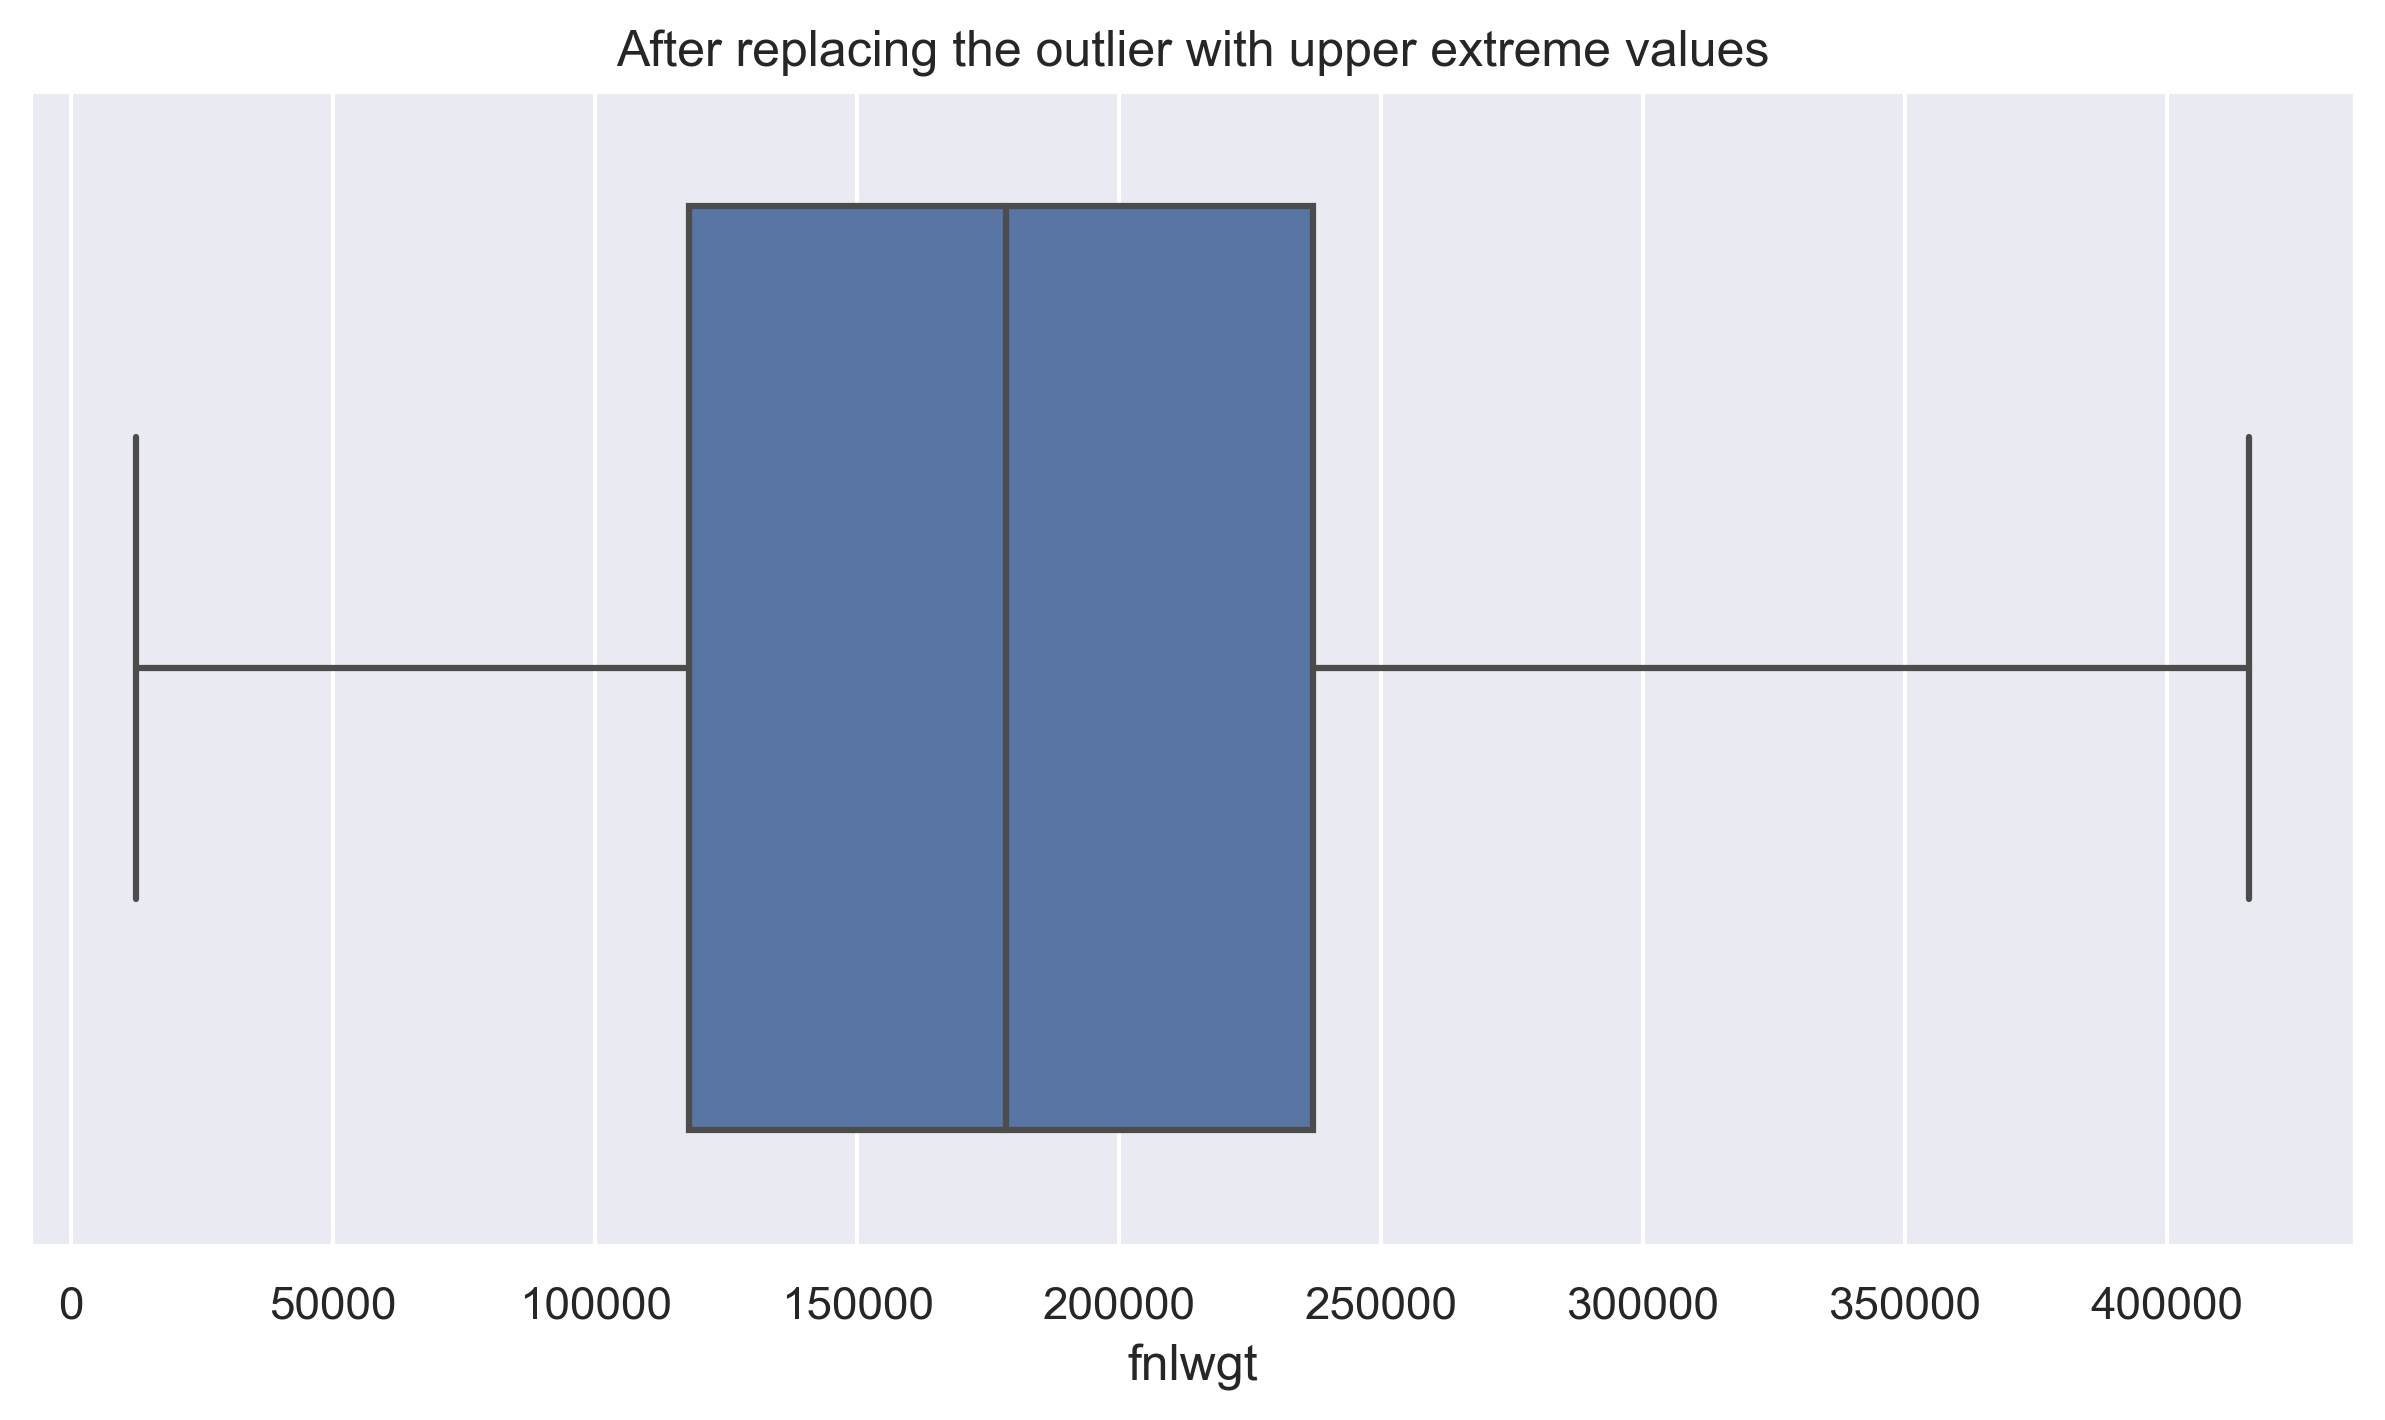

In [29]:
sns.boxplot(x=df["fnlwgt"])
plt.xlabel("fnlwgt")
plt.title("After replacing the outlier with upper extreme values")

In [30]:
outlier_detection(df, "education_num")

(4.5, 16.5)

Text(0.5, 1.0, 'Before replacing the outliers with lower extreme values')

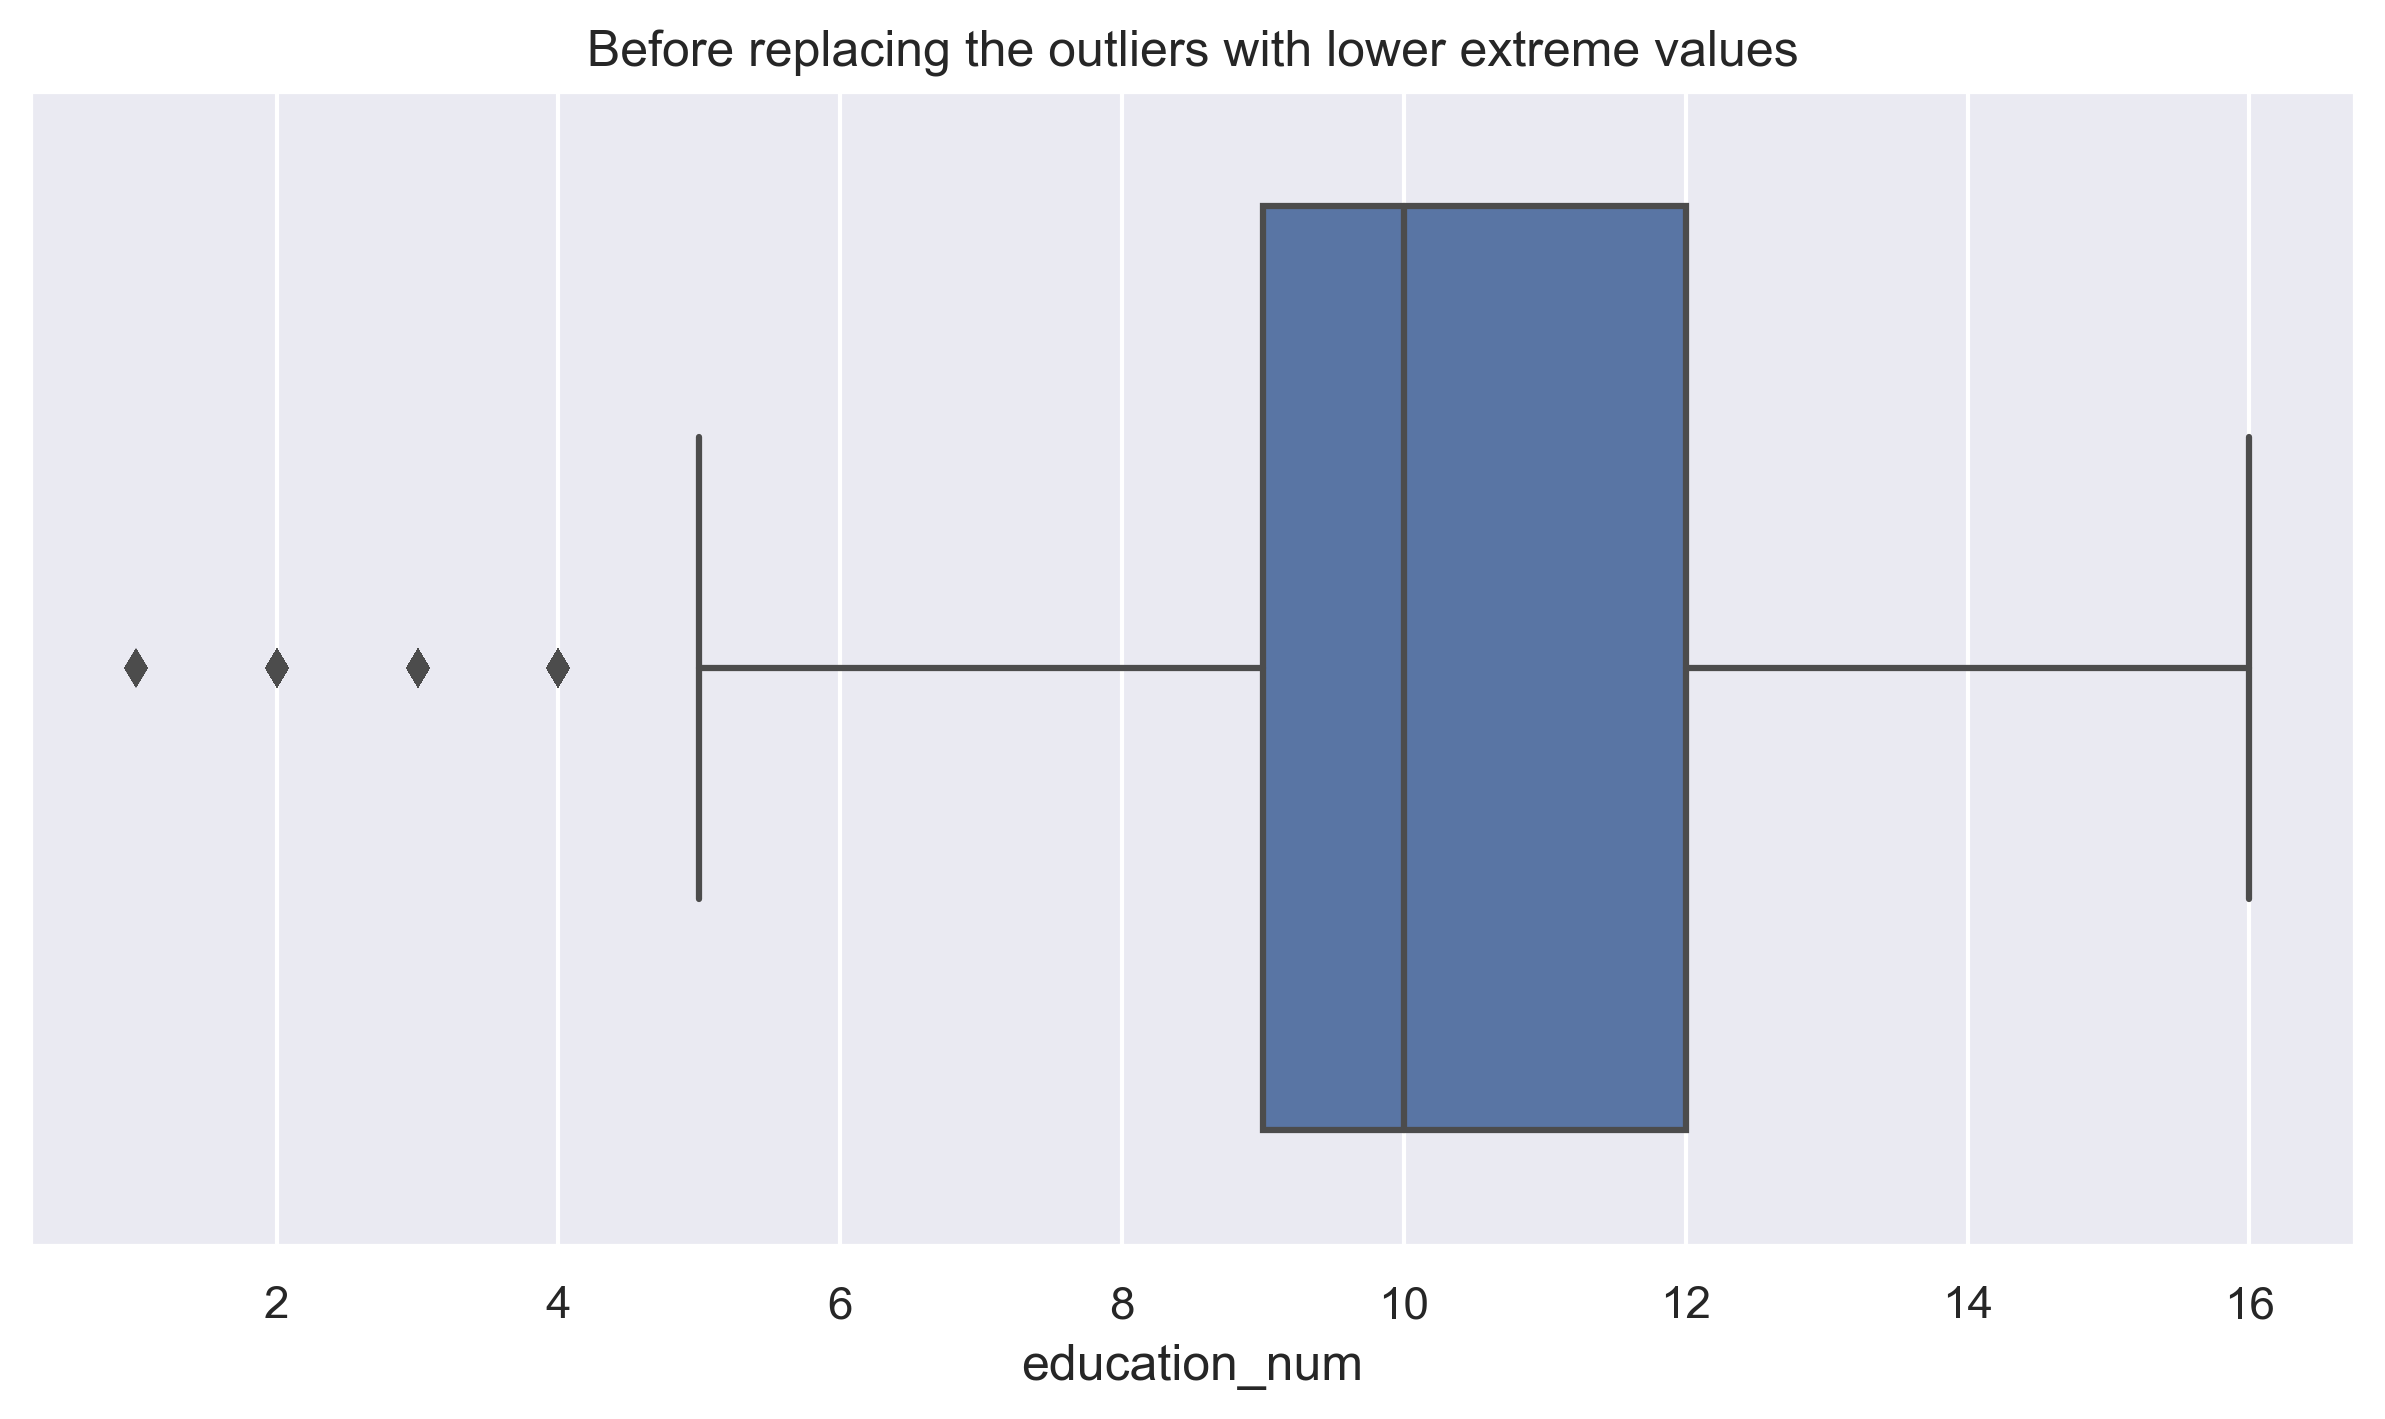

In [31]:
sns.boxplot(x = df["education_num"])
plt.xlabel("education_num")
plt.title("Before replacing the outliers with lower extreme values")

In [32]:
df.loc[df["education_num"]<4.5, "education_num"] = 4.5

Text(0.5, 1.0, 'After replaced the outliers with lower extreme values')

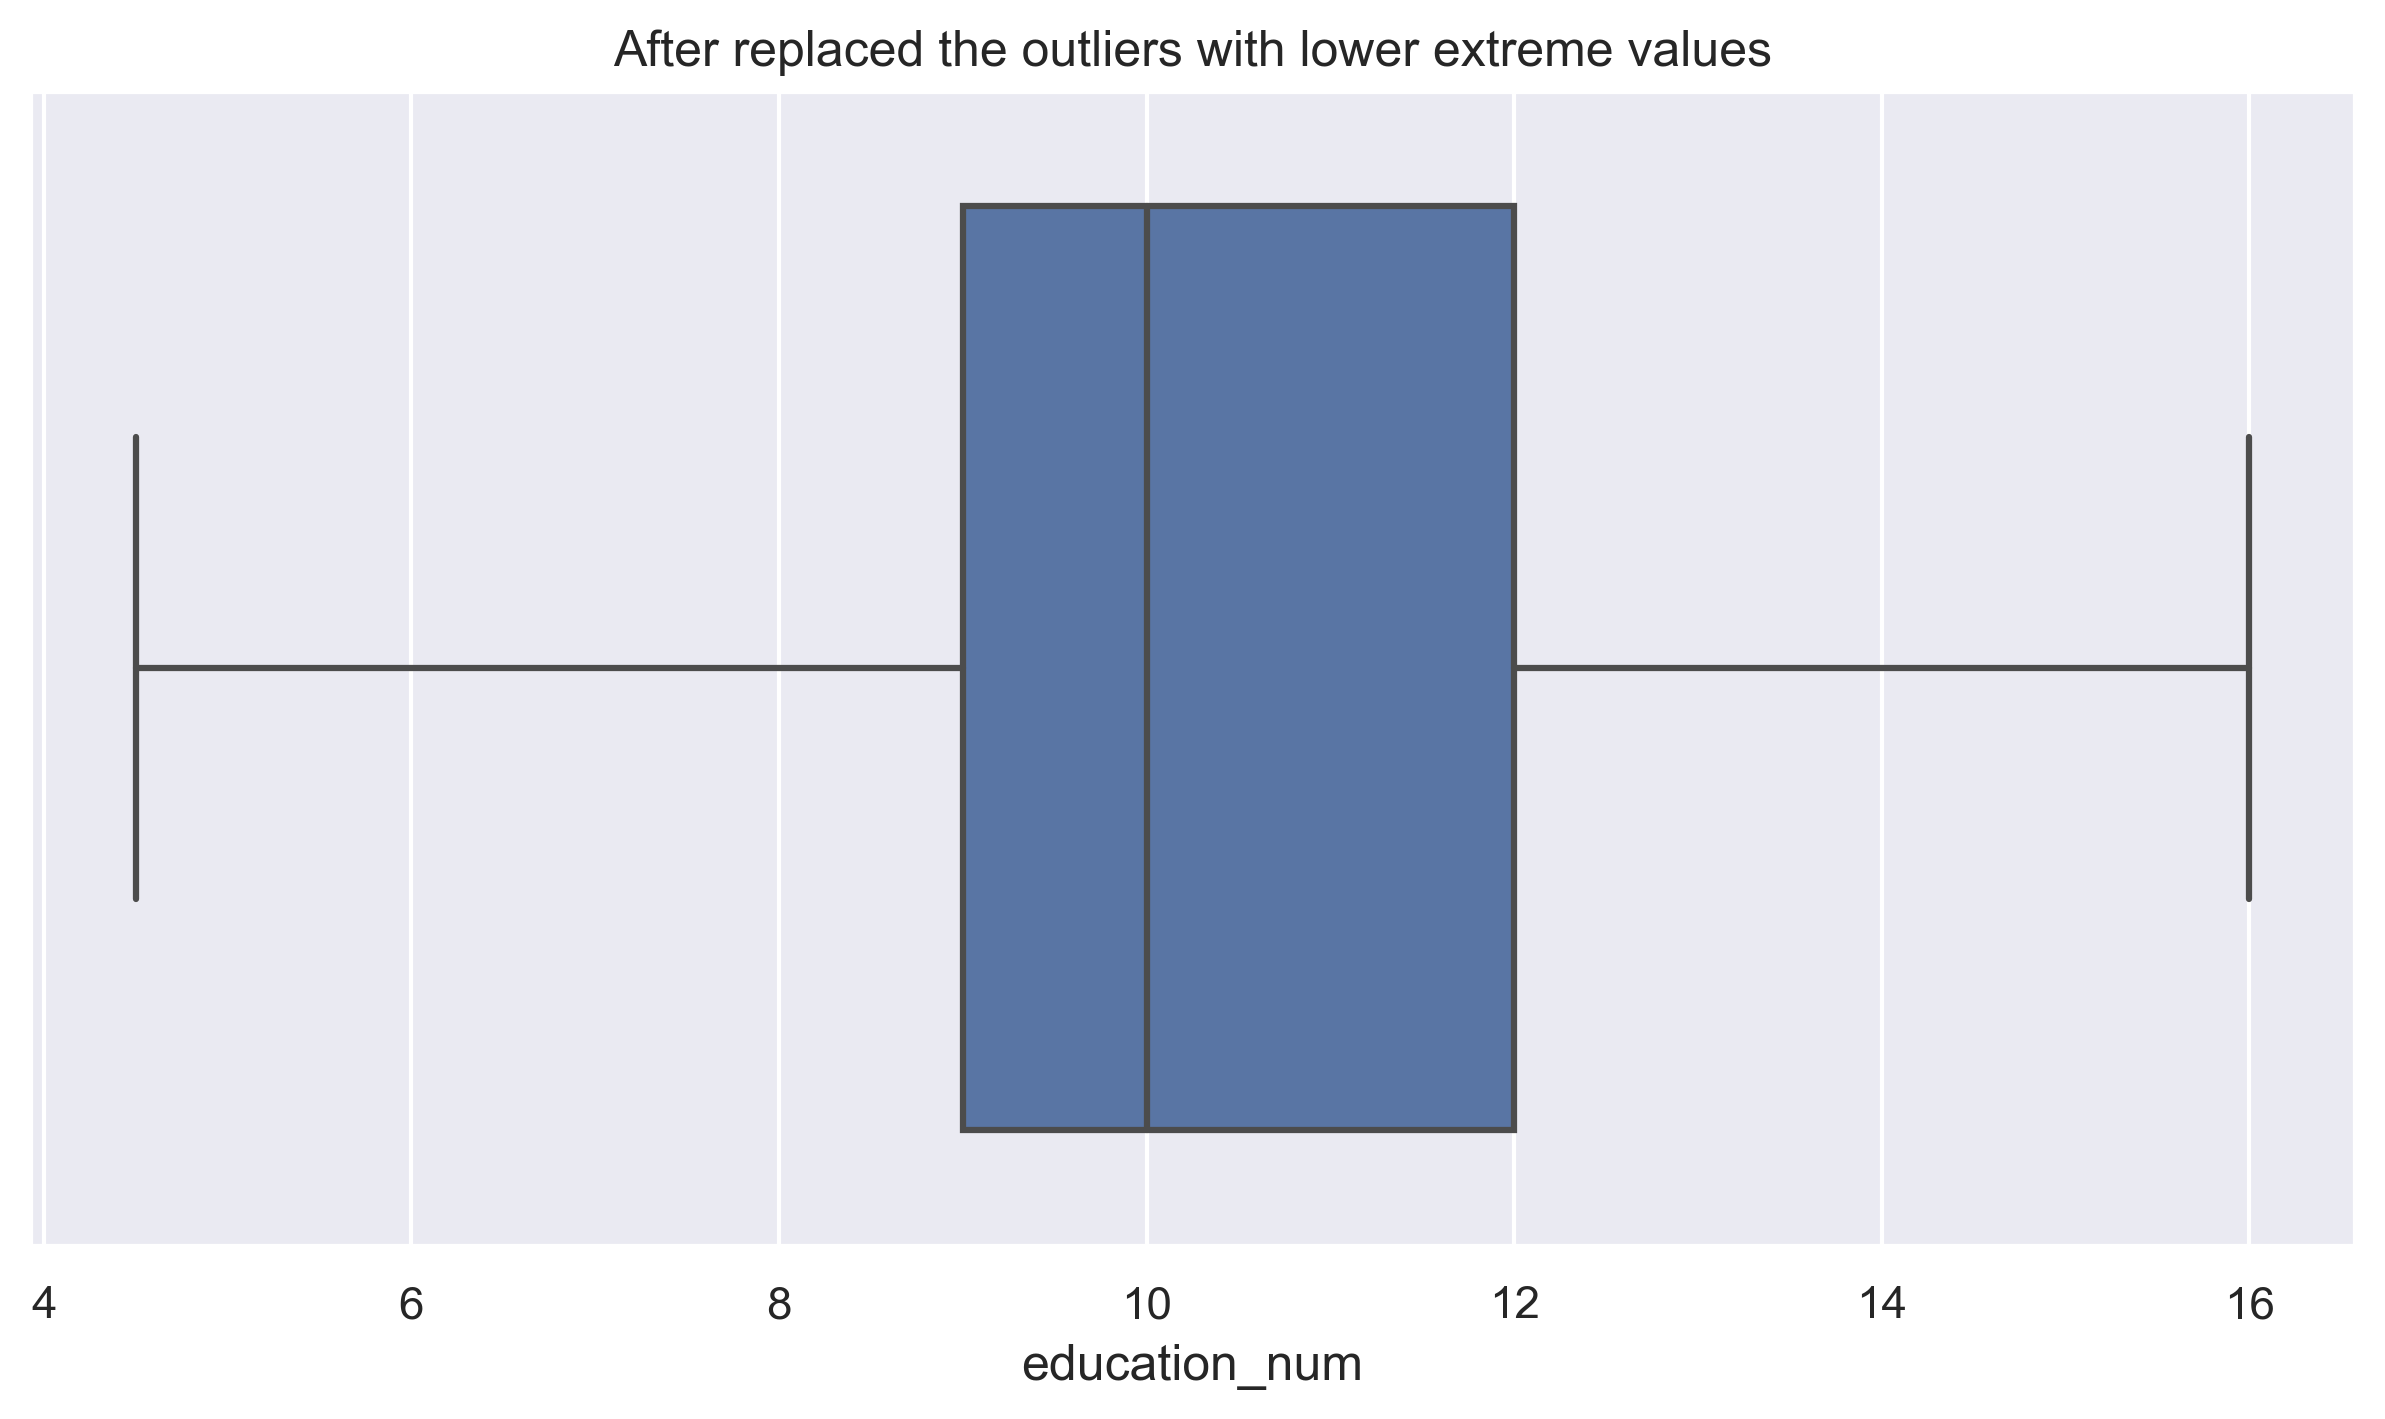

In [33]:
sns.boxplot(x = df["education_num"])
plt.xlabel("education_num")
plt.title("After replaced the outliers with lower extreme values")

In [34]:
outlier_detection(df, "capital_gain")

(0.0, 0.0)

Text(0.5, 1.0, 'Before replacing the outliers with upper extreme values')

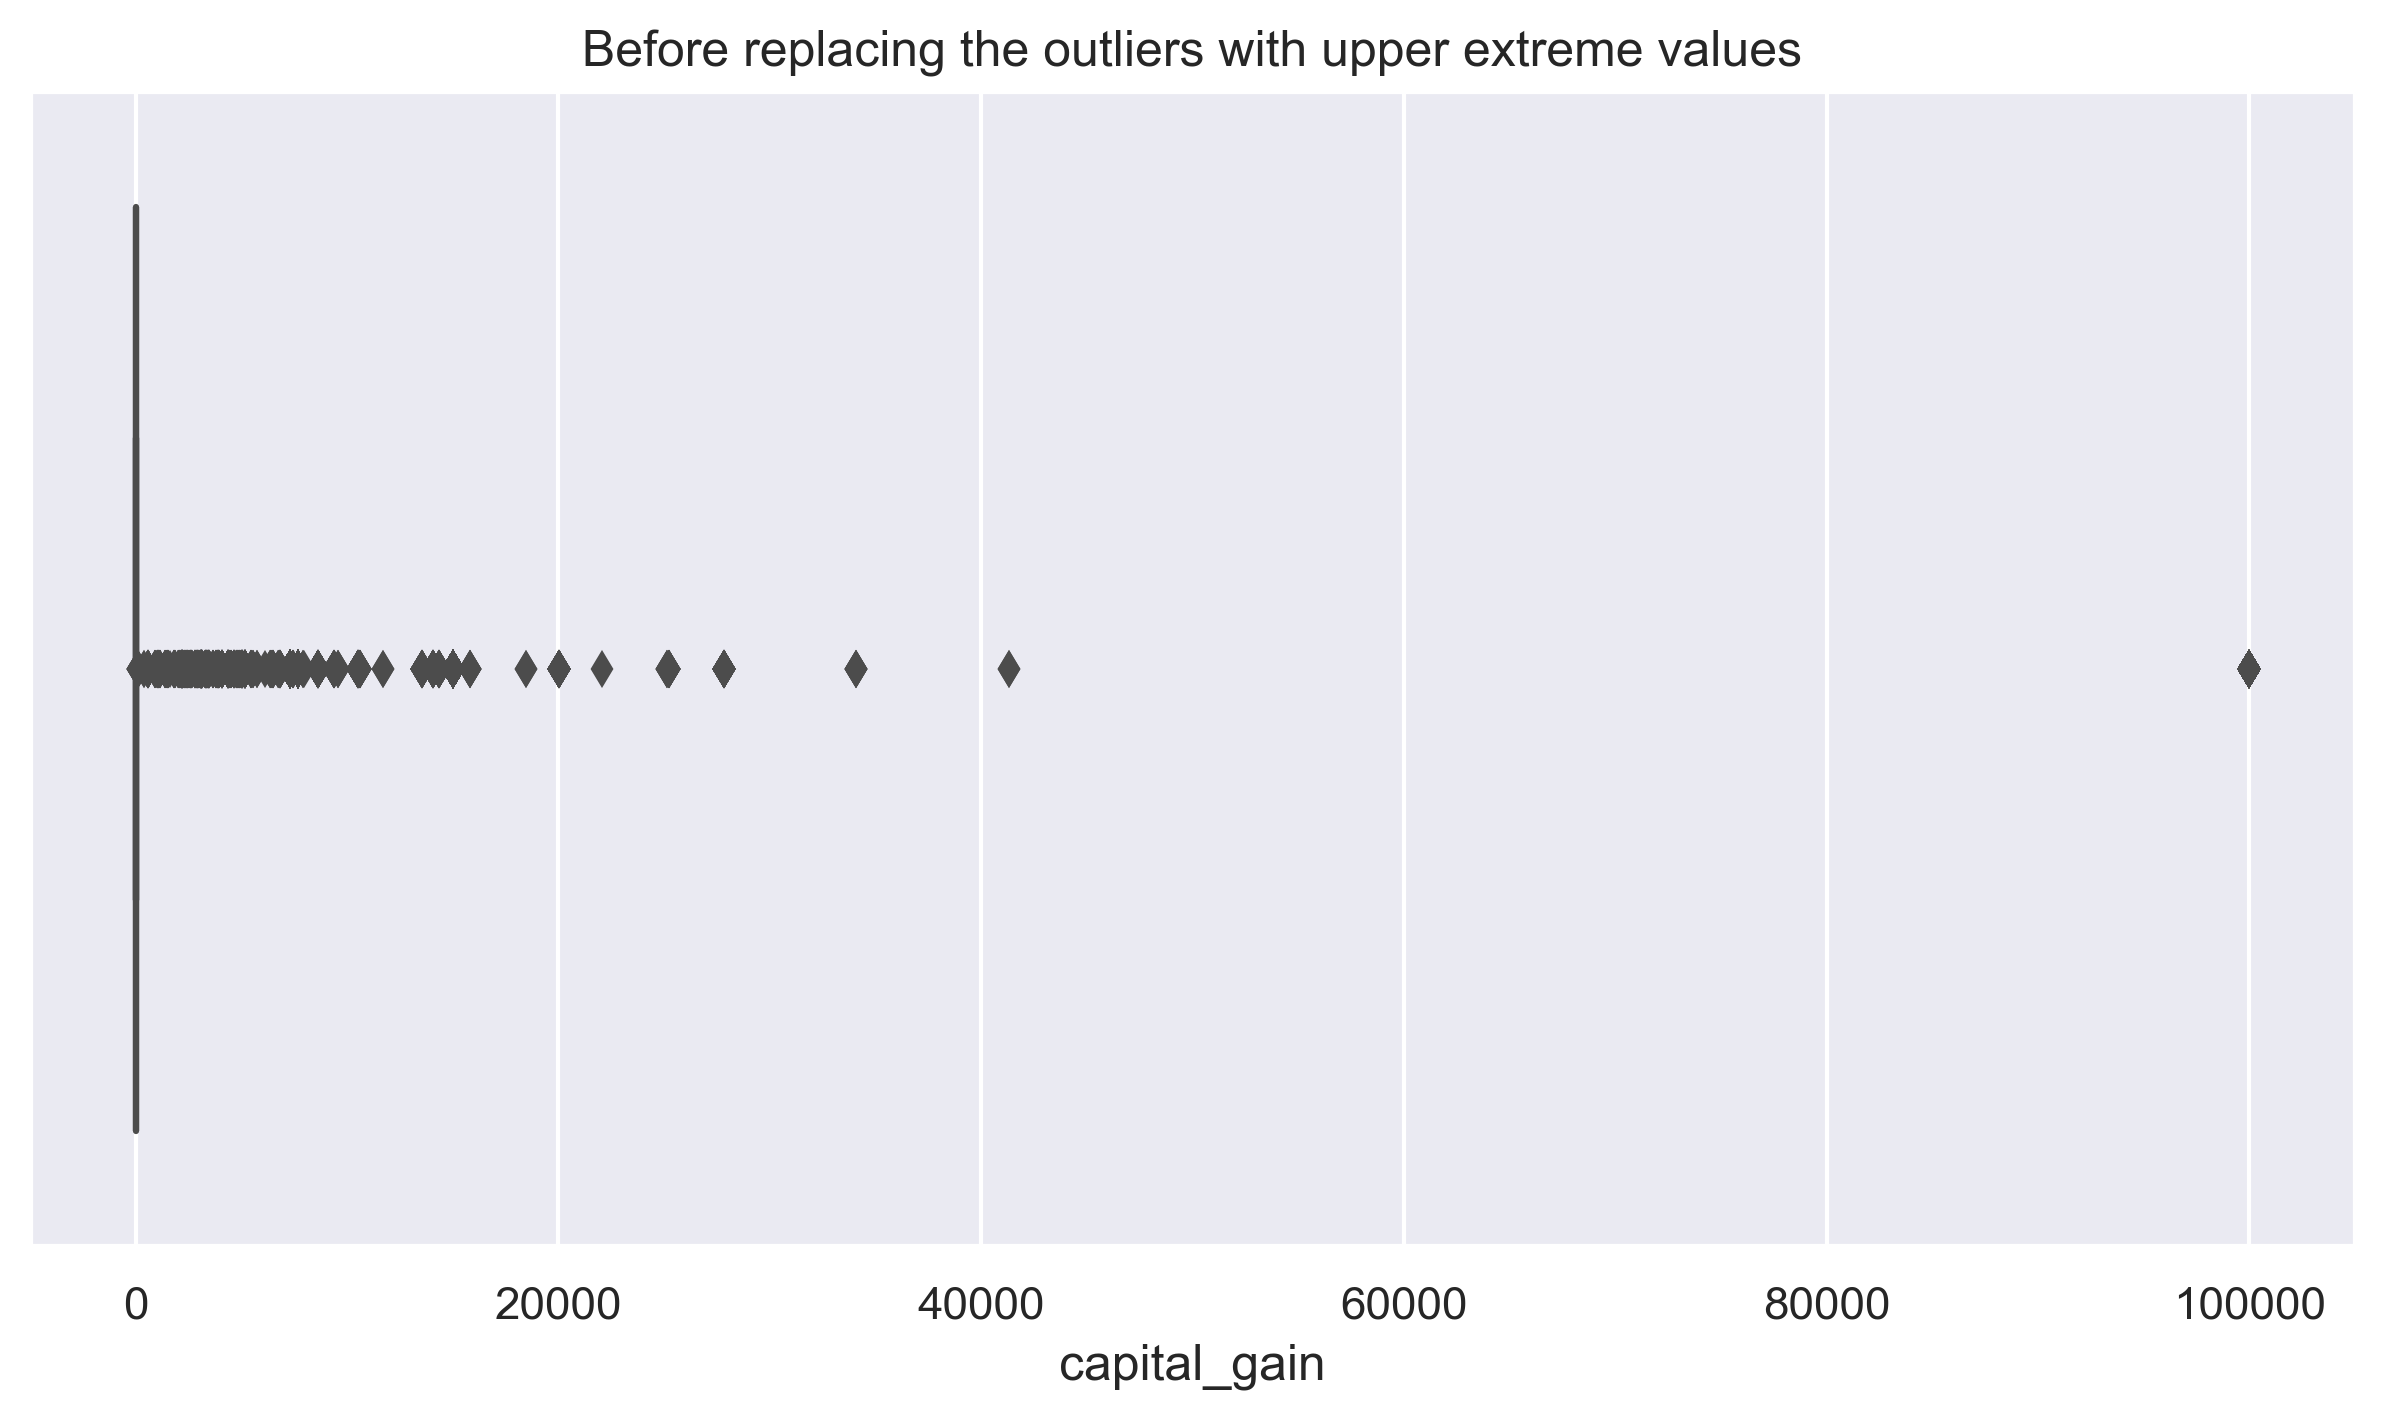

In [35]:
sns.boxplot(x = df["capital_gain"])
plt.xlabel("capital_gain")
plt.title("Before replacing the outliers with upper extreme values")

In [36]:
df.loc[df["capital_gain"]>0.0, "capital_gain"] = 0.0

Text(0.5, 1.0, 'After replaced the outliers with upper extreme values')

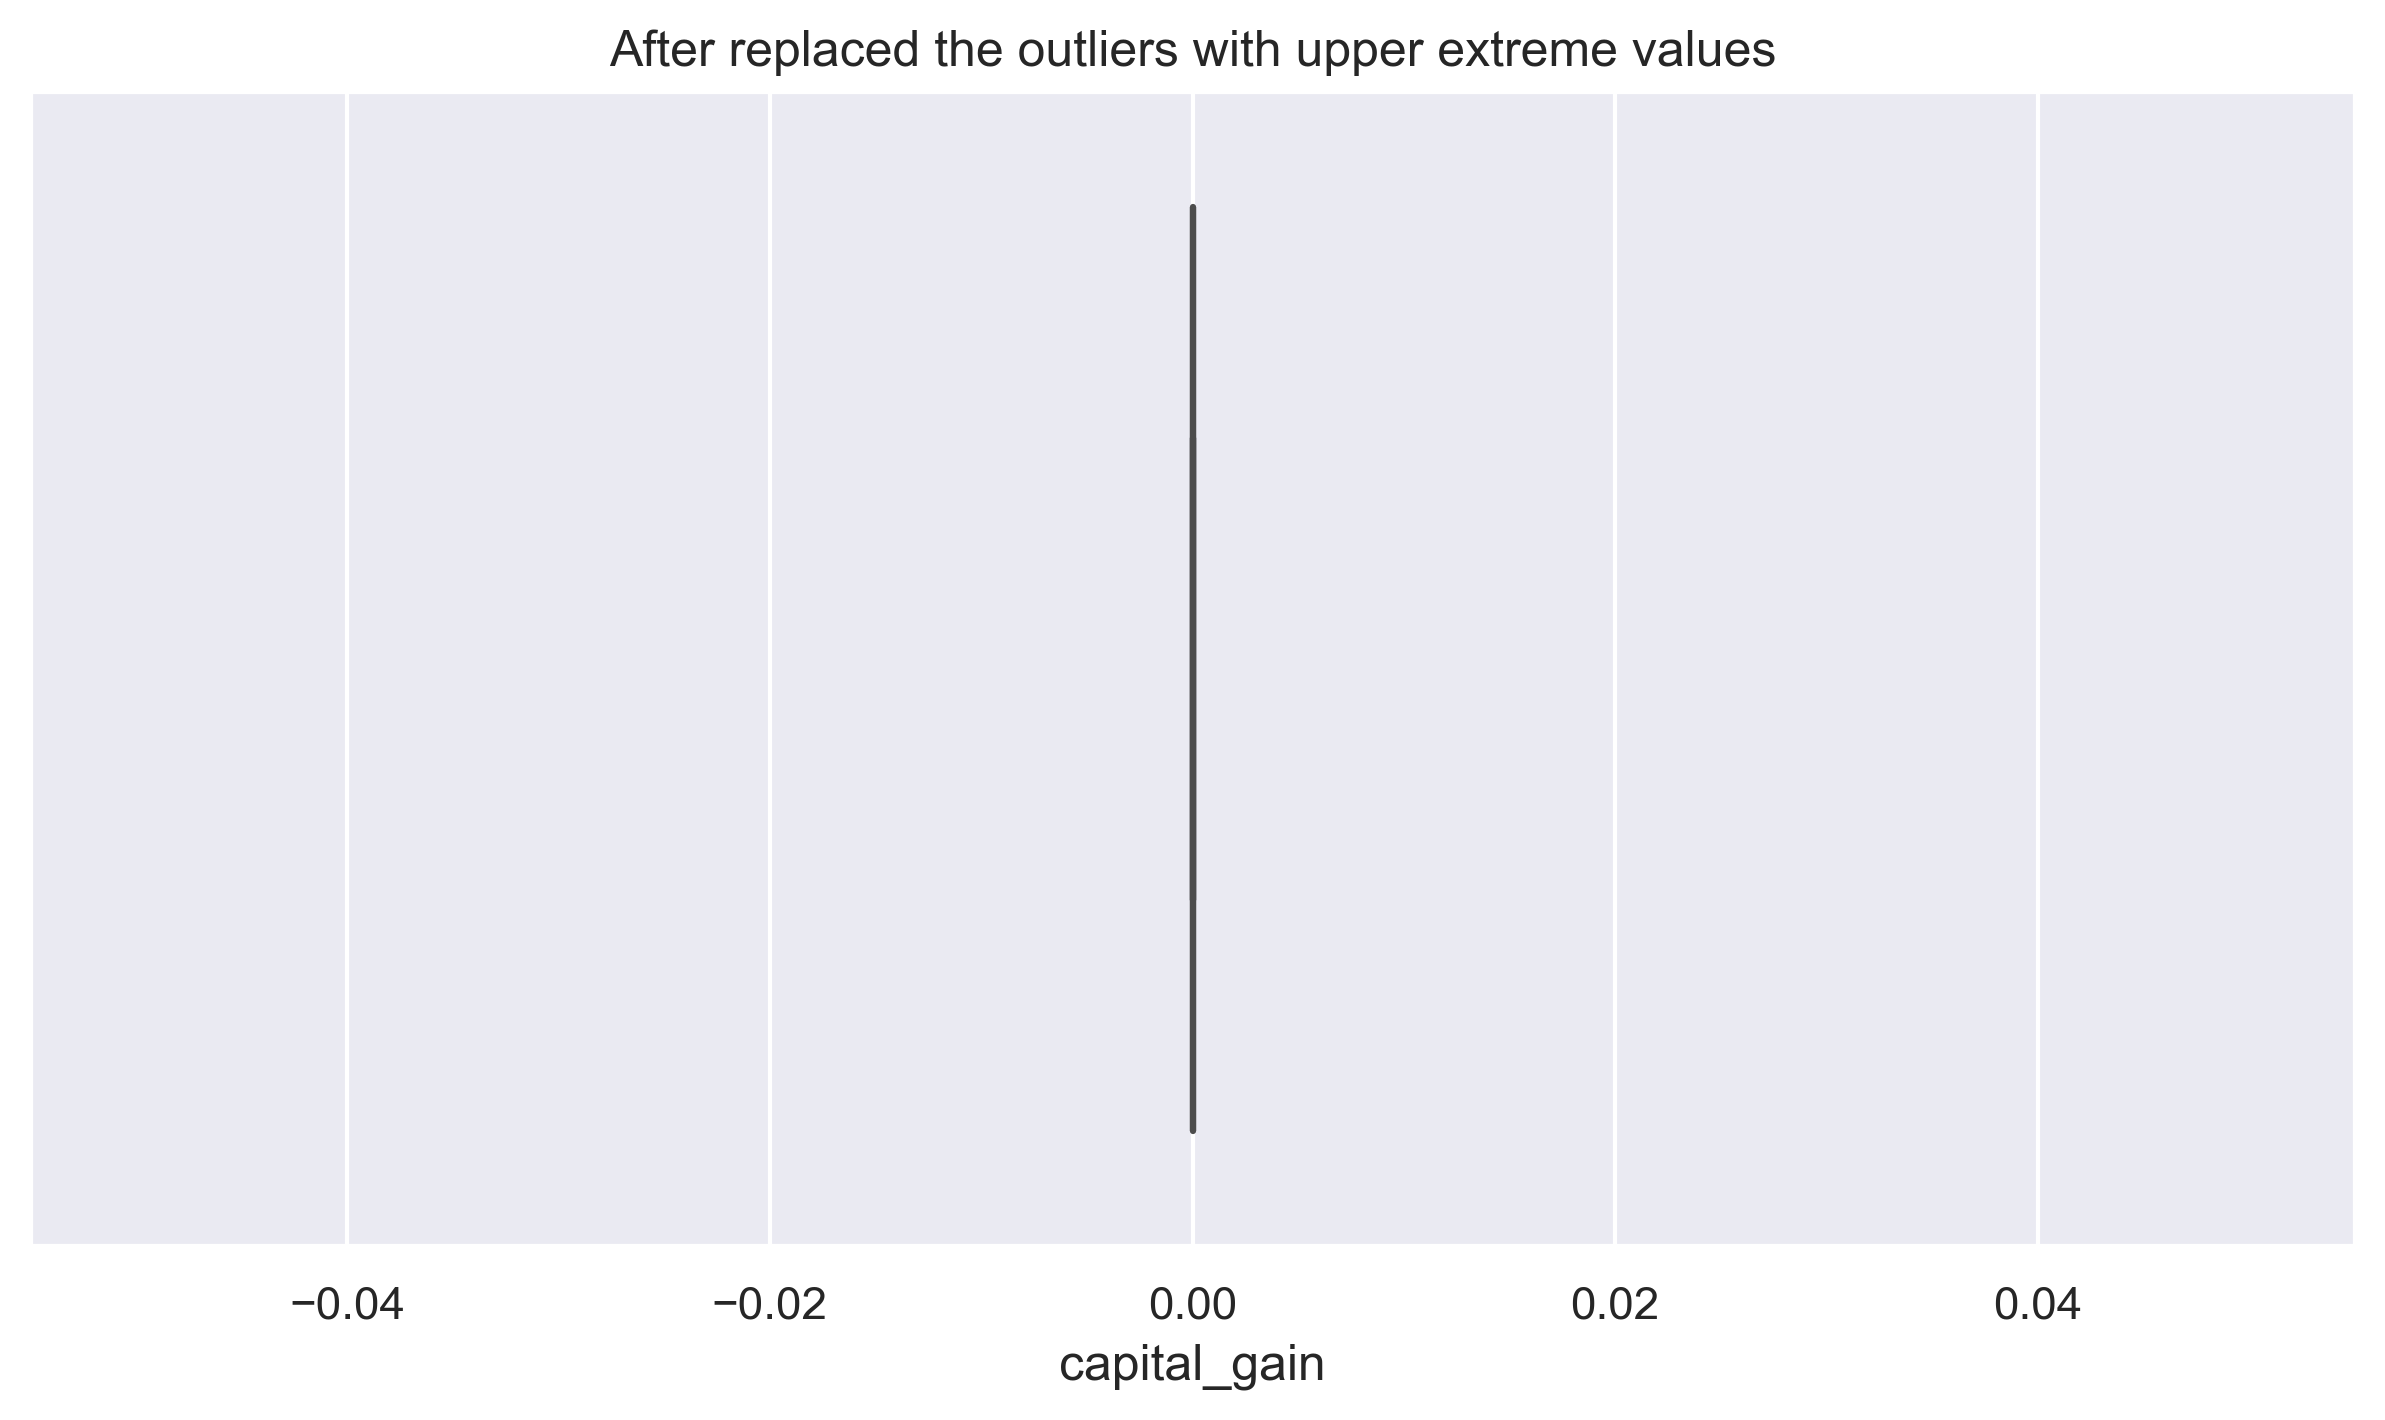

In [37]:
sns.boxplot(x = df["capital_gain"])
plt.xlabel("capital_gain")
plt.title("After replaced the outliers with upper extreme values")

In [38]:
outlier_detection(df, "capital_loss")

(0.0, 0.0)

Text(0.5, 1.0, 'Before replacing the outliers with upper extreme values')

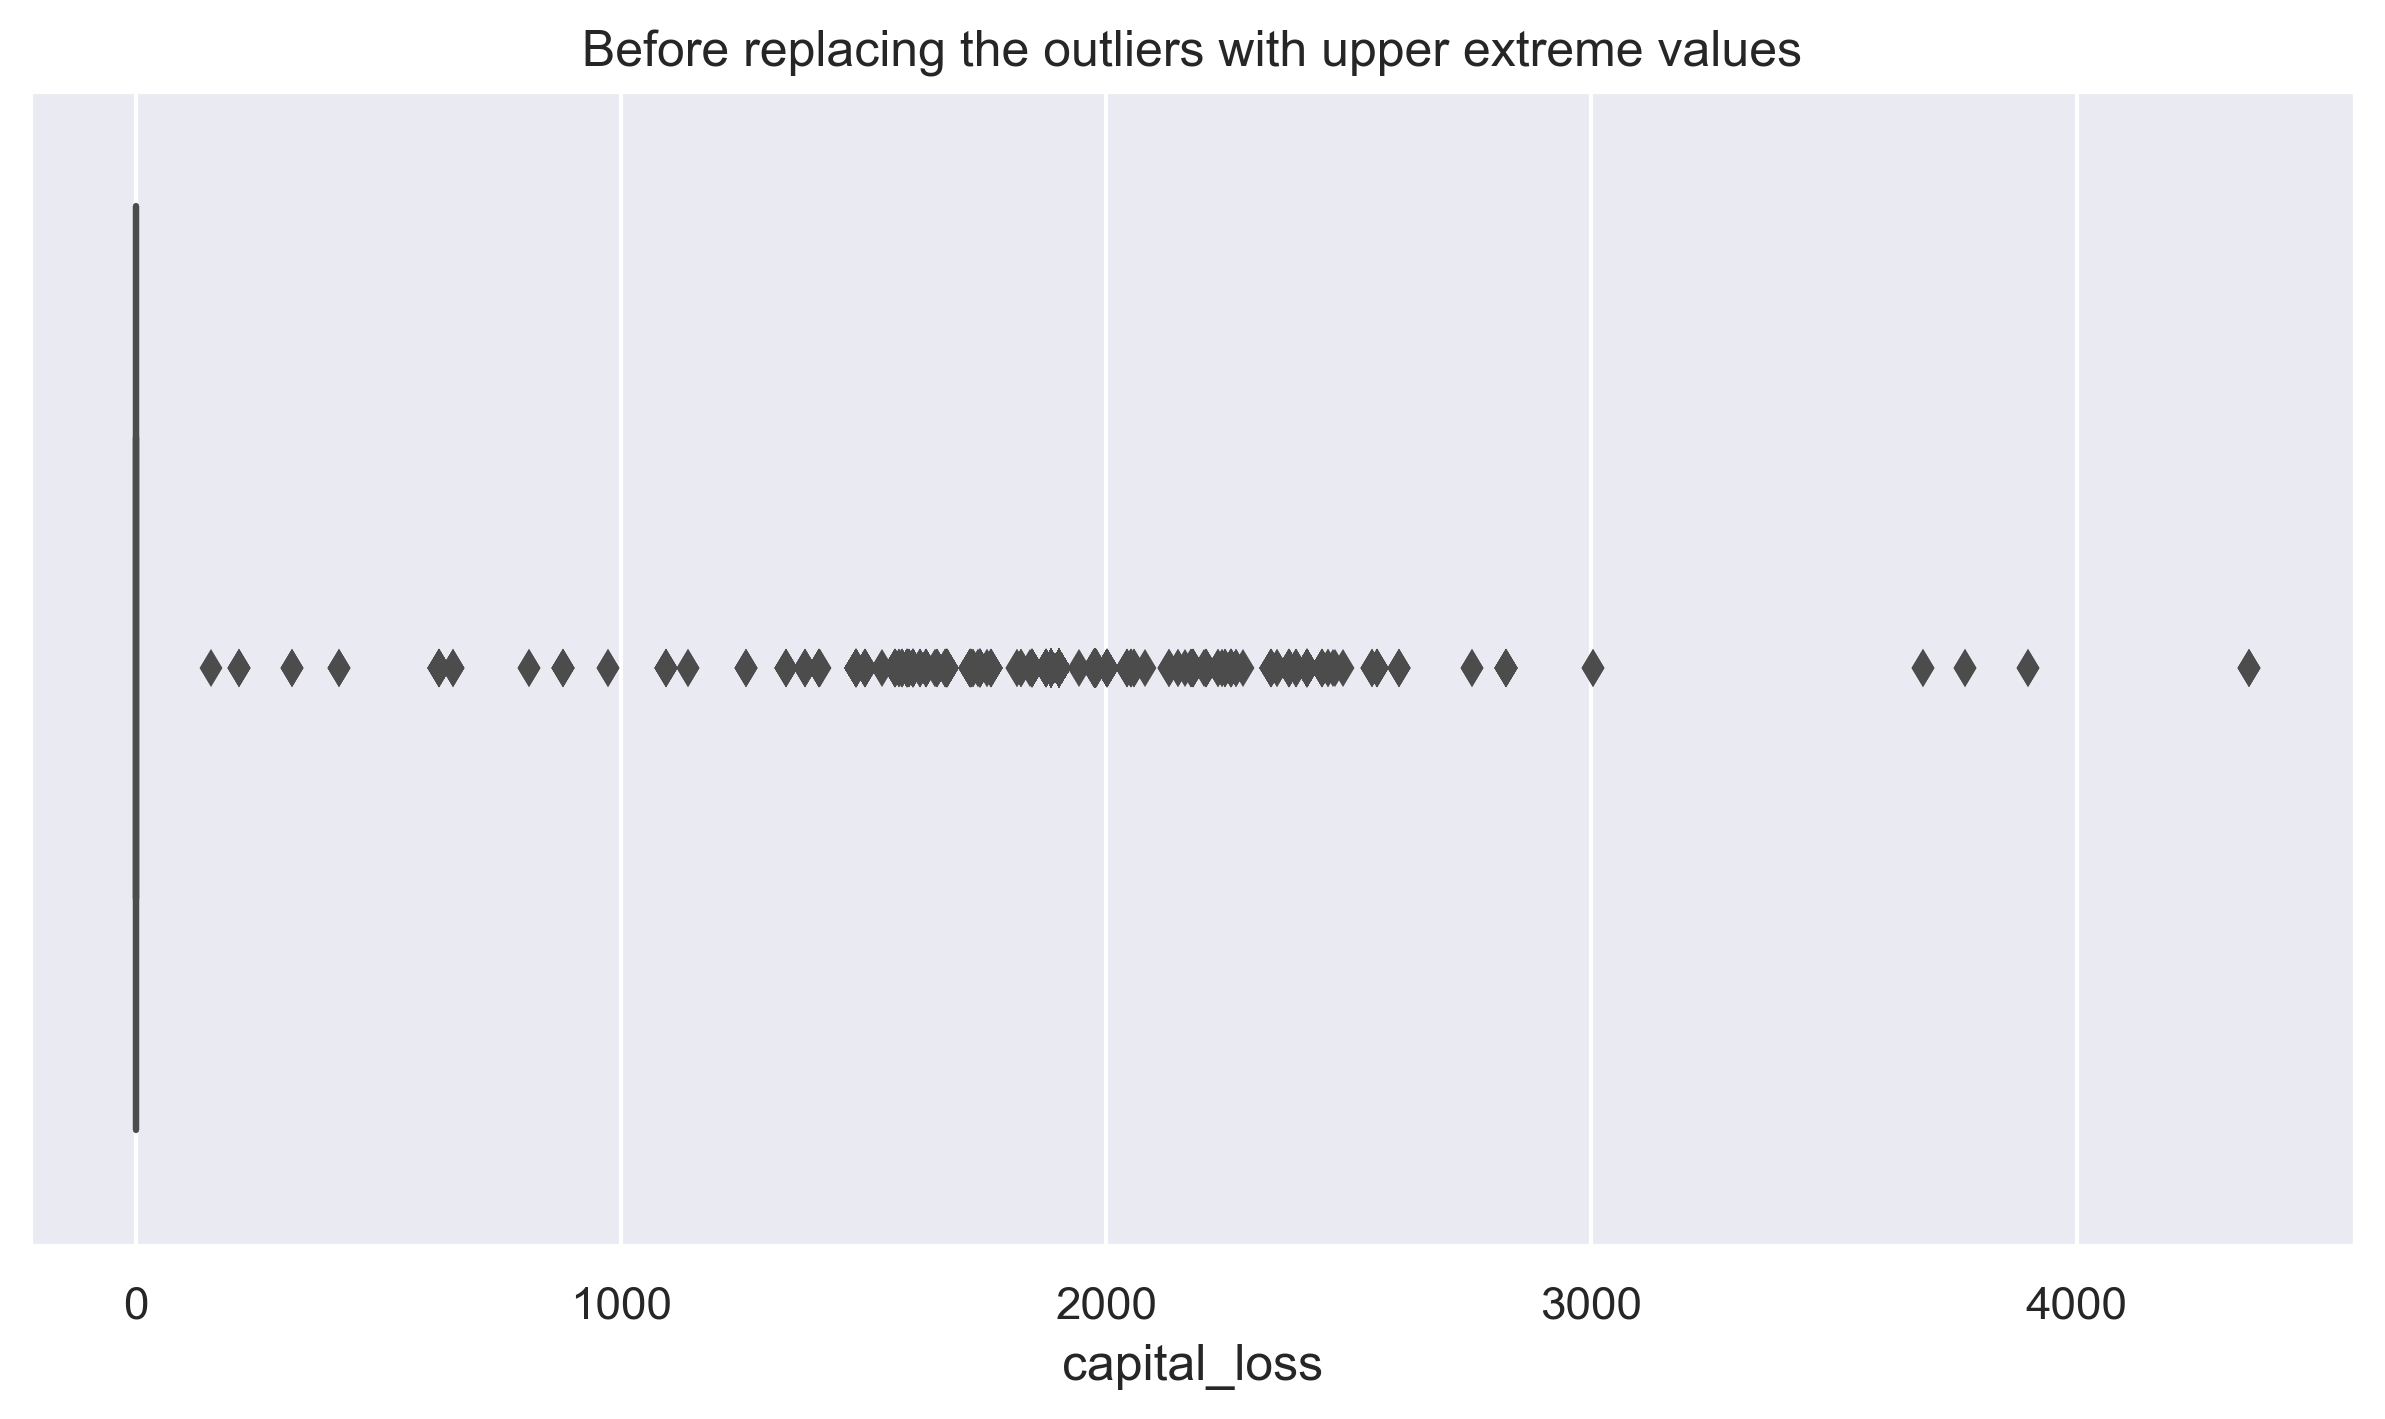

In [39]:
sns.boxplot(x = df["capital_loss"])
plt.xlabel("capital_loss")
plt.title("Before replacing the outliers with upper extreme values")

In [40]:
df.loc[df["capital_loss"]>0.0, "capital_loss"] = 0.0

Text(0.5, 1.0, 'After replaced the outliers with upper extreme values')

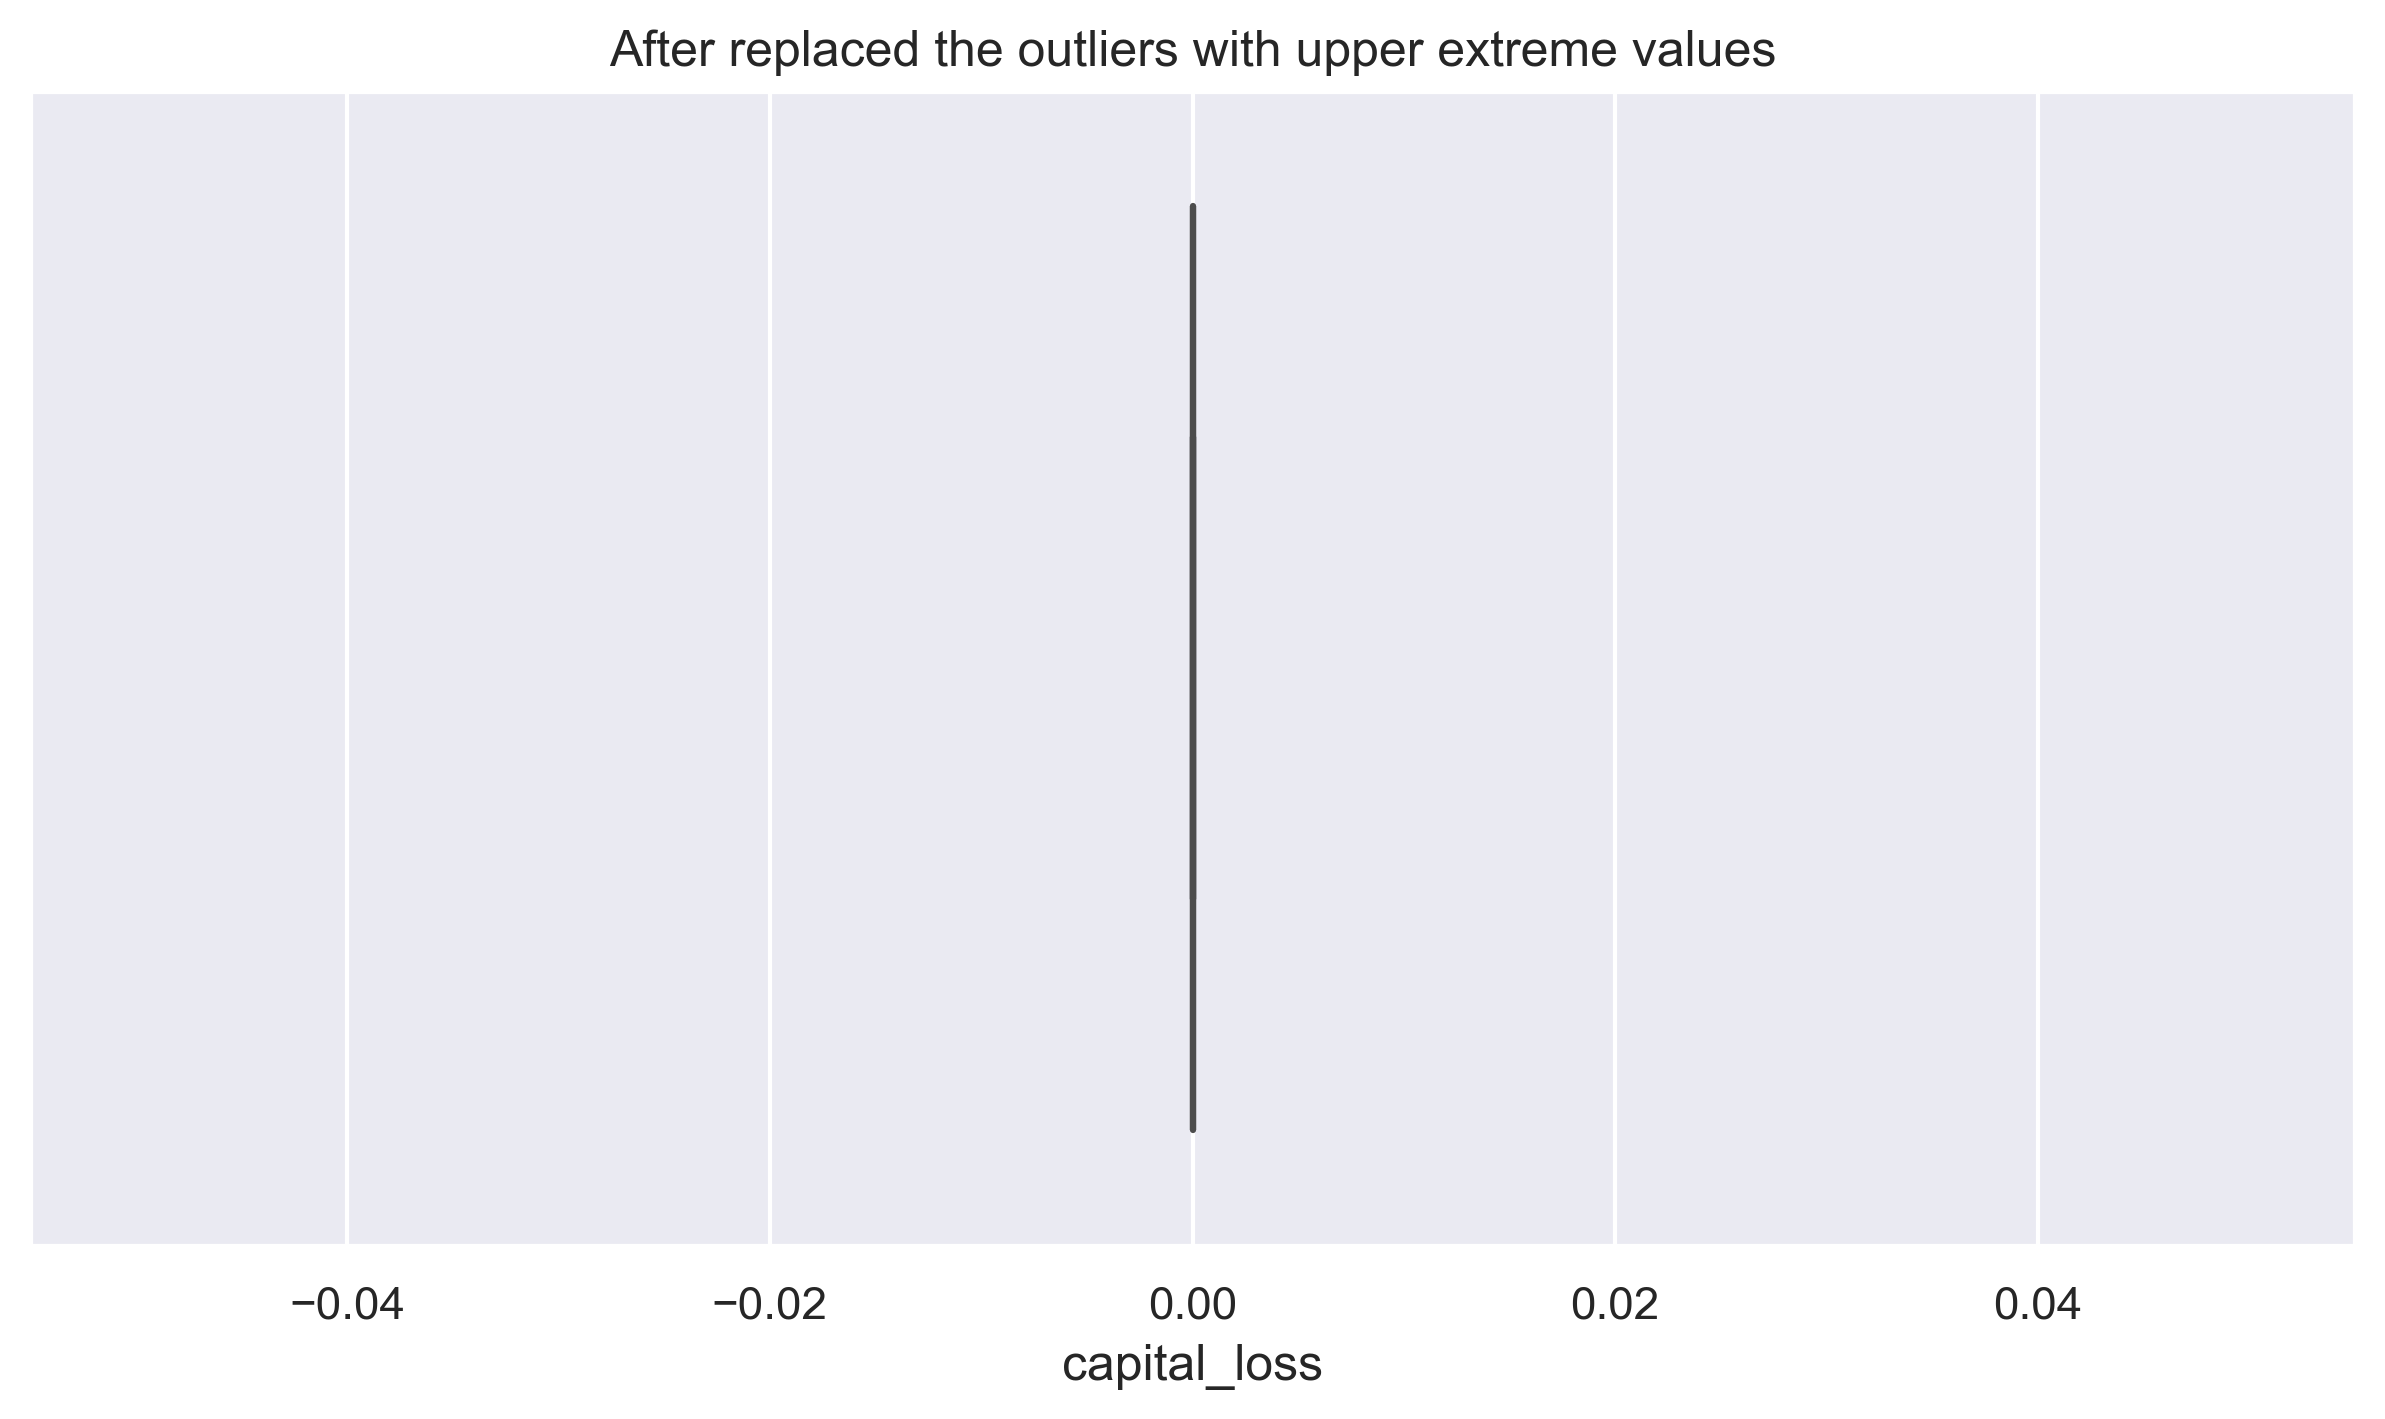

In [41]:
sns.boxplot(x = df["capital_loss"])
plt.xlabel("capital_loss")
plt.title("After replaced the outliers with upper extreme values")

In [42]:
outlier_detection(df, "hours_per_week")

(32.5, 52.5)

Text(0.5, 1.0, 'Before replacing the outliers with upper and lower extreme values')

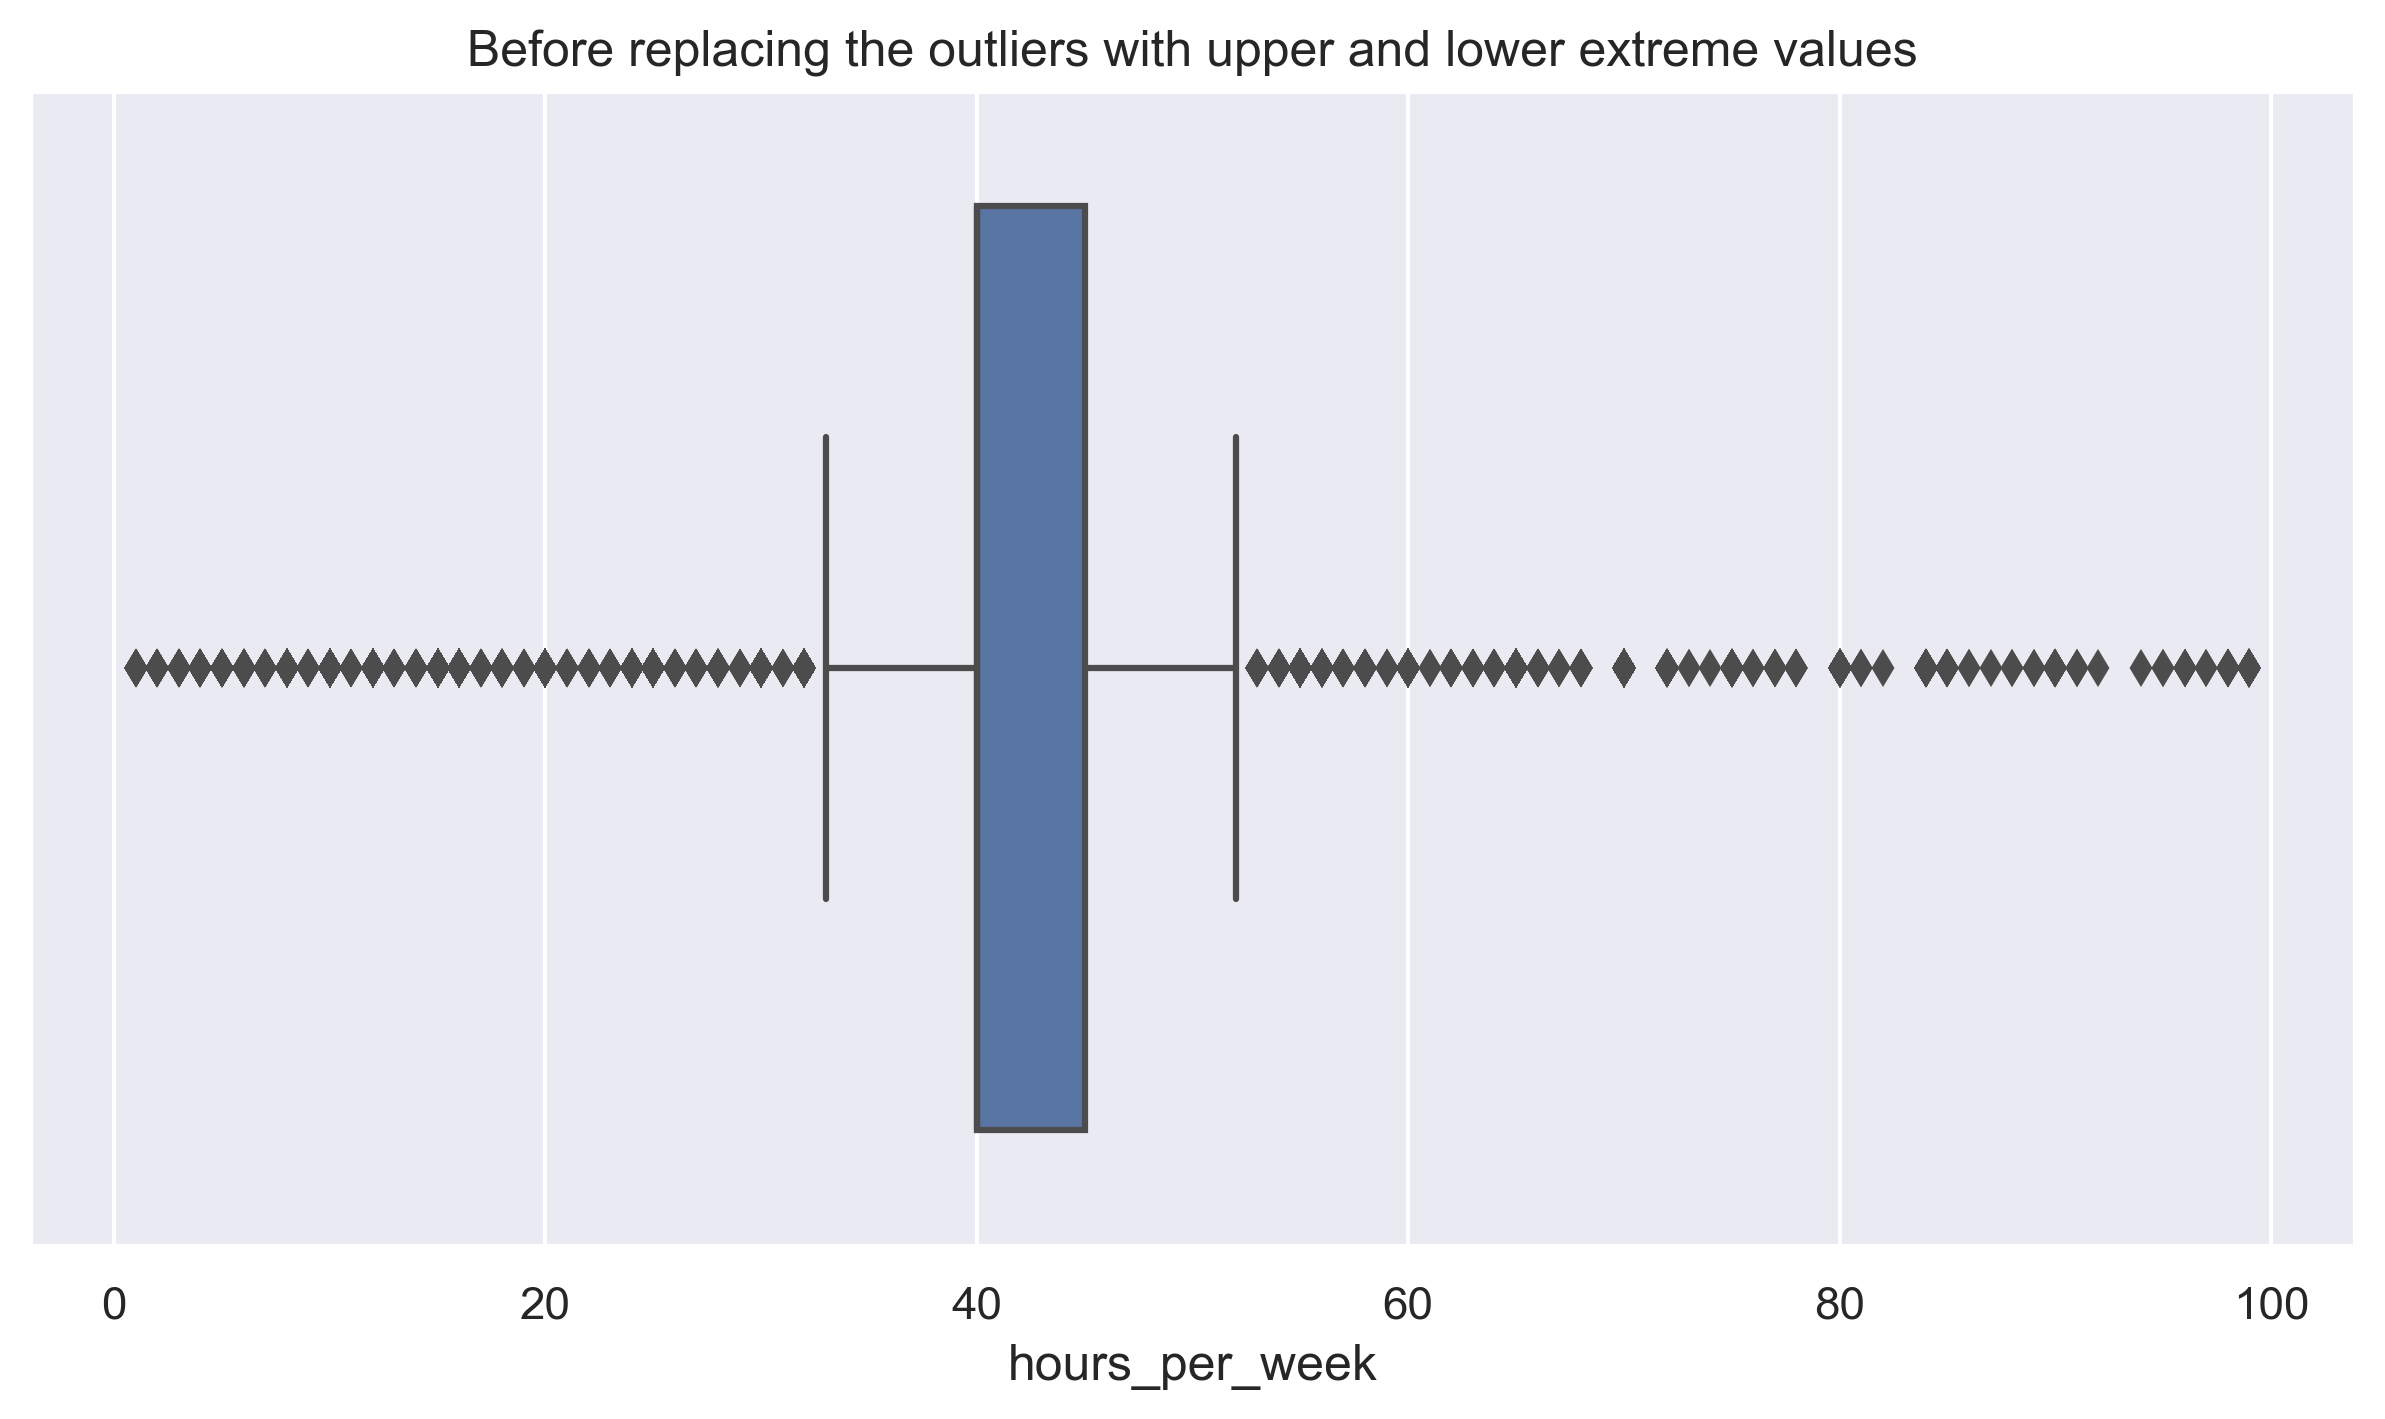

In [43]:
sns.boxplot(x = df["hours_per_week"])
plt.xlabel("hours_per_week")
plt.title("Before replacing the outliers with upper and lower extreme values")

In [44]:
df.loc[df["hours_per_week"]>52.5, "hours_per_week"] = 52.5

In [45]:
df.loc[df["hours_per_week"]<32.5, "hours_per_week"] = 32.5

Text(0.5, 1.0, 'After replaced the outliers with upper and lower extreme values')

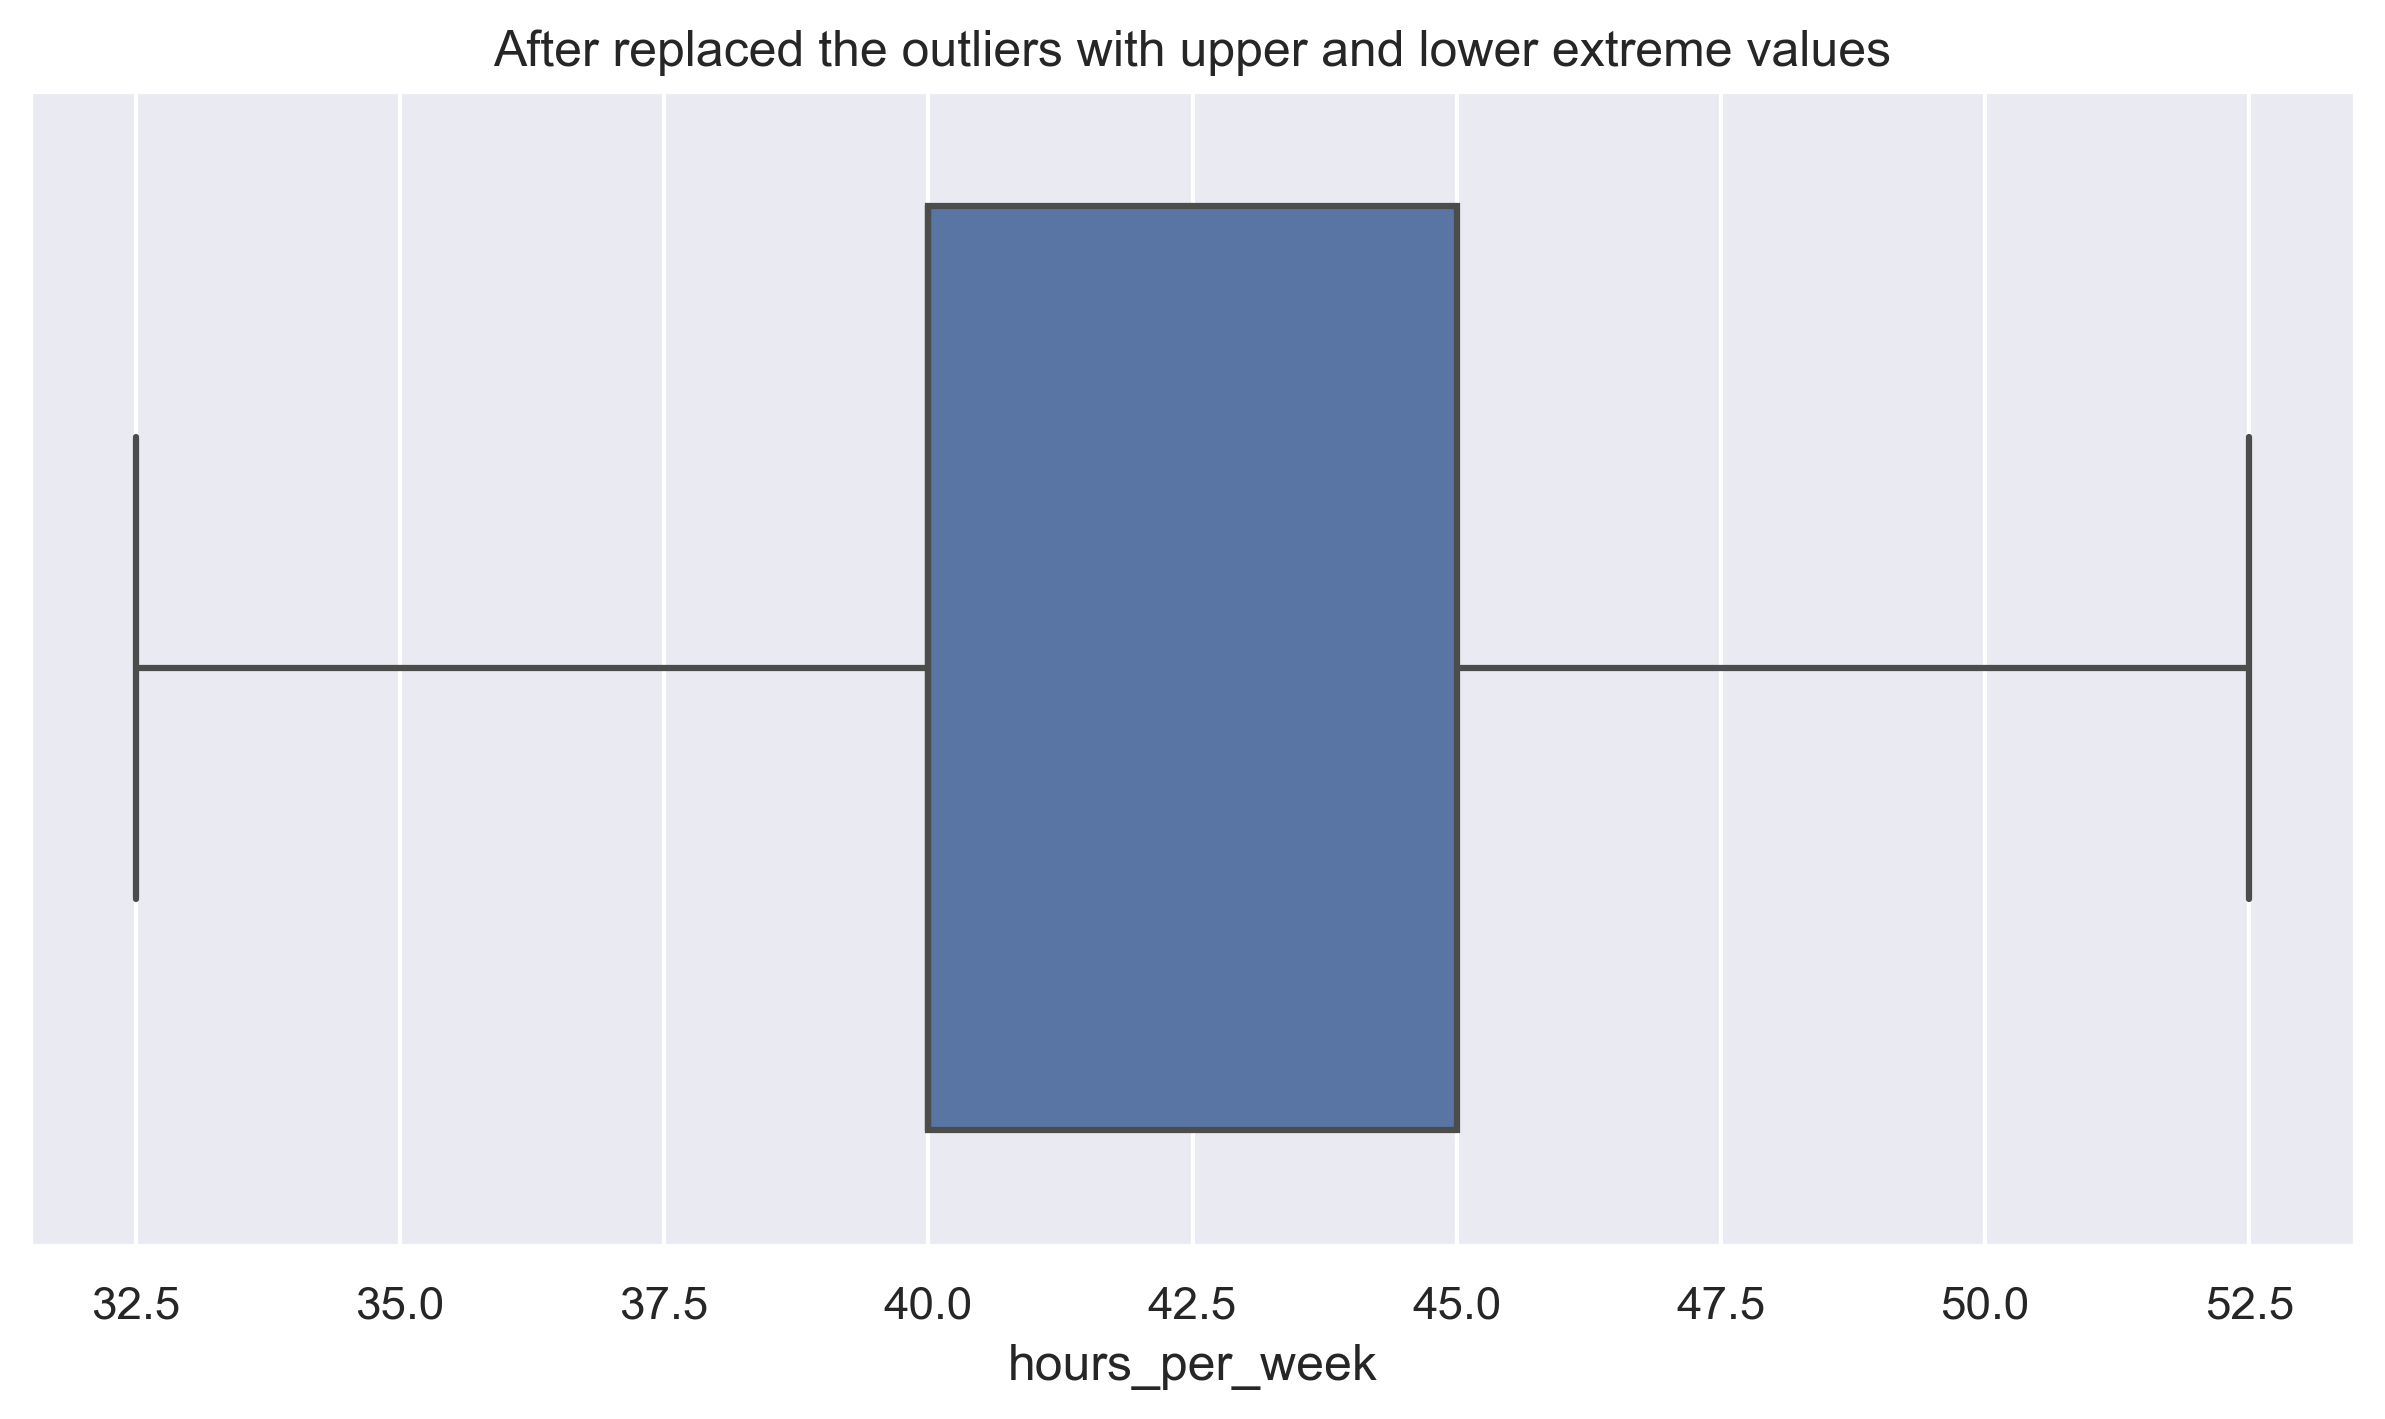

In [46]:
sns.boxplot(x = df["hours_per_week"])
plt.xlabel("hours_per_week")
plt.title("After replaced the outliers with upper and lower extreme values")

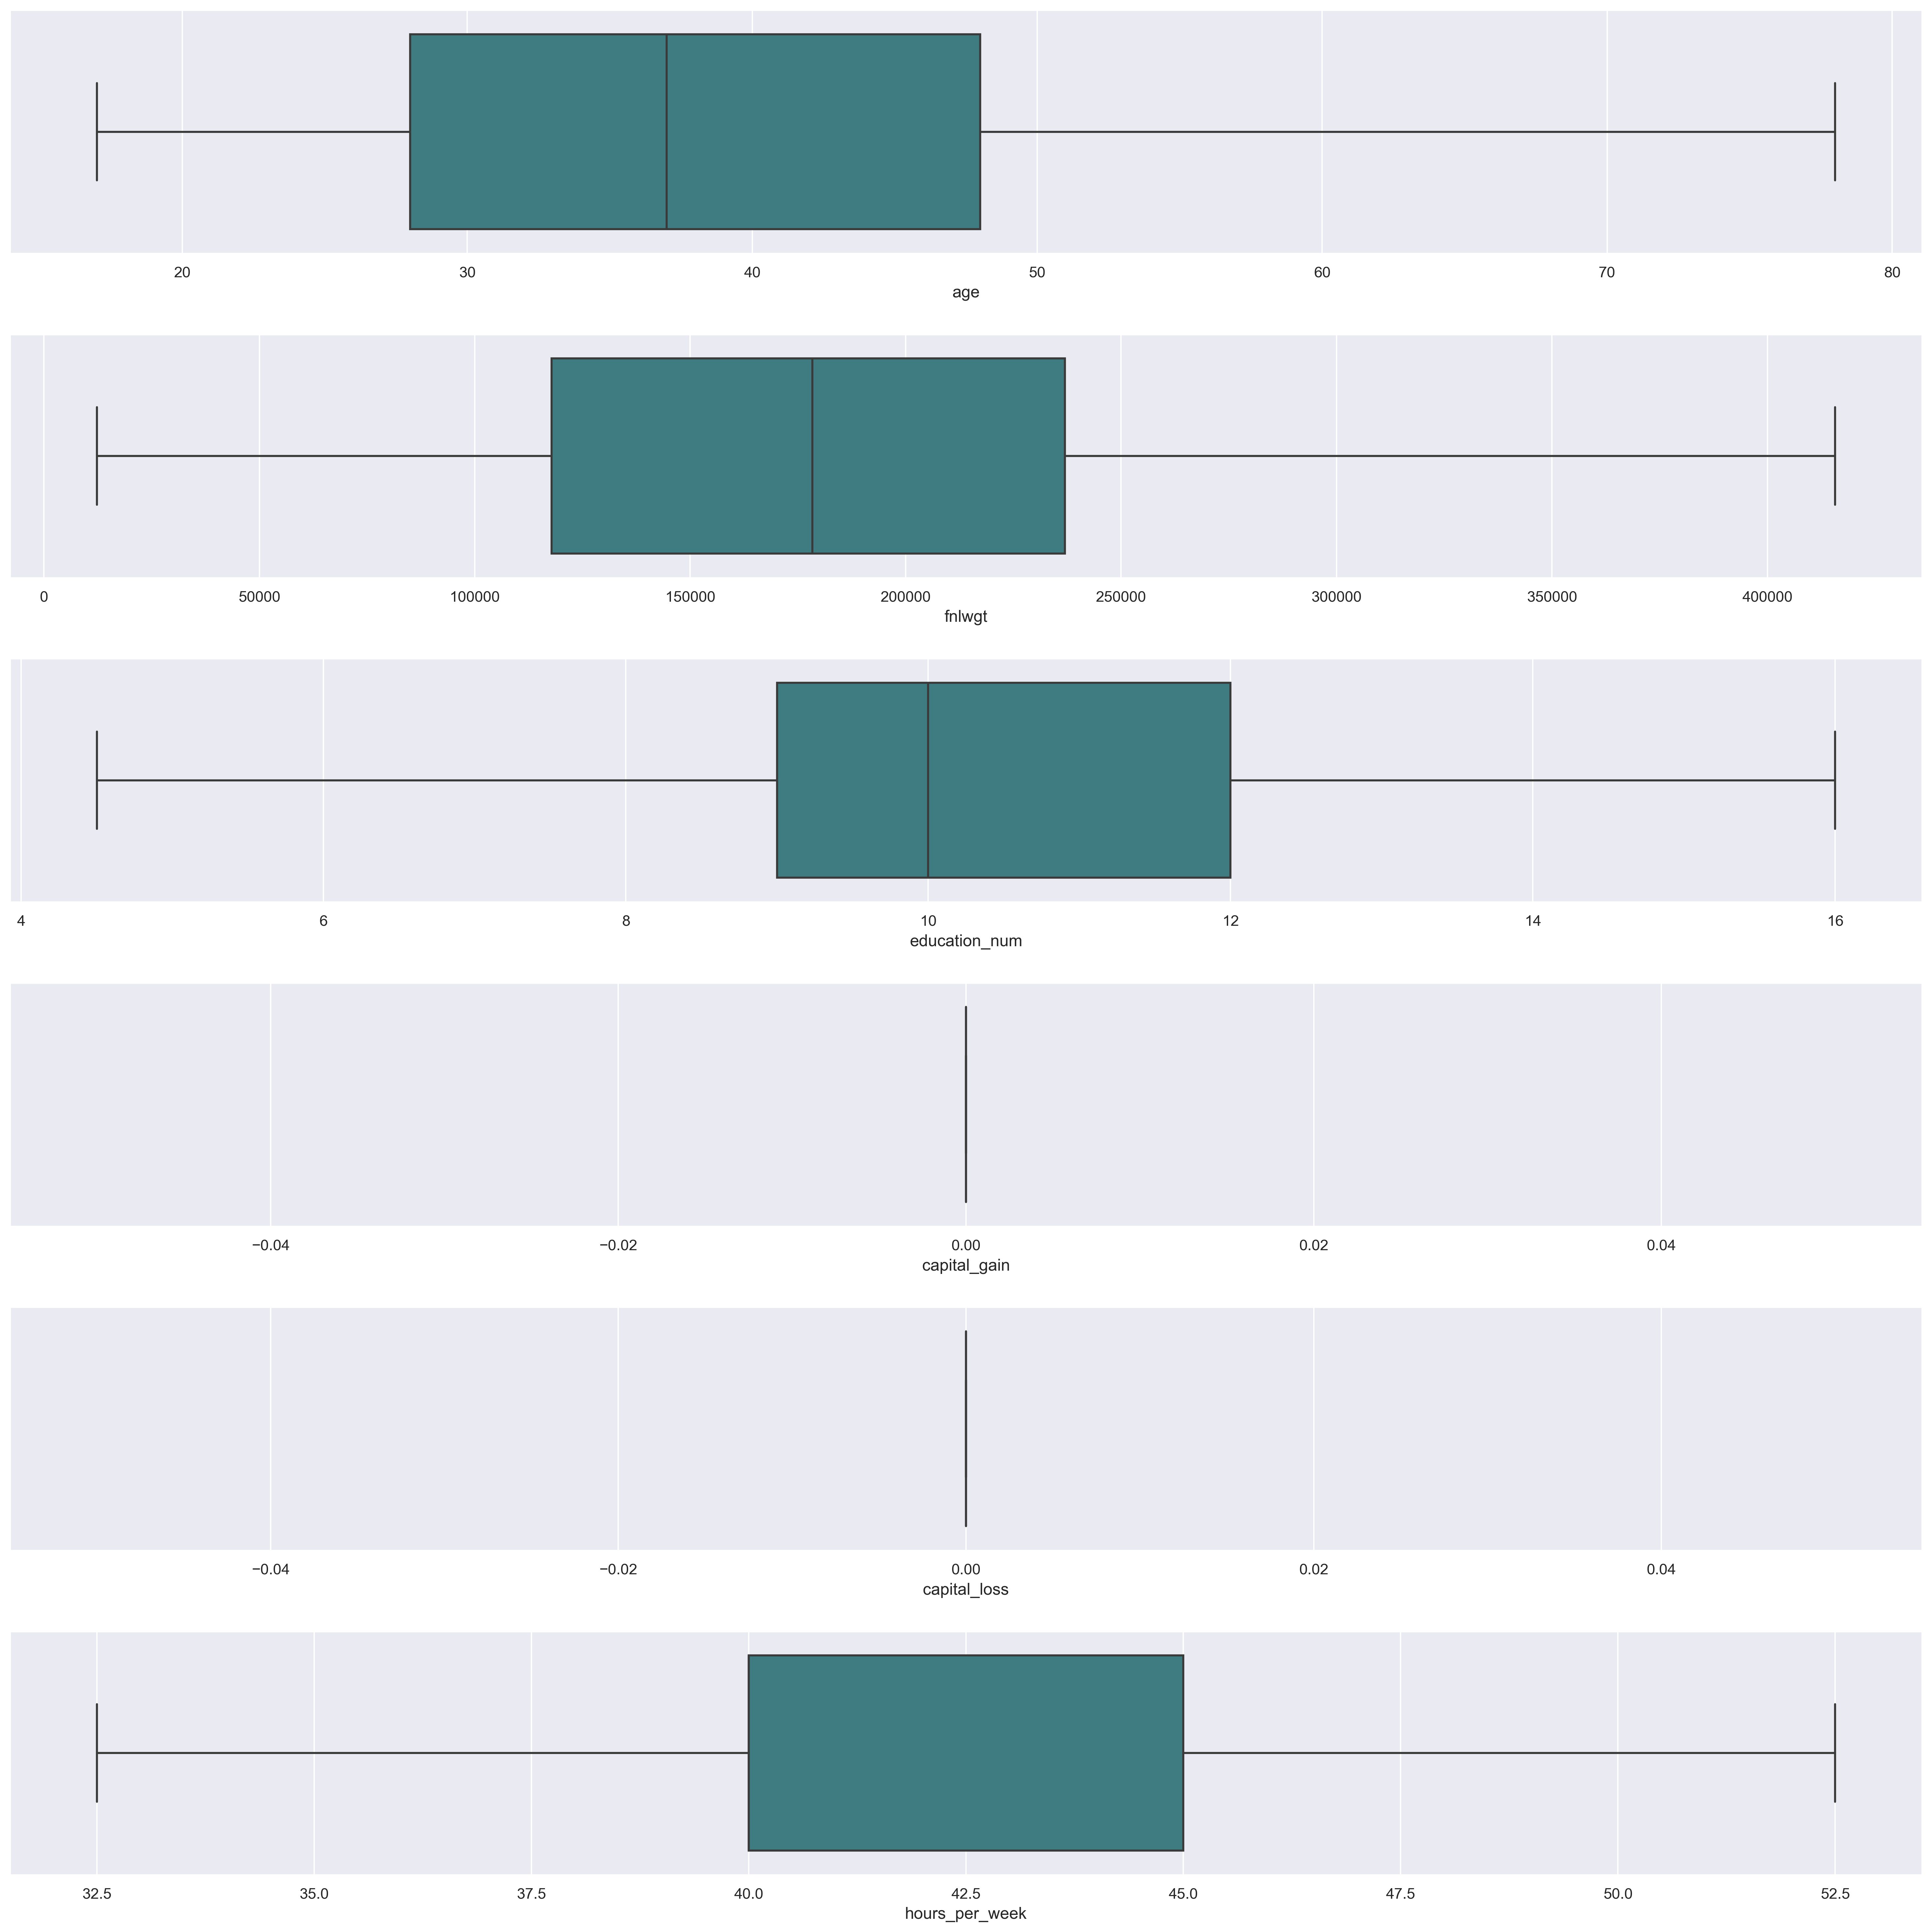

In [47]:
ot=df.copy() 
fig, axes=plt.subplots(6,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='fnlwgt',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='education_num',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='capital_gain',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='capital_loss',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='hours_per_week',data=ot,palette='crest',ax=axes[5])
plt.tight_layout(pad=2.0)

# Scatter Plot and Correlation

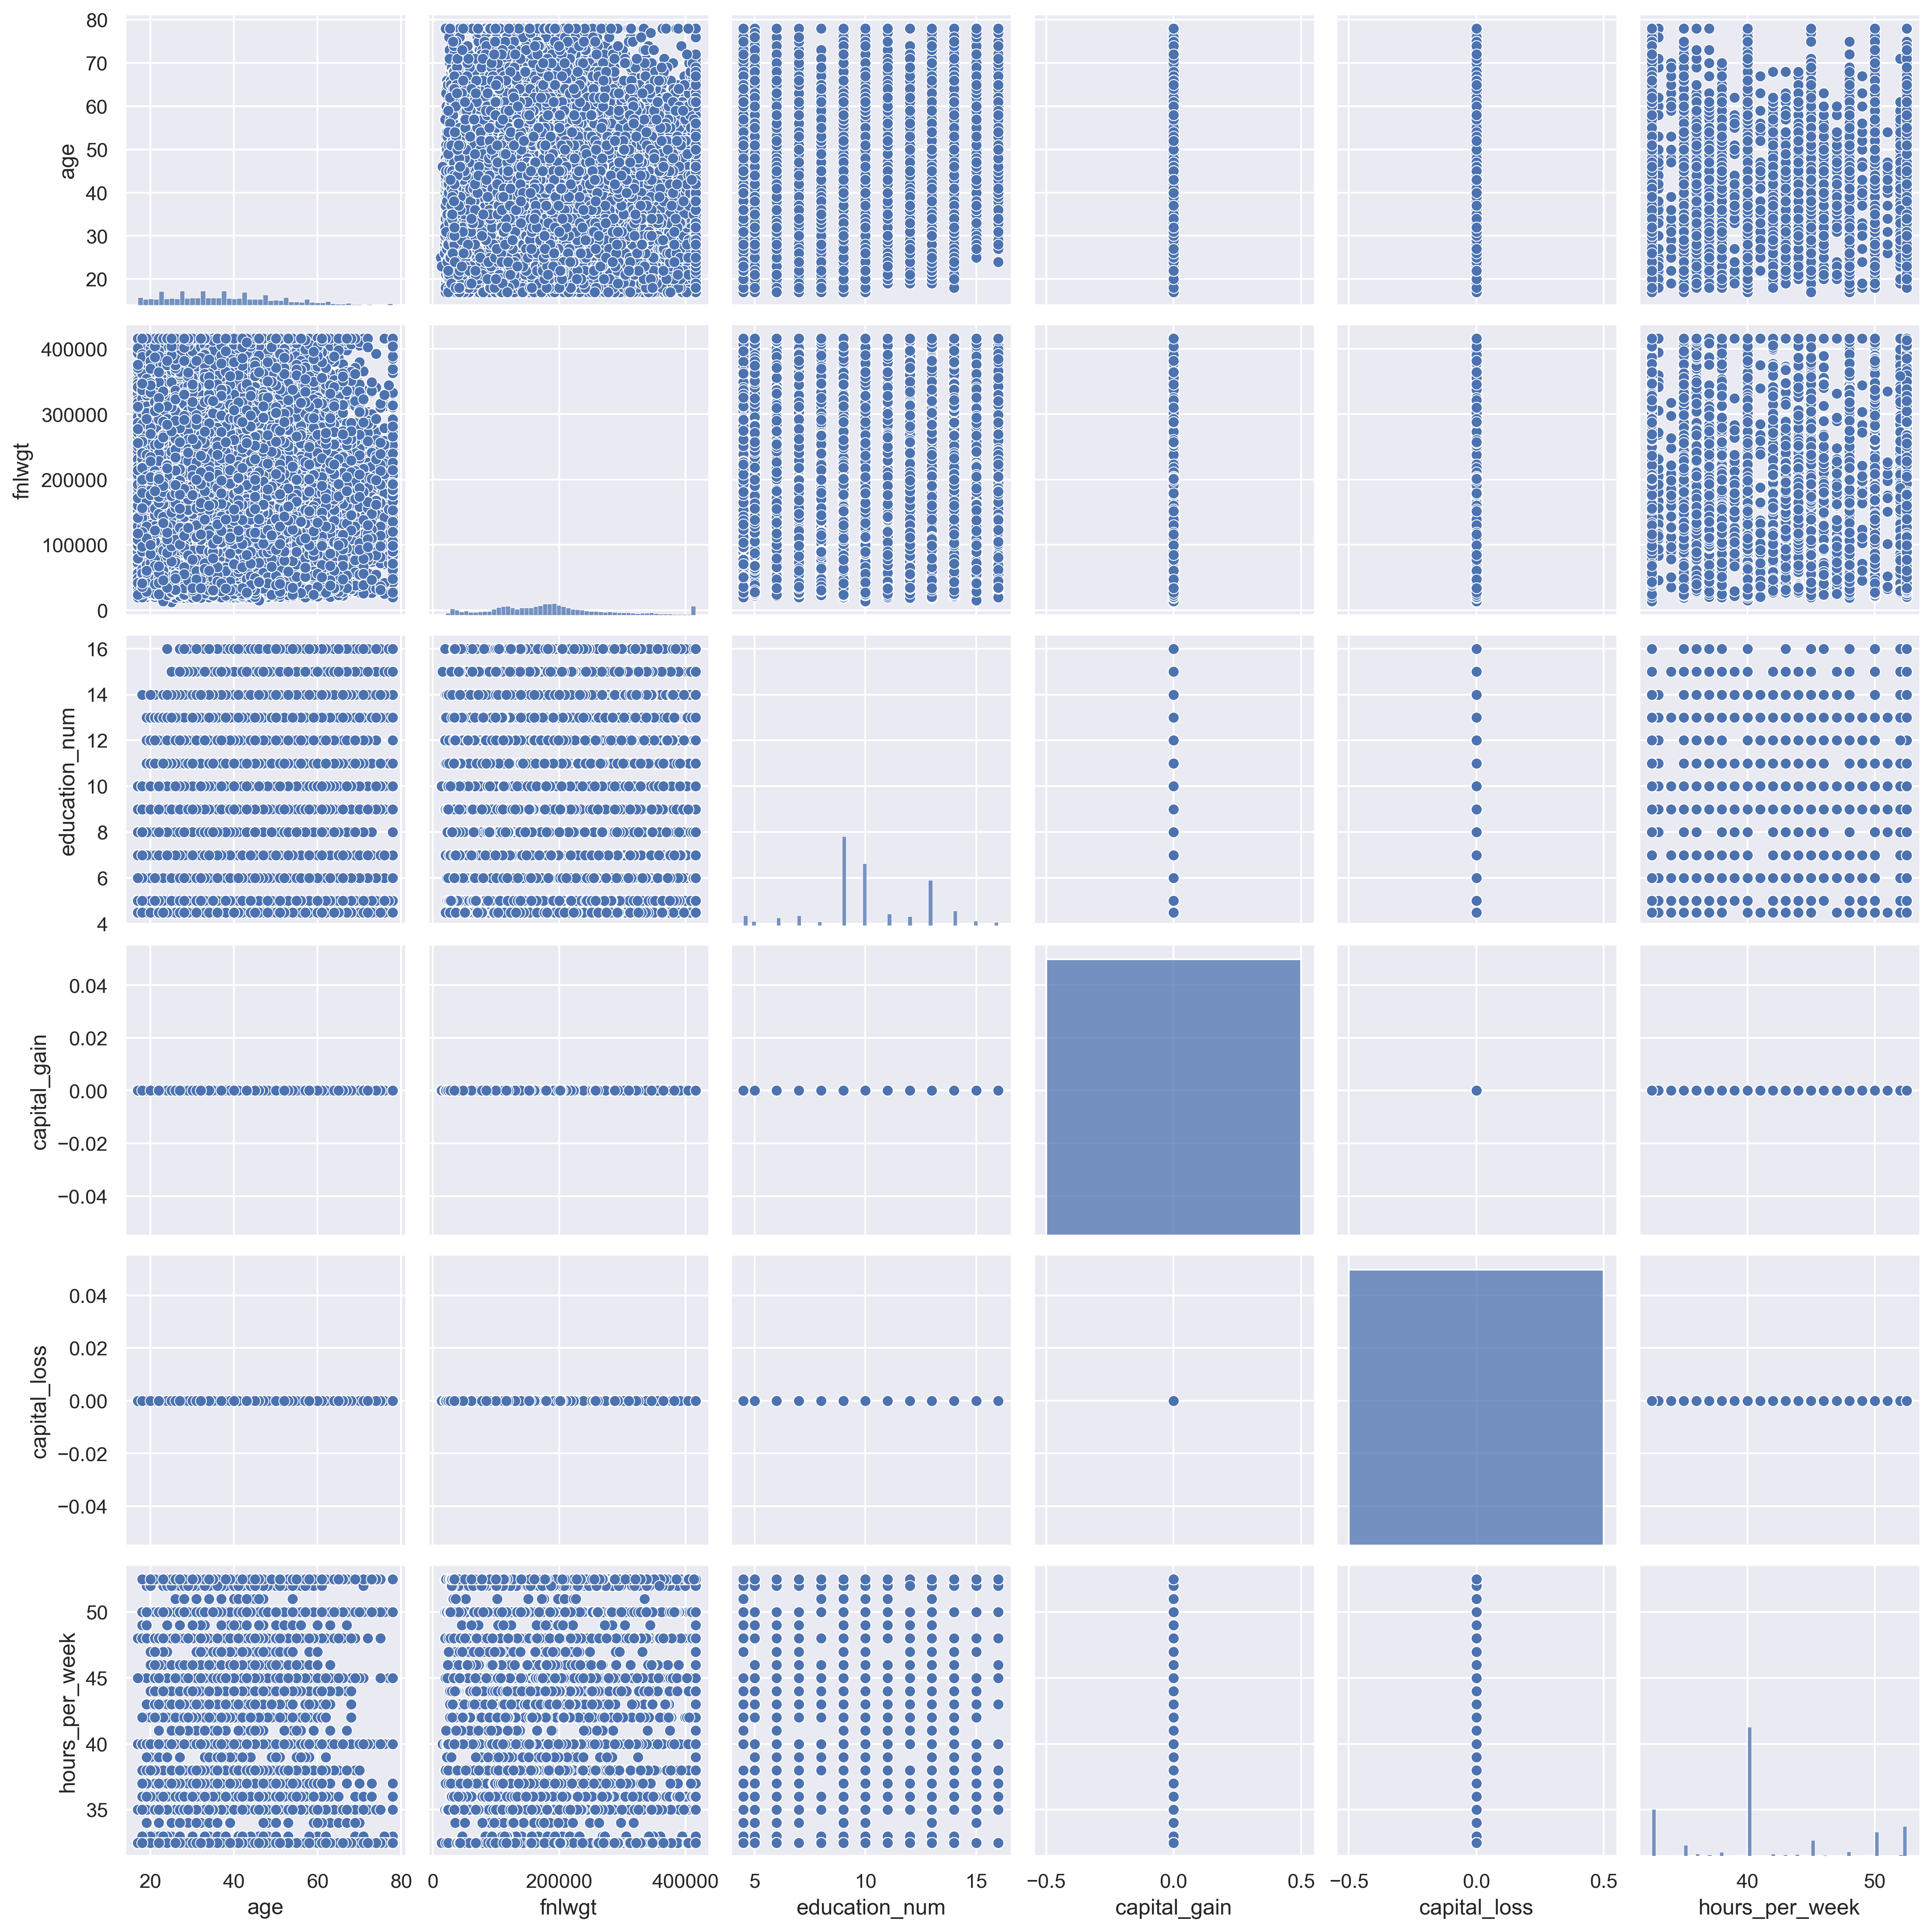

In [48]:
sns.pairplot(df)

# Correlation coefficient

In [49]:
df.corr(numeric_only=True)

age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.077169       0.047012           NaN           NaN   
fnlwgt         -0.077169  1.000000      -0.039794           NaN           NaN   
education_num   0.047012 -0.039794       1.000000           NaN           NaN   
capital_gain         NaN       NaN            NaN           NaN           NaN   
capital_loss         NaN       NaN            NaN           NaN           NaN   
hours_per_week  0.091242 -0.025753       0.184978           NaN           NaN   

                hours_per_week  
age                   0.091242  
fnlwgt               -0.025753  
education_num         0.184978  
capital_gain               NaN  
capital_loss               NaN  
hours_per_week        1.000000

<Axes: >

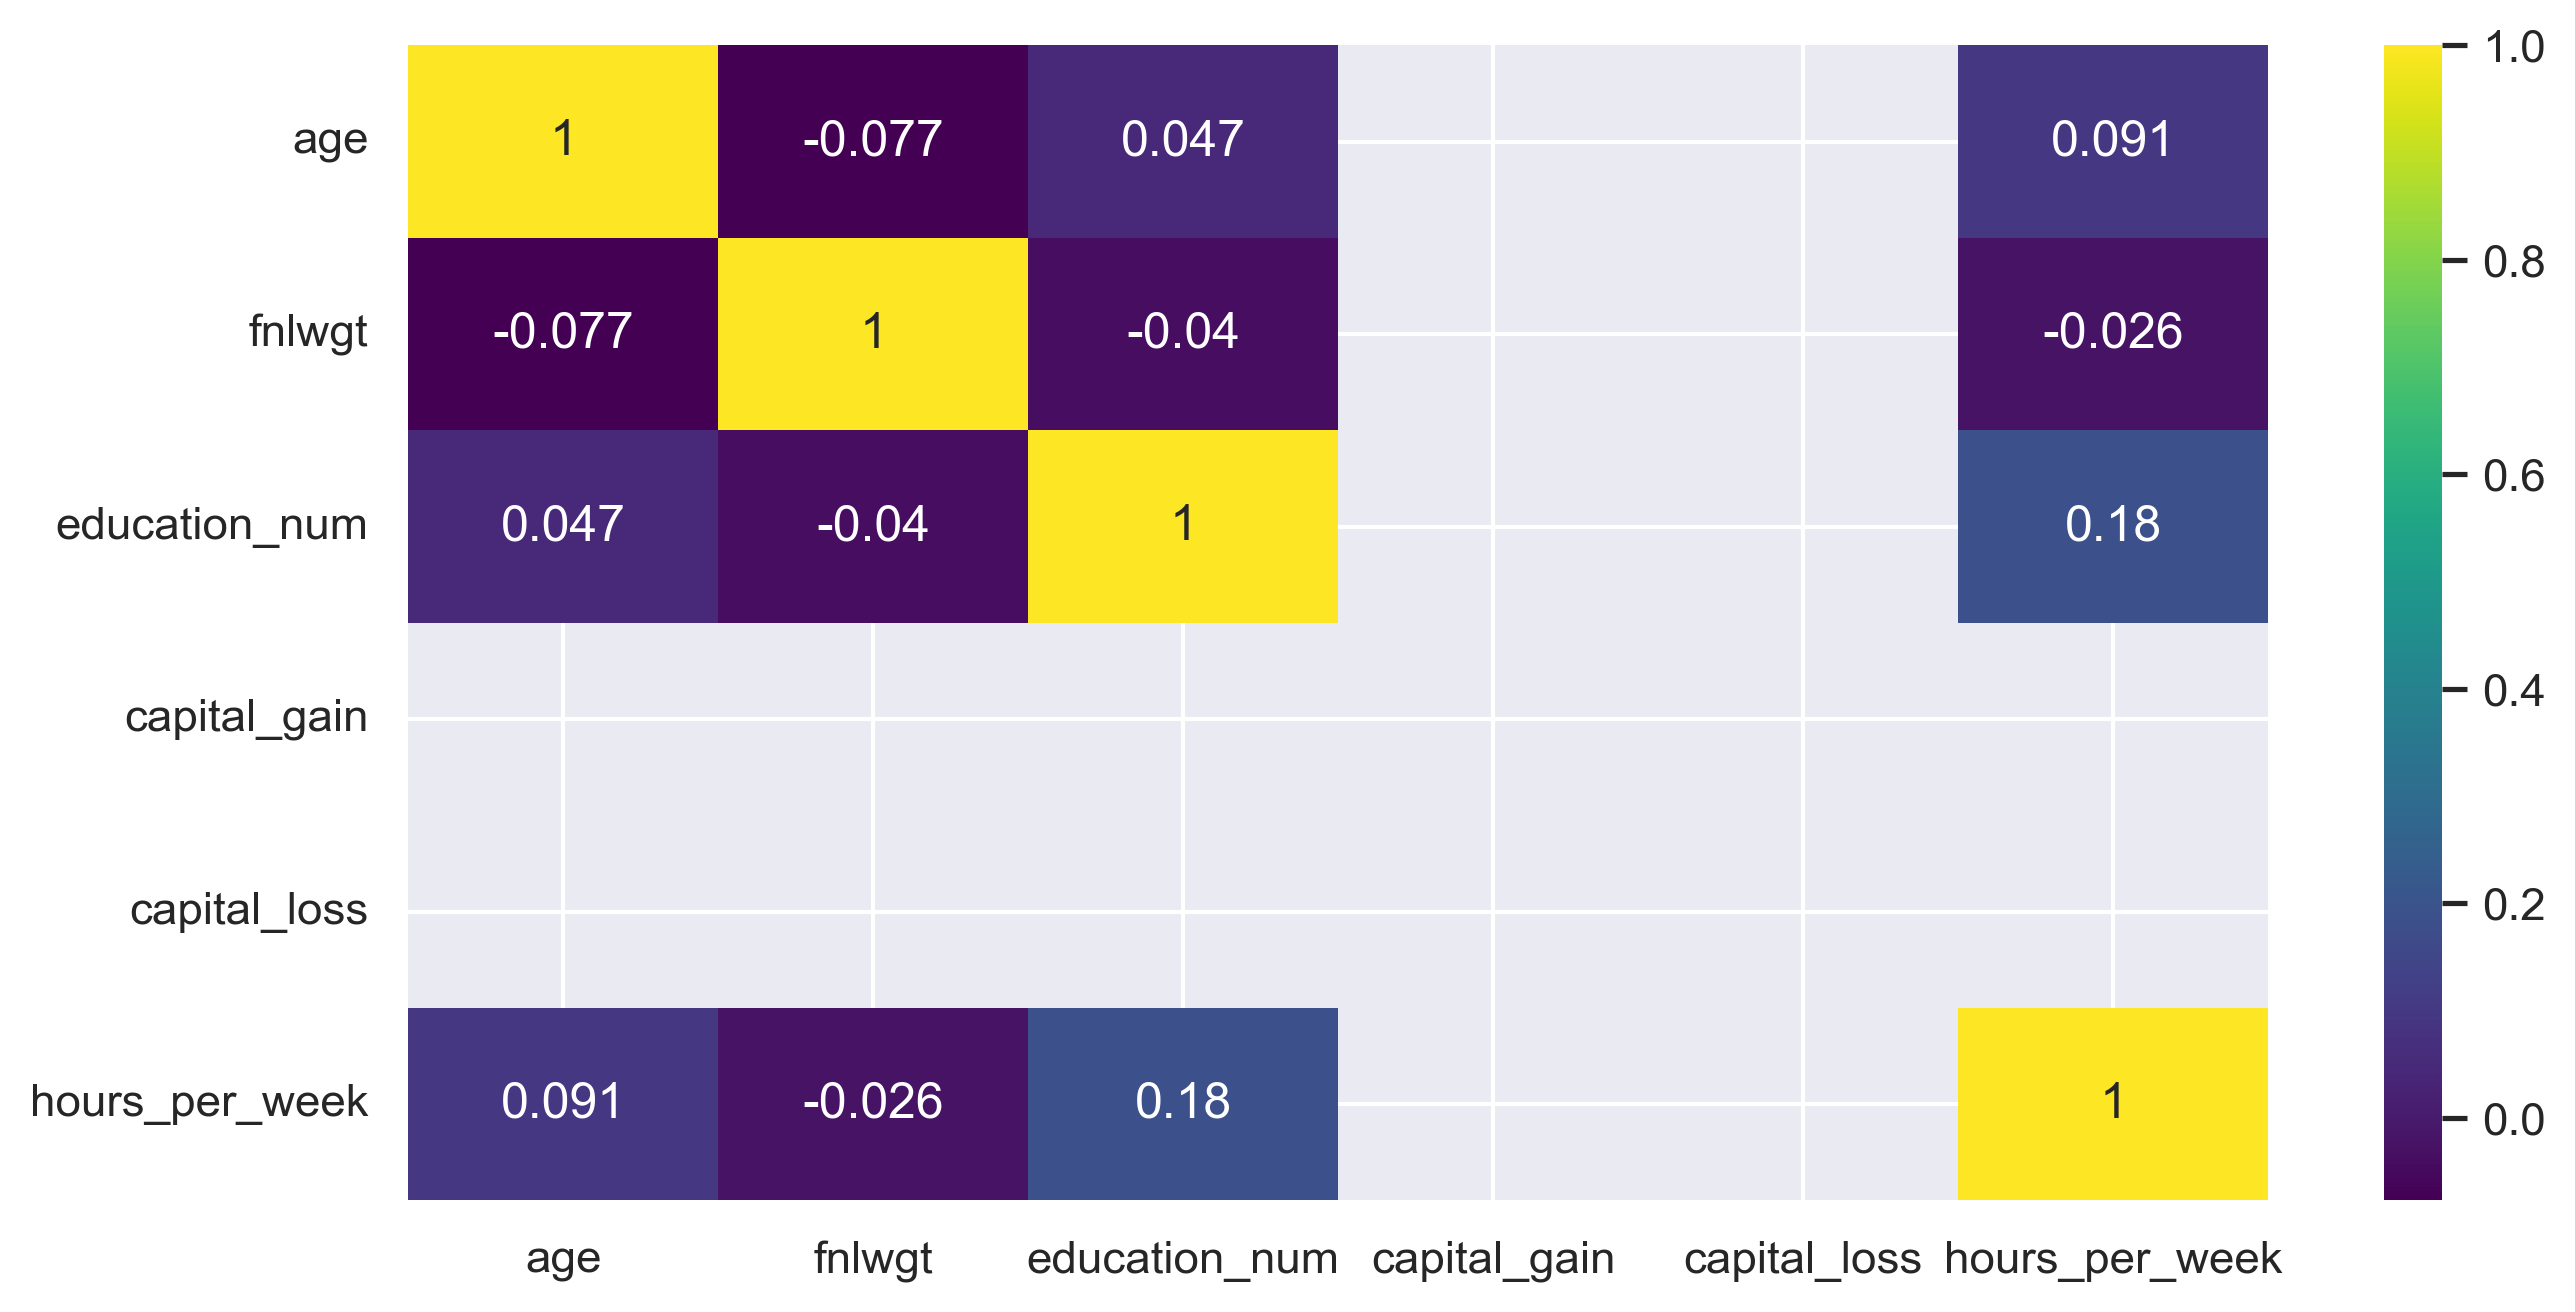

In [50]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [51]:
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors           13.0   
1   50   Self-emp-not-inc   83311   Bachelors           13.0   
2   38            Private  215646     HS-grad            9.0   
3   53            Private  234721        11th            7.0   
4   28            Private  338409   Bachelors           13.0   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0             0             0            40.0   United-States   <=50K  
1             0             0            32.5   United-States   <=50K  
2             0             0            40.0   United-States   <=50K  
3             0             0            40.0   United-States   <=50K  
4             0             0            40.0            Cuba   <=50K

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  int64  
 1   workclass       32537 non-null  object 
 2   fnlwgt          32537 non-null  int64  
 3   education       32537 non-null  object 
 4   education_num   32537 non-null  float64
 5   marital_status  32537 non-null  object 
 6   occupation      32537 non-null  object 
 7   relationship    32537 non-null  object 
 8   race            32537 non-null  object 
 9   sex             32537 non-null  object 
 10  capital_gain    32537 non-null  int64  
 11  capital_loss    32537 non-null  int64  
 12  hours_per_week  32537 non-null  float64
 13  native_country  32537 non-null  object 
 14  income          32537 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 4.0+ MB


In [53]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week    float64
native_country     object
income             object
dtype: object

# While looking at the data types listed above, nine columns have categories. Hence, according to the problem specifications, I have to choose up the first three columns for one hot encoding and the next six columns for label encoding methods.

# Encoding using pandas dummy function.

In [54]:
df = pd.get_dummies(data=df, columns= ["workclass", "education", "marital_status"])

In [55]:
df

age  fnlwgt  education_num          occupation    relationship    race  \
0       39   77516           13.0        Adm-clerical   Not-in-family   White   
1       50   83311           13.0     Exec-managerial         Husband   White   
2       38  215646            9.0   Handlers-cleaners   Not-in-family   White   
3       53  234721            7.0   Handlers-cleaners         Husband   Black   
4       28  338409           13.0      Prof-specialty            Wife   Black   
...    ...     ...            ...                 ...             ...     ...   
32556   27  257302           12.0        Tech-support            Wife   White   
32557   40  154374            9.0   Machine-op-inspct         Husband   White   
32558   58  151910            9.0        Adm-clerical       Unmarried   White   
32559   22  201490            9.0        Adm-clerical       Own-child   White   
32560   52  287927            9.0     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  ...  \
0         Male             0             0            40.0  ...   
1         Male             0             0            32.5  ...   
2         Male             0             0            40.0  ...   
3         Male             0             0            40.0  ...   
4       Female             0             0            40.0  ...   
...        ...           ...           ...             ...  ...   
32556   Female             0             0            38.0  ...   
32557     Male             0             0            40.0  ...   
32558   Female             0             0            40.0  ...   
32559     Male             0             0            32.5  ...   
32560   Female             0             0            40.0  ...   

      education_ Preschool education_ Prof-school  education_ Some-college  \
0                        0                      0                        0   
1                        0                      0                        0   
2                        0                      0                        0   
3                        0                      0                        0   
4                        0                      0                        0   
...                    ...                    ...                      ...   
32556                    0                      0                        0   
32557                    0                      0                        0   
32558                    0                      0                        0   
32559                    0                      0                        0   
32560                    0                      0                        0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
32556                         0                                  0   
32557                         0                                  0   
32558                         0                                  0   
32559                         0                                  0   
32560                         0                                  0   

       marital_status_ Married-civ-spouse  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
32556                                   1   
32557                                   1   
32558                                   0   
3

# See the above information set when conducting the one hot encoding procedures to transform the categorical date to numerical values. The biggest downside of choosing one hot encoding method is the increase in the number of columns.

# Label Enconding Methods

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label_encoder = LabelEncoder()

In [58]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [59]:
df["occupation"] = label_encoder.fit_transform(df["occupation"])

In [60]:
df["occupation"].unique()

array([ 1,  4,  6, 10,  8, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

In [61]:
df["relationship"] = label_encoder.fit_transform(df["relationship"])

In [62]:
df["race"] = label_encoder.fit_transform(df["race"])

In [63]:
df["sex"] = label_encoder.fit_transform(df["sex"])

In [64]:
df["native_country"] = label_encoder.fit_transform(df["native_country"])

In [65]:
df["income"] = label_encoder.fit_transform(df["income"])

In [66]:
df

age  fnlwgt  education_num  occupation  relationship  race  sex  \
0       39   77516           13.0           1             1     4    1   
1       50   83311           13.0           4             0     4    1   
2       38  215646            9.0           6             1     4    1   
3       53  234721            7.0           6             0     2    1   
4       28  338409           13.0          10             5     2    0   
...    ...     ...            ...         ...           ...   ...  ...   
32556   27  257302           12.0          13             5     4    0   
32557   40  154374            9.0           7             0     4    1   
32558   58  151910            9.0           1             4     4    0   
32559   22  201490            9.0           1             3     4    1   
32560   52  287927            9.0           4             5     4    0   

       capital_gain  capital_loss  hours_per_week  ...  education_ Preschool  \
0                 0             0            40.0  ...                     0   
1                 0             0            32.5  ...                     0   
2                 0             0            40.0  ...                     0   
3                 0             0            40.0  ...                     0   
4                 0             0            40.0  ...                     0   
...             ...           ...             ...  ...                   ...   
32556             0             0            38.0  ...                     0   
32557             0             0            40.0  ...                     0   
32558             0             0            40.0  ...                     0   
32559             0             0            32.5  ...                     0   
32560             0             0            40.0  ...                     0   

       education_ Prof-school  education_ Some-college  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
32556                       0                        0   
32557                       0                        0   
32558                       0                        0   
32559                       0                        0   
32560                       0                        0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
32556                         0                                  0   
32557                         0                                  0   
32558                         0                                  0   
32559                         0                                  0   
32560                         0                                  0   

       marital_status_ Married-civ-spouse  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
32556                                   1   
32557                                   1   
32558                                   0   
32559                                   0   
32560                                   1   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \

In [67]:
df.dtypes

age                                        int64
fnlwgt                                     int64
education_num                            float64
occupation                                 int32
relationship                               int32
race                                       int32
sex                                        int32
capital_gain                               int64
capital_loss                               int64
hours_per_week                           float64
native_country                             int32
income                                     int32
workclass_ ?                               uint8
workclass_ Federal-gov                     uint8
workclass_ Local-gov                       uint8
workclass_ Never-worked                    uint8
workclass_ Private                         uint8
workclass_ Self-emp-inc                    uint8
workclass_ Self-emp-not-inc                uint8
workclass_ State-gov                       uint8
workclass_ Without-p

In [68]:
df.drop(columns=['workclass_ ?'], inplace=True)

In [69]:
df.dtypes

age                                        int64
fnlwgt                                     int64
education_num                            float64
occupation                                 int32
relationship                               int32
race                                       int32
sex                                        int32
capital_gain                               int64
capital_loss                               int64
hours_per_week                           float64
native_country                             int32
income                                     int32
workclass_ Federal-gov                     uint8
workclass_ Local-gov                       uint8
workclass_ Never-worked                    uint8
workclass_ Private                         uint8
workclass_ Self-emp-inc                    uint8
workclass_ Self-emp-not-inc                uint8
workclass_ State-gov                       uint8
workclass_ Without-pay                     uint8
education_ 10th     

In [70]:
df

age  fnlwgt  education_num  occupation  relationship  race  sex  \
0       39   77516           13.0           1             1     4    1   
1       50   83311           13.0           4             0     4    1   
2       38  215646            9.0           6             1     4    1   
3       53  234721            7.0           6             0     2    1   
4       28  338409           13.0          10             5     2    0   
...    ...     ...            ...         ...           ...   ...  ...   
32556   27  257302           12.0          13             5     4    0   
32557   40  154374            9.0           7             0     4    1   
32558   58  151910            9.0           1             4     4    0   
32559   22  201490            9.0           1             3     4    1   
32560   52  287927            9.0           4             5     4    0   

       capital_gain  capital_loss  hours_per_week  ...  education_ Preschool  \
0                 0             0            40.0  ...                     0   
1                 0             0            32.5  ...                     0   
2                 0             0            40.0  ...                     0   
3                 0             0            40.0  ...                     0   
4                 0             0            40.0  ...                     0   
...             ...           ...             ...  ...                   ...   
32556             0             0            38.0  ...                     0   
32557             0             0            40.0  ...                     0   
32558             0             0            40.0  ...                     0   
32559             0             0            32.5  ...                     0   
32560             0             0            40.0  ...                     0   

       education_ Prof-school  education_ Some-college  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
32556                       0                        0   
32557                       0                        0   
32558                       0                        0   
32559                       0                        0   
32560                       0                        0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
32556                         0                                  0   
32557                         0                                  0   
32558                         0                                  0   
32559                         0                                  0   
32560                         0                                  0   

       marital_status_ Married-civ-spouse  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
32556                                   1   
32557                                   1   
32558                                   0   
32559                                   0   
32560                                   1   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \

# Looking at those mentioned above. dataset, we can easily encode all six columns using the label encoded methods, and there is no need to generate new columns because it is created by the same columns only.

# **Scaling the data**

- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

In [71]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# StandardScaler

In [72]:
sc= StandardScaler()

In [73]:
sc.fit_transform(df)

array([[ 0.03247191, -1.1492095 ,  1.1689182 , ...,  1.43186886,
        -0.18035324, -0.17742558],
       [ 0.8440022 , -1.08828431,  1.1689182 , ..., -0.69838798,
        -0.18035324, -0.17742558],
       [-0.04130357,  0.30300728, -0.45749623, ..., -0.69838798,
        -0.18035324, -0.17742558],
       ...,
       [ 1.43420604, -0.36707517, -0.45749623, ..., -0.69838798,
        -0.18035324,  5.63616577],
       [-1.22171125,  0.1541795 , -0.45749623, ...,  1.43186886,
        -0.18035324, -0.17742558],
       [ 0.99155316,  1.06292678, -0.45749623, ..., -0.69838798,
        -0.18035324, -0.17742558]])

In [74]:
df.columns

Index(['age', 'fnlwgt', 'education_num', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country', 'income', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital_status_ Divorced',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Neve

In [75]:
scaled_data = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
scaled_data

age    fnlwgt  education_num  occupation  relationship      race  \
0      0.032472 -1.149209       1.168918   -1.317629     -0.277864  0.393685   
1      0.844002 -1.088284       1.168918   -0.608318     -0.900126  0.393685   
2     -0.041304  0.303007      -0.457496   -0.135444     -0.277864  0.393685   
3      1.065329  0.503550      -1.270703   -0.135444     -0.900126 -1.962488   
4     -0.779058  1.593665       1.168918    0.810304      2.211186 -1.962488   
...         ...       ...            ...         ...           ...       ...   
32532 -0.852834  0.740954       0.762315    1.519615      2.211186  0.393685   
32533  0.106247 -0.341170      -0.457496    0.100993     -0.900126  0.393685   
32534  1.434206 -0.367075      -0.457496   -1.317629      1.588923  0.393685   
32535 -1.221711  0.154180      -0.457496   -1.317629      0.966661  0.393685   
32536  0.991553  1.062927      -0.457496   -0.608318      2.211186  0.393685   

            sex  capital_gain  capital_loss  hours_per_week  ...  \
0      0.703020           0.0           0.0       -0.194472  ...   
1      0.703020           0.0           0.0       -1.406640  ...   
2      0.703020           0.0           0.0       -0.194472  ...   
3      0.703020           0.0           0.0       -0.194472  ...   
4     -1.422436           0.0           0.0       -0.194472  ...   
...         ...           ...           ...             ...  ...   
32532 -1.422436           0.0           0.0       -0.517717  ...   
32533  0.703020           0.0           0.0       -0.194472  ...   
32534 -1.422436           0.0           0.0       -0.194472  ...   
32535  0.703020           0.0           0.0       -1.406640  ...   
32536 -1.422436           0.0           0.0       -0.194472  ...   

       education_ Preschool  education_ Prof-school  education_ Some-college  \
0                 -0.039231               -0.134246                -0.536972   
1                 -0.039231               -0.134246                -0.536972   
2                 -0.039231               -0.134246                -0.536972   
3                 -0.039231               -0.134246                -0.536972   
4                 -0.039231               -0.134246                -0.536972   
...                     ...                     ...                      ...   
32532             -0.039231               -0.134246                -0.536972   
32533             -0.039231               -0.134246                -0.536972   
32534             -0.039231               -0.134246                -0.536972   
32535             -0.039231               -0.134246                -0.536972   
32536             -0.039231               -0.134246                -0.536972   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                     -0.397574                          -0.026597   
1                     -0.397574                          -0.026597   
2                      2.515254                          -0.026597   
3                     -0.397574                          -0.026597   
4                     -0.397574                          -0.026597   
...                         ...                                ...   
32532                 -0.397574                          -0.026597   
32533                 -0.397574                          -0.026597   
32534                 -0.397574                          -0.026597   
32535                 -0.397574                          -0.026597   
32536                 -0.397574                          -0.026597   

       marital_status_ Married-civ-spouse  \
0                               -0.923128   
1                                1.083273   
2                               -0.923128   
3                                1.083273   
4                                1.083273   
...                                   ...   
32532                            1.083273   
32533                            1.083273   
32534                      

In [76]:
scaled_data.describe()

age        fnlwgt  education_num    occupation  relationship  \
count  3.253700e+04  3.253700e+04   3.253700e+04  3.253700e+04  3.253700e+04   
mean   1.489351e-16  5.568688e-18   3.173060e-16  6.944481e-17 -5.961772e-17   
std    1.000015e+00  1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.590589e+00 -1.835009e+00  -2.287212e+00 -1.554066e+00 -9.001260e-01   
25%   -7.790584e-01 -7.254036e-01  -4.574962e-01 -8.447553e-01 -9.001260e-01   
50%   -1.150790e-01 -8.903763e-02  -5.089262e-02  1.009928e-01 -2.778636e-01   
75%    6.964512e-01  5.274370e-01   7.623146e-01  8.103039e-01  9.666610e-01   
max    2.909716e+00  2.406698e+00   2.388729e+00  1.756052e+00  2.211186e+00   

               race           sex  capital_gain  capital_loss  hours_per_week  \
count  3.253700e+04  3.253700e+04       32537.0       32537.0    3.253700e+04   
mean  -1.838759e-16  7.130104e-17           0.0           0.0   -2.292989e-16   
std    1.000015e+00  1.000015e+00           0.0           0.0    1.000015e+00   
min   -4.318661e+00 -1.422436e+00           0.0           0.0   -1.406640e+00   
25%    3.936852e-01 -1.422436e+00           0.0           0.0   -1.944716e-01   
50%    3.936852e-01  7.030196e-01           0.0           0.0   -1.944716e-01   
75%    3.936852e-01  7.030196e-01           0.0           0.0    6.136409e-01   
max    3.936852e-01  7.030196e-01           0.0           0.0    1.825810e+00   

       ...  education_ Preschool  education_ Prof-school  \
count  ...          32537.000000            3.253700e+04   
mean   ...              0.000000            5.983610e-17   
std    ...              1.000015            1.000015e+00   
min    ...             -0.039231           -1.342459e-01   
25%    ...             -0.039231           -1.342459e-01   
50%    ...             -0.039231           -1.342459e-01   
75%    ...             -0.039231           -1.342459e-01   
max    ...             25.489998            7.449017e+00   

       education_ Some-college  marital_status_ Divorced  \
count             3.253700e+04              3.253700e+04   
mean              3.494079e-18             -1.747039e-17   
std               1.000015e+00              1.000015e+00   
min              -5.369720e-01             -3.975742e-01   
25%              -5.369720e-01             -3.975742e-01   
50%              -5.369720e-01             -3.975742e-01   
75%              -5.369720e-01             -3.975742e-01   
max               1.862294e+00              2.515254e+00   

       marital_status_ Married-AF-spouse  marital_status_ Married-civ-spouse  \
count                       3.253700e+04                        3.253700e+04   
mean                        7.861677e-18                       -1.537395e-16   
std                         1.000015e+00                        1.000015e+00   
min                        -2.659676e-02                       -9.231284e-01   
25%                        -2.659676e-02                       -9.231284e-01   
50%                        -2.659676e-02                       -9.231284e-01   
75%                        -2.659676e-02                        1.083273e+00   
max                         3.759857e+01                        1.083273e+00   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \
count                           3.253700e+04                   3.253700e+04   
mean                            2.402179e-17                  -1.072245e-16   
std                             1.000015e+00                   1.000015e+00   
min                            -1.140794e-01                  -6.983880e-01   
25%                            -1.140794e-01                  -6.983880e-01   
50%                            -1.140794e-01                  -6.983880e-01   
75%                            -1.140794e-01                   1.431869e+00   
max                             8.765826e+00                   1.431869e+00   

       marital_status_ Separated  marital_status_ 

# Scale values in such a way that the mean = 0 and standard deviation is 1

# MinMaxScalar

In [77]:
Mn = MinMaxScaler()

In [78]:
Mn.fit_transform(df)

array([[0.36065574, 0.16168018, 0.73913043, ..., 1.        , 0.        ,
        0.        ],
       [0.54098361, 0.17604354, 0.73913043, ..., 0.        , 0.        ,
        0.        ],
       [0.3442623 , 0.50404628, 0.39130435, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67213115, 0.34607158, 0.39130435, ..., 0.        , 0.        ,
        1.        ],
       [0.08196721, 0.46895952, 0.39130435, ..., 1.        , 0.        ,
        0.        ],
       [0.57377049, 0.68320044, 0.39130435, ..., 0.        , 0.        ,
        0.        ]])

In [79]:
Mn_data = pd.DataFrame(Mn.fit_transform(df), columns=df.columns)
Mn_data

age    fnlwgt  education_num  occupation  relationship  race  sex  \
0      0.360656  0.161680       0.739130    0.071429           0.2   1.0  1.0   
1      0.540984  0.176044       0.739130    0.285714           0.0   1.0  1.0   
2      0.344262  0.504046       0.391304    0.428571           0.2   1.0  1.0   
3      0.590164  0.551325       0.217391    0.428571           0.0   0.5  1.0   
4      0.180328  0.808324       0.739130    0.714286           1.0   0.5  0.0   
...         ...       ...            ...         ...           ...   ...  ...   
32532  0.163934  0.607294       0.652174    0.928571           1.0   1.0  0.0   
32533  0.377049  0.352179       0.391304    0.500000           0.0   1.0  1.0   
32534  0.672131  0.346072       0.391304    0.071429           0.8   1.0  0.0   
32535  0.081967  0.468960       0.391304    0.071429           0.6   1.0  1.0   
32536  0.573770  0.683200       0.391304    0.285714           1.0   1.0  0.0   

       capital_gain  capital_loss  hours_per_week  ...  education_ Preschool  \
0               0.0           0.0           0.375  ...                   0.0   
1               0.0           0.0           0.000  ...                   0.0   
2               0.0           0.0           0.375  ...                   0.0   
3               0.0           0.0           0.375  ...                   0.0   
4               0.0           0.0           0.375  ...                   0.0   
...             ...           ...             ...  ...                   ...   
32532           0.0           0.0           0.275  ...                   0.0   
32533           0.0           0.0           0.375  ...                   0.0   
32534           0.0           0.0           0.375  ...                   0.0   
32535           0.0           0.0           0.000  ...                   0.0   
32536           0.0           0.0           0.375  ...                   0.0   

       education_ Prof-school  education_ Some-college  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
32532                     0.0                      0.0   
32533                     0.0                      0.0   
32534                     0.0                      0.0   
32535                     0.0                      0.0   
32536                     0.0                      0.0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                           0.0                                0.0   
1                           0.0                                0.0   
2                           1.0                                0.0   
3                           0.0                                0.0   
4                           0.0                                0.0   
...                         ...                                ...   
32532                       0.0                                0.0   
32533                       0.0                                0.0   
32534                       0.0                                0.0   
32535                       0.0                                0.0   
32536                       0.0                                0.0   

       marital_status_ Married-civ-spouse  \
0                                     0.0   
1                                     1.0   
2                                     0.0   
3                                     1.0   
4                                     1.0   
...                                   ...   
32532                                 1.0   
32533                                 1.0   
32534                                 0.0   
32535                                 0.0   
32536                                 1.0   


In [80]:
Mn_data.describe()

age        fnlwgt  education_num    occupation  relationship  \
count  32537.000000  32537.000000   32537.000000  32537.000000  32537.000000   
mean       0.353440      0.432611       0.489145      0.469490      0.289308   
std        0.222211      0.235758       0.213864      0.302109      0.321413   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.180328      0.261594       0.391304      0.214286      0.000000   
50%        0.327869      0.411620       0.478261      0.500000      0.200000   
75%        0.508197      0.556957       0.652174      0.714286      0.600000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

               race           sex  capital_gain  capital_loss  hours_per_week  \
count  32537.000000  32537.000000       32537.0       32537.0    32537.000000   
mean       0.916457      0.669238           0.0           0.0        0.435162   
std        0.212212      0.470495           0.0           0.0        0.309368   
min        0.000000      0.000000           0.0           0.0        0.000000   
25%        1.000000      0.000000           0.0           0.0        0.375000   
50%        1.000000      1.000000           0.0           0.0        0.375000   
75%        1.000000      1.000000           0.0           0.0        0.625000   
max        1.000000      1.000000           0.0           0.0        1.000000   

       ...  education_ Preschool  education_ Prof-school  \
count  ...          32537.000000            32537.000000   
mean   ...              0.001537                0.017703   
std    ...              0.039171                0.131871   
min    ...              0.000000                0.000000   
25%    ...              0.000000                0.000000   
50%    ...              0.000000                0.000000   
75%    ...              0.000000                0.000000   
max    ...              1.000000                1.000000   

       education_ Some-college  marital_status_ Divorced  \
count             32537.000000              32537.000000   
mean                  0.223807                  0.136491   
std                   0.416800                  0.343314   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                   1.000000                  1.000000   

       marital_status_ Married-AF-spouse  marital_status_ Married-civ-spouse  \
count                       32537.000000                        32537.000000   
mean                            0.000707                            0.460092   
std                             0.026578                            0.498412   
min                             0.000000                            0.000000   
25%                             0.000000                            0.000000   
50%                             0.000000                            0.000000   
75%                             0.000000                            1.000000   
max                             1.000000                            1.000000   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \
count                           32537.000000                   32537.000000   
mean                                0.012847                       0.327842   
std                                 0.112616                       0.469434   
min                                 0.000000                       0.000000   
25%                                 0.000000                       0.000000   
50%                                 0.000000                       0.000000   
75%                                 0.000000                       1.000000   
max                                 1.000000                       1.000000   

       marital_status_ Separated  marital_status_ 

# Scales value within the range of 0 to 1.

# Feature Engineering
- Feature Extraction
  * PCA
  * T-SNE
  
- Feature Selection

  * Univariate
  * RFE
  * Tree Based

# PCA

In [81]:
from sklearn.decomposition import PCA

# Understanding the distribution of data with 4D!

In [82]:
df

age  fnlwgt  education_num  occupation  relationship  race  sex  \
0       39   77516           13.0           1             1     4    1   
1       50   83311           13.0           4             0     4    1   
2       38  215646            9.0           6             1     4    1   
3       53  234721            7.0           6             0     2    1   
4       28  338409           13.0          10             5     2    0   
...    ...     ...            ...         ...           ...   ...  ...   
32556   27  257302           12.0          13             5     4    0   
32557   40  154374            9.0           7             0     4    1   
32558   58  151910            9.0           1             4     4    0   
32559   22  201490            9.0           1             3     4    1   
32560   52  287927            9.0           4             5     4    0   

       capital_gain  capital_loss  hours_per_week  ...  education_ Preschool  \
0                 0             0            40.0  ...                     0   
1                 0             0            32.5  ...                     0   
2                 0             0            40.0  ...                     0   
3                 0             0            40.0  ...                     0   
4                 0             0            40.0  ...                     0   
...             ...           ...             ...  ...                   ...   
32556             0             0            38.0  ...                     0   
32557             0             0            40.0  ...                     0   
32558             0             0            40.0  ...                     0   
32559             0             0            32.5  ...                     0   
32560             0             0            40.0  ...                     0   

       education_ Prof-school  education_ Some-college  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
32556                       0                        0   
32557                       0                        0   
32558                       0                        0   
32559                       0                        0   
32560                       0                        0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
32556                         0                                  0   
32557                         0                                  0   
32558                         0                                  0   
32559                         0                                  0   
32560                         0                                  0   

       marital_status_ Married-civ-spouse  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
32556                                   1   
32557                                   1   
32558                                   0   
32559                                   0   
32560                                   1   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \

Text(0, 0.5, 'hours_per_week')

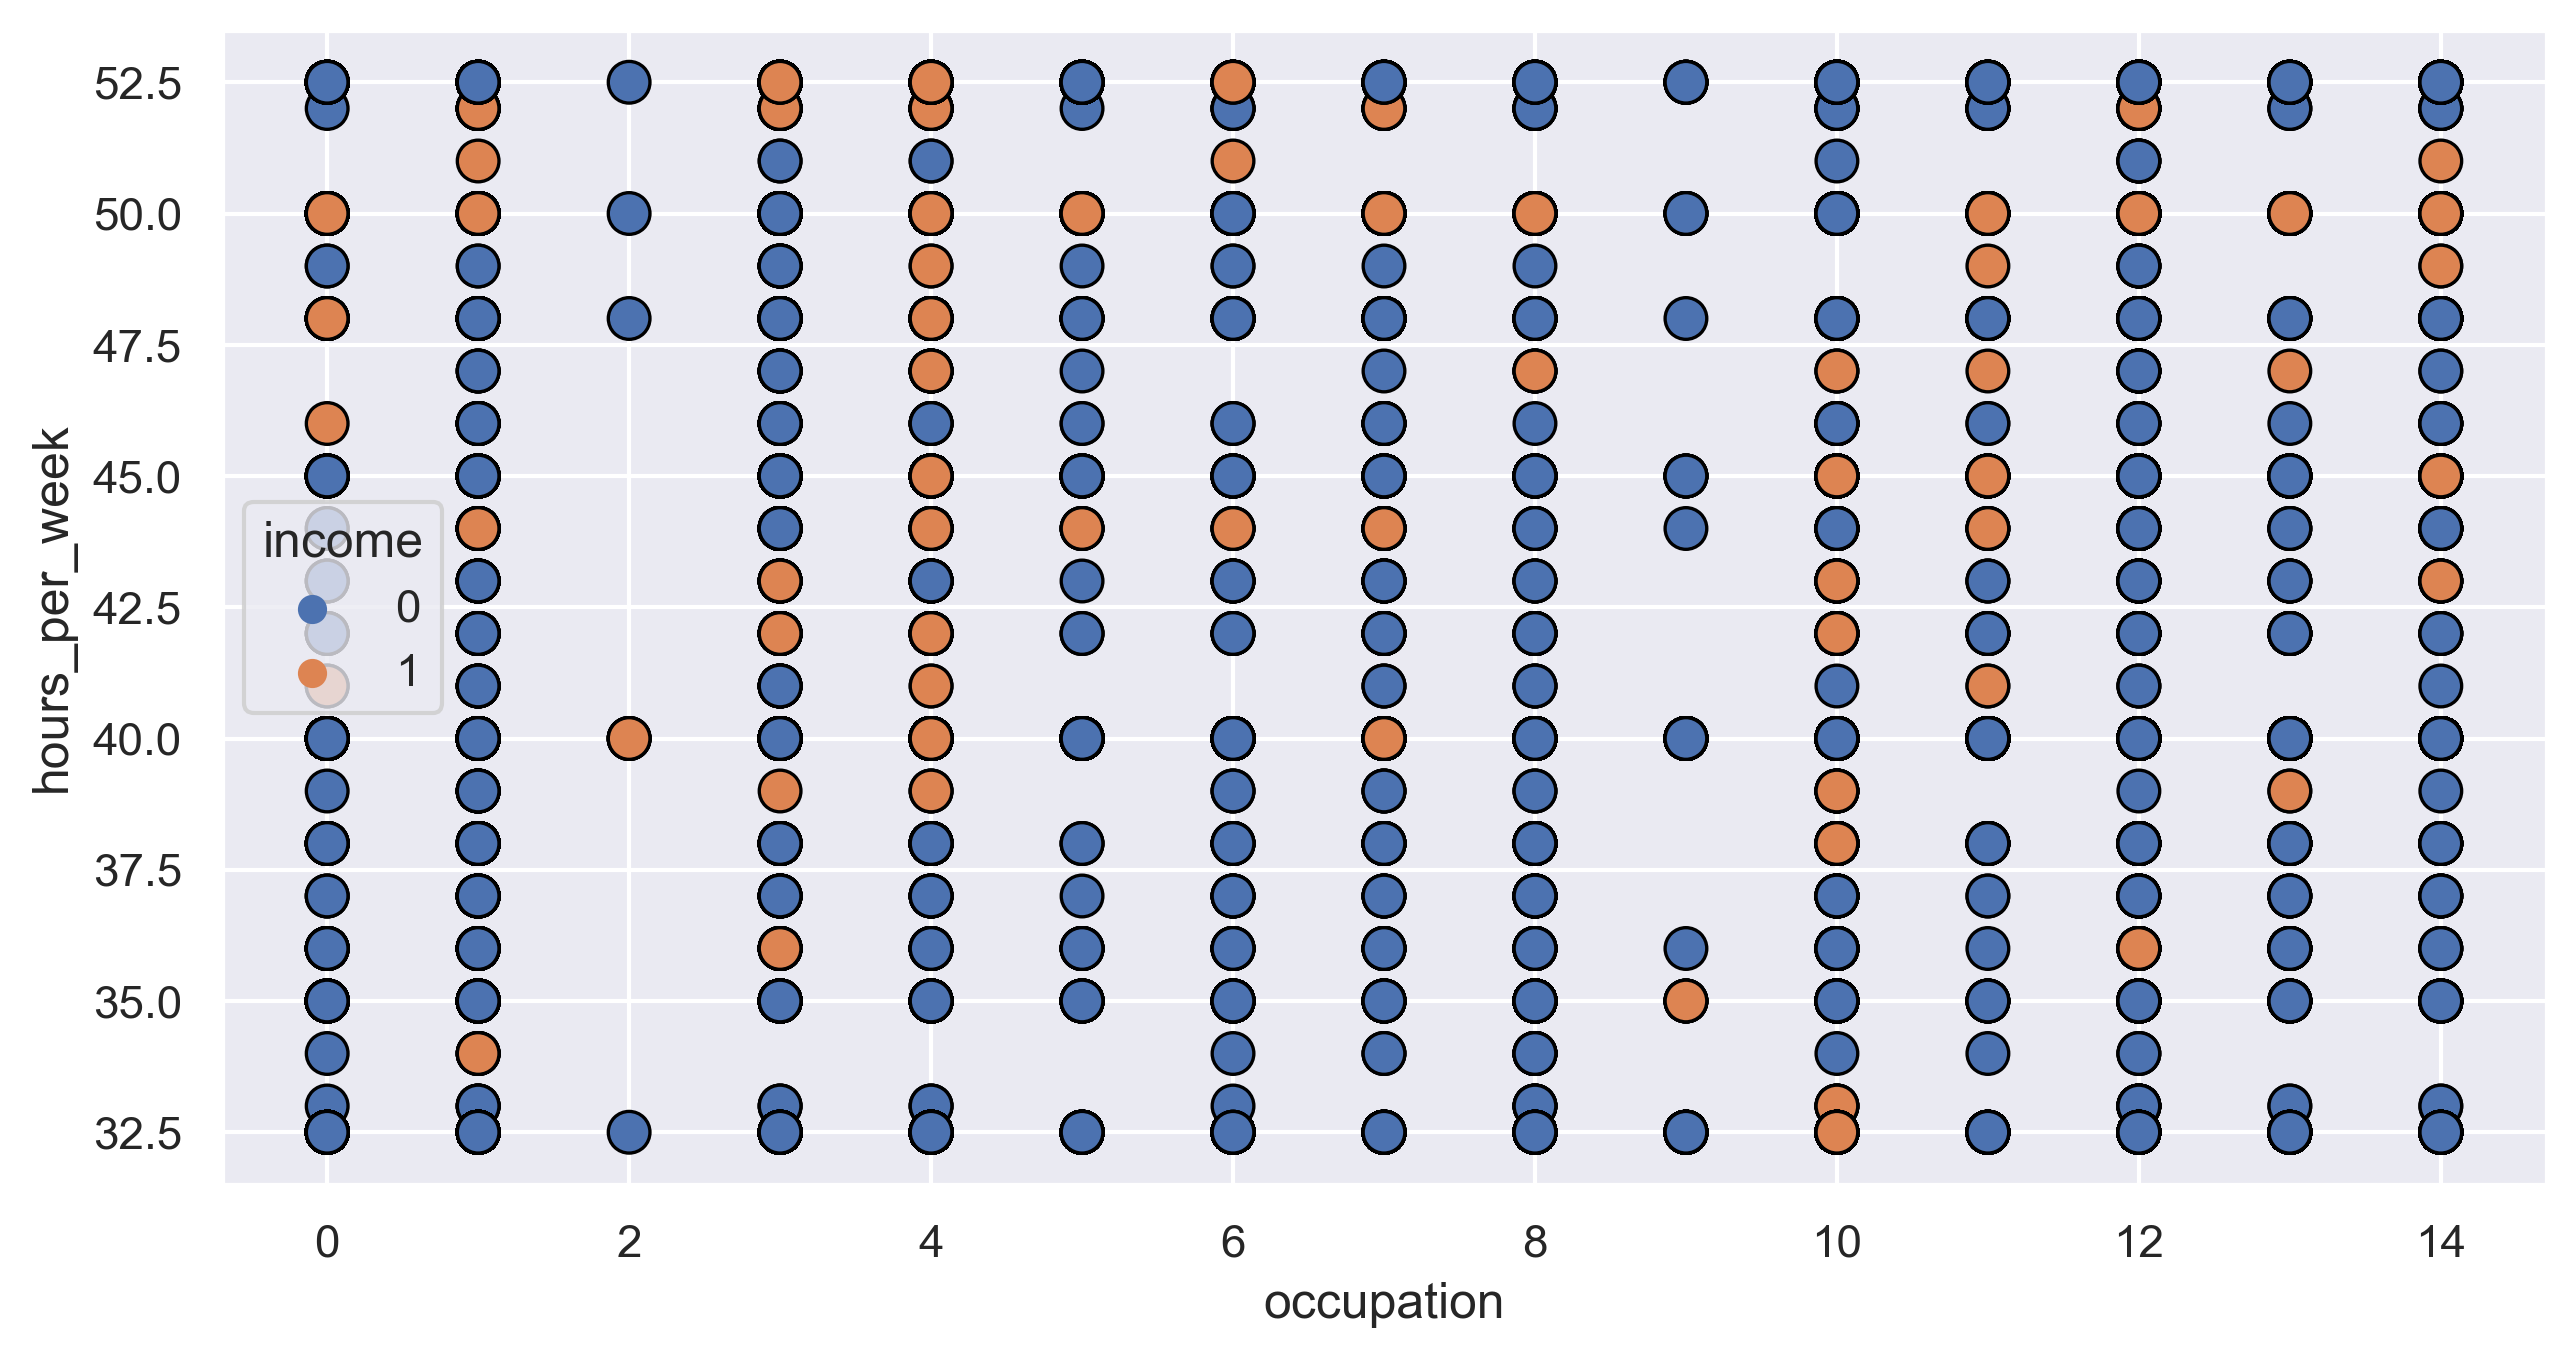

In [83]:
sns.scatterplot(x = df['occupation'], y = df['hours_per_week'], hue=df['income'], s = 100, edgecolor = 'black')
plt.xlabel('occupation')
plt.ylabel('hours_per_week')

Text(0, 0.5, 'hours_per_week')

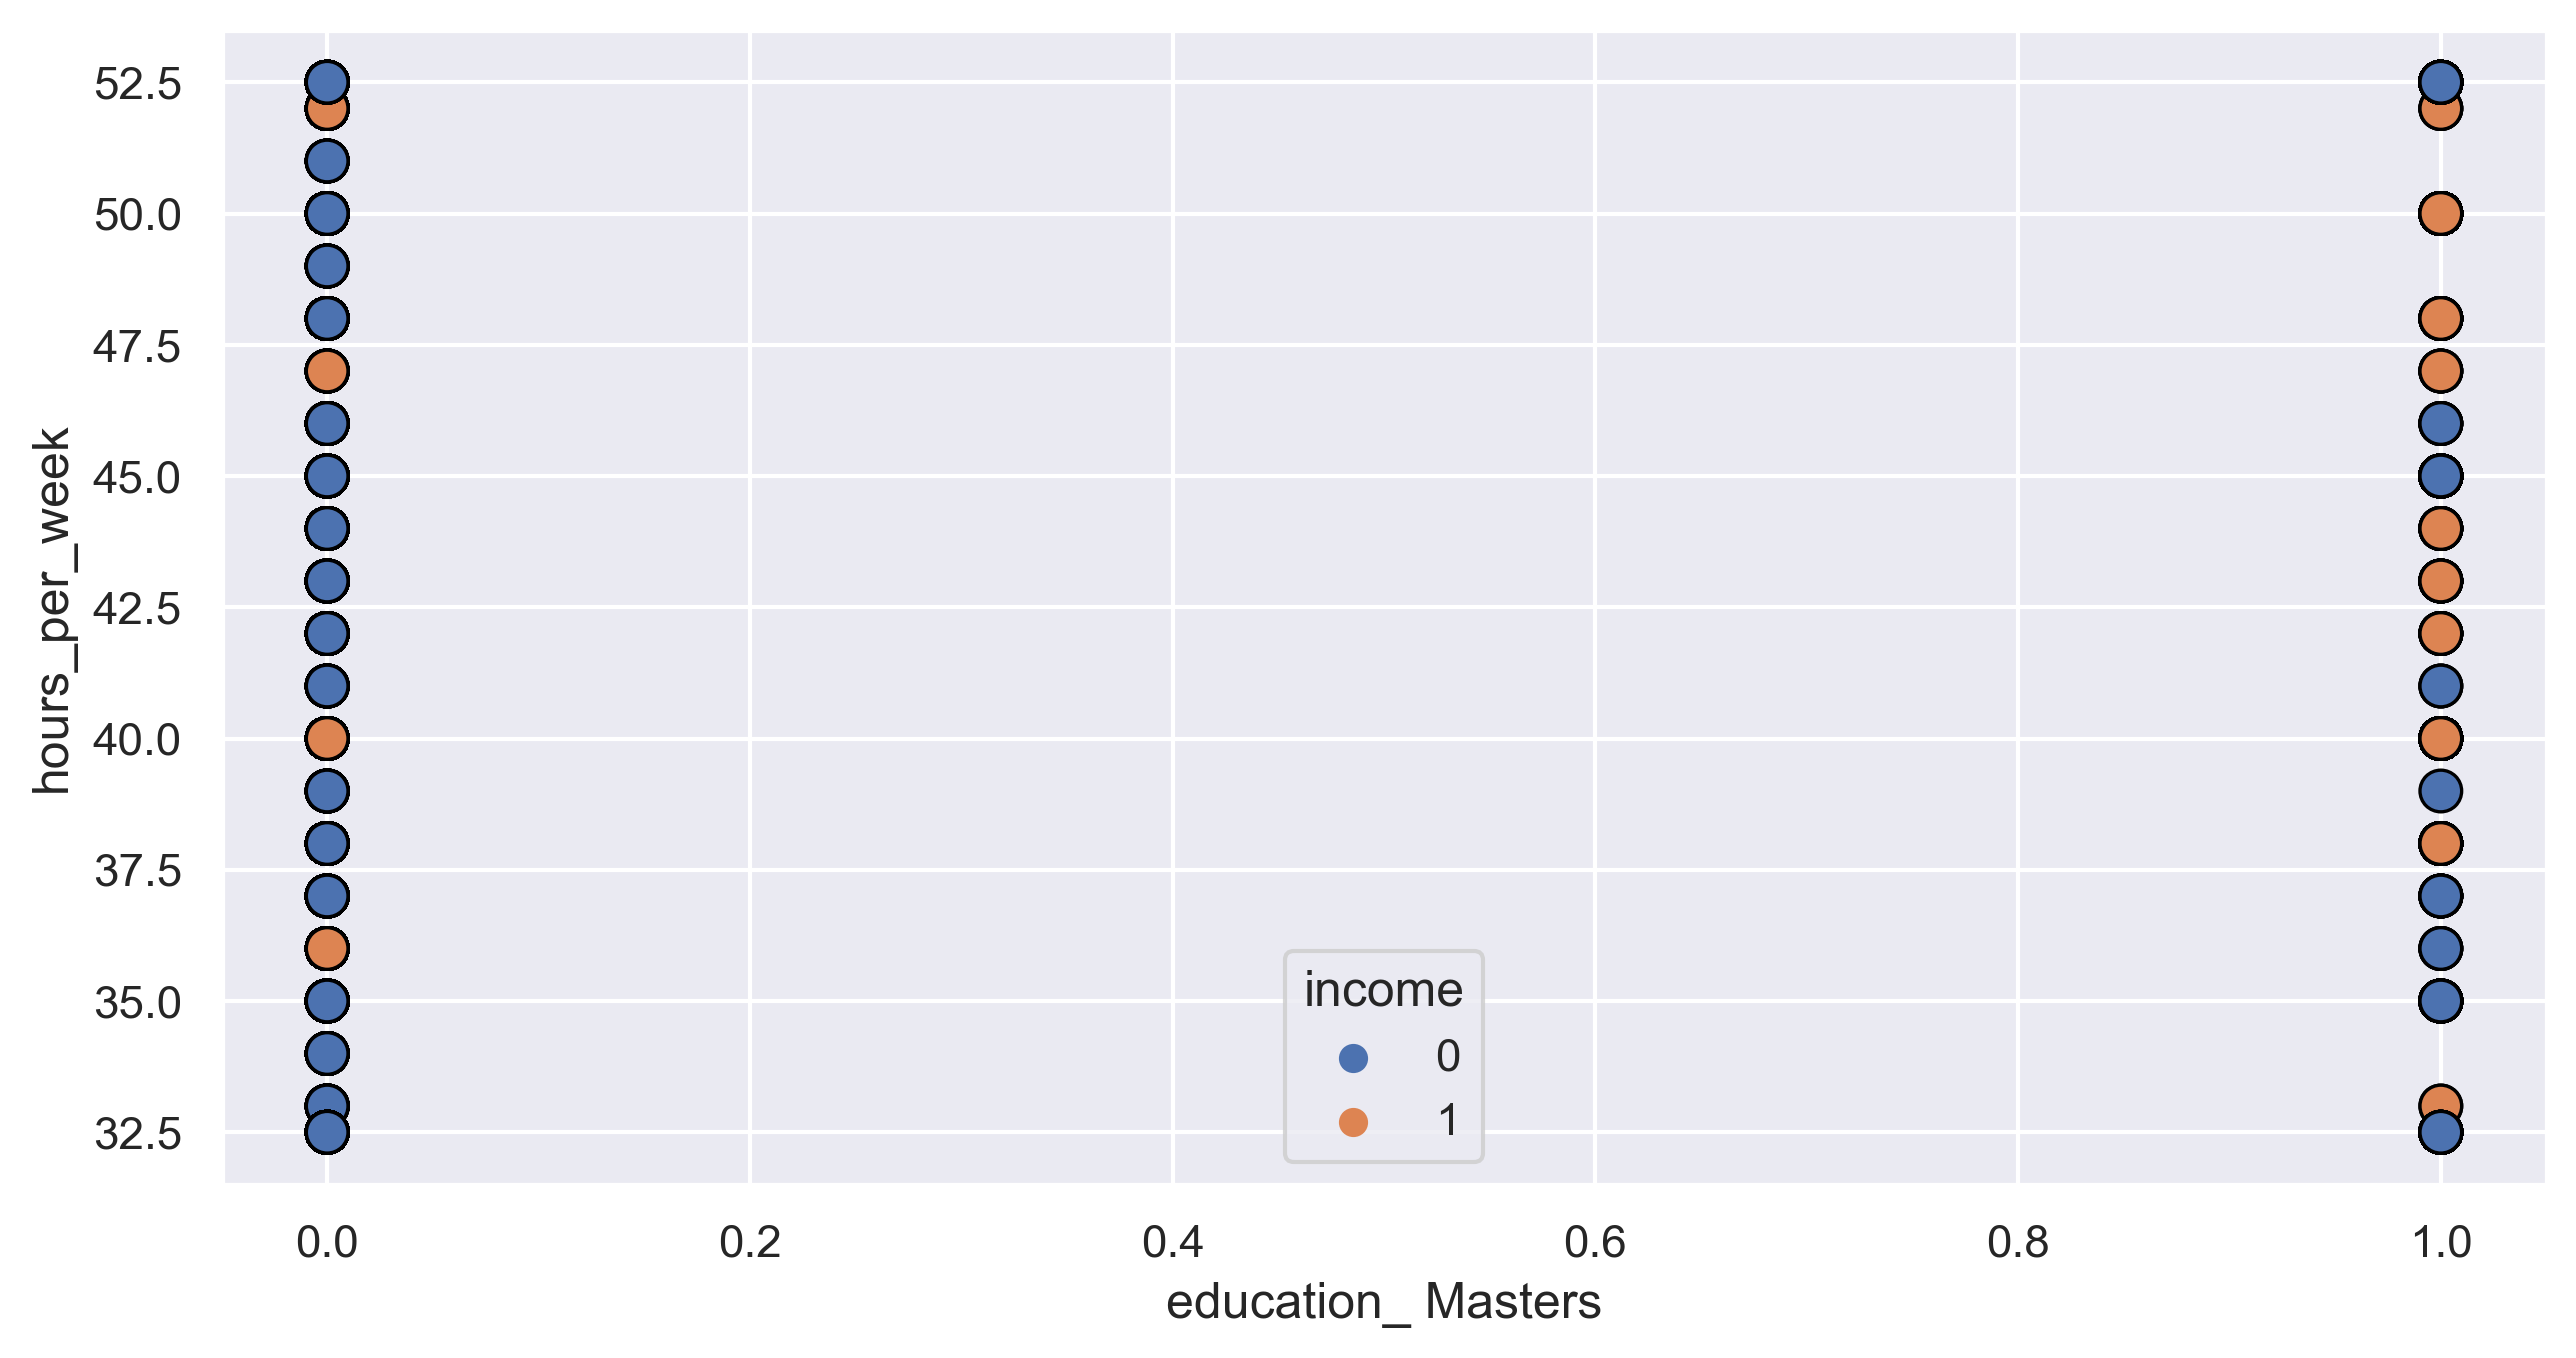

In [84]:
sns.scatterplot(x = df['education_ Masters'], y = df['hours_per_week'], hue=df['income'], s = 100, edgecolor = 'black')
plt.xlabel('education_ Masters')
plt.ylabel('hours_per_week')

In [85]:
df.head()

age  fnlwgt  education_num  occupation  relationship  race  sex  \
0   39   77516           13.0           1             1     4    1   
1   50   83311           13.0           4             0     4    1   
2   38  215646            9.0           6             1     4    1   
3   53  234721            7.0           6             0     2    1   
4   28  338409           13.0          10             5     2    0   

   capital_gain  capital_loss  hours_per_week  ...  education_ Preschool  \
0             0             0            40.0  ...                     0   
1             0             0            32.5  ...                     0   
2             0             0            40.0  ...                     0   
3             0             0            40.0  ...                     0   
4             0             0            40.0  ...                     0   

   education_ Prof-school  education_ Some-college  marital_status_ Divorced  \
0                       0                        0                         0   
1                       0                        0                         0   
2                       0                        0                         1   
3                       0                        0                         0   
4                       0                        0                         0   

   marital_status_ Married-AF-spouse  marital_status_ Married-civ-spouse  \
0                                  0                                   0   
1                                  0                                   1   
2                                  0                                   0   
3                                  0                                   1   
4                                  0                                   1   

   marital_status_ Married-spouse-absent  marital_status_ Never-married  \
0                                      0                              1   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   

   marital_status_ Separated  marital_status_ Widowed  
0                          0                        0  
1                          0                        0  
2                          0                        0  
3                          0                        0  
4                          0                        0  

[5 rows x 43 columns]

In [86]:
x = df.iloc[:, :11]
x = x.join(df.iloc[:, 13:])
y = df["income"]

In [87]:
x

age  fnlwgt  education_num  occupation  relationship  race  sex  \
0       39   77516           13.0           1             1     4    1   
1       50   83311           13.0           4             0     4    1   
2       38  215646            9.0           6             1     4    1   
3       53  234721            7.0           6             0     2    1   
4       28  338409           13.0          10             5     2    0   
...    ...     ...            ...         ...           ...   ...  ...   
32556   27  257302           12.0          13             5     4    0   
32557   40  154374            9.0           7             0     4    1   
32558   58  151910            9.0           1             4     4    0   
32559   22  201490            9.0           1             3     4    1   
32560   52  287927            9.0           4             5     4    0   

       capital_gain  capital_loss  hours_per_week  ...  education_ Preschool  \
0                 0             0            40.0  ...                     0   
1                 0             0            32.5  ...                     0   
2                 0             0            40.0  ...                     0   
3                 0             0            40.0  ...                     0   
4                 0             0            40.0  ...                     0   
...             ...           ...             ...  ...                   ...   
32556             0             0            38.0  ...                     0   
32557             0             0            40.0  ...                     0   
32558             0             0            40.0  ...                     0   
32559             0             0            32.5  ...                     0   
32560             0             0            40.0  ...                     0   

       education_ Prof-school  education_ Some-college  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
32556                       0                        0   
32557                       0                        0   
32558                       0                        0   
32559                       0                        0   
32560                       0                        0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
32556                         0                                  0   
32557                         0                                  0   
32558                         0                                  0   
32559                         0                                  0   
32560                         0                                  0   

       marital_status_ Married-civ-spouse  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
32556                                   1   
32557                                   1   
32558                                   0   
32559                                   0   
32560                                   1   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \

In [88]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32537, dtype: int32

In [89]:
x.describe()

age         fnlwgt  education_num    occupation  relationship  \
count  32537.000000   32537.000000   32537.000000  32537.000000  32537.000000   
mean      38.559855  186824.961736      10.125165      6.572856      1.446538   
std       13.554847   95118.115529       2.459436      4.229521      1.607064   
min       17.000000   12285.000000       4.500000      0.000000      0.000000   
25%       28.000000  117827.000000       9.000000      3.000000      0.000000   
50%       37.000000  178356.000000      10.000000      7.000000      1.000000   
75%       48.000000  236993.000000      12.000000     10.000000      3.000000   
max       78.000000  415742.000000      16.000000     14.000000      5.000000   

               race           sex  capital_gain  capital_loss  hours_per_week  \
count  32537.000000  32537.000000       32537.0       32537.0    32537.000000   
mean       3.665827      0.669238           0.0           0.0       41.203246   
std        0.848847      0.470495           0.0           0.0        6.187352   
min        0.000000      0.000000           0.0           0.0       32.500000   
25%        4.000000      0.000000           0.0           0.0       40.000000   
50%        4.000000      1.000000           0.0           0.0       40.000000   
75%        4.000000      1.000000           0.0           0.0       45.000000   
max        4.000000      1.000000           0.0           0.0       52.500000   

       ...  education_ Preschool  education_ Prof-school  \
count  ...          32537.000000            32537.000000   
mean   ...              0.001537                0.017703   
std    ...              0.039171                0.131871   
min    ...              0.000000                0.000000   
25%    ...              0.000000                0.000000   
50%    ...              0.000000                0.000000   
75%    ...              0.000000                0.000000   
max    ...              1.000000                1.000000   

       education_ Some-college  marital_status_ Divorced  \
count             32537.000000              32537.000000   
mean                  0.223807                  0.136491   
std                   0.416800                  0.343314   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                   1.000000                  1.000000   

       marital_status_ Married-AF-spouse  marital_status_ Married-civ-spouse  \
count                       32537.000000                        32537.000000   
mean                            0.000707                            0.460092   
std                             0.026578                            0.498412   
min                             0.000000                            0.000000   
25%                             0.000000                            0.000000   
50%                             0.000000                            0.000000   
75%                             0.000000                            1.000000   
max                             1.000000                            1.000000   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \
count                           32537.000000                   32537.000000   
mean                                0.012847                       0.327842   
std                                 0.112616                       0.469434   
min                                 0.000000                       0.000000   
25%                                 0.000000                       0.000000   
50%                                 0.000000                       0.000000   
75%                                 0.000000                       1.000000   
max                                 1.000000                       1.000000   

       marital_status_ Separated  marital

# PCA

In [90]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [91]:
x

array([[ 0.03247191, -1.1492095 ,  1.1689182 , ...,  1.43186886,
        -0.18035324, -0.17742558],
       [ 0.8440022 , -1.08828431,  1.1689182 , ..., -0.69838798,
        -0.18035324, -0.17742558],
       [-0.04130357,  0.30300728, -0.45749623, ..., -0.69838798,
        -0.18035324, -0.17742558],
       ...,
       [ 1.43420604, -0.36707517, -0.45749623, ..., -0.69838798,
        -0.18035324,  5.63616577],
       [-1.22171125,  0.1541795 , -0.45749623, ...,  1.43186886,
        -0.18035324, -0.17742558],
       [ 0.99155316,  1.06292678, -0.45749623, ..., -0.69838798,
        -0.18035324, -0.17742558]])

In [92]:
pd.DataFrame(x).describe()

0             1             2             3             4   \
count  3.253700e+04  3.253700e+04  3.253700e+04  3.253700e+04  3.253700e+04   
mean   1.489351e-16  5.568688e-18  3.173060e-16  6.944481e-17 -5.961772e-17   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.590589e+00 -1.835009e+00 -2.287212e+00 -1.554066e+00 -9.001260e-01   
25%   -7.790584e-01 -7.254036e-01 -4.574962e-01 -8.447553e-01 -9.001260e-01   
50%   -1.150790e-01 -8.903763e-02 -5.089262e-02  1.009928e-01 -2.778636e-01   
75%    6.964512e-01  5.274370e-01  7.623146e-01  8.103039e-01  9.666610e-01   
max    2.909716e+00  2.406698e+00  2.388729e+00  1.756052e+00  2.211186e+00   

                 5             6        7        8             9   ...  \
count  3.253700e+04  3.253700e+04  32537.0  32537.0  3.253700e+04  ...   
mean  -1.838759e-16  7.130104e-17      0.0      0.0 -2.292989e-16  ...   
std    1.000015e+00  1.000015e+00      0.0      0.0  1.000015e+00  ...   
min   -4.318661e+00 -1.422436e+00      0.0      0.0 -1.406640e+00  ...   
25%    3.936852e-01 -1.422436e+00      0.0      0.0 -1.944716e-01  ...   
50%    3.936852e-01  7.030196e-01      0.0      0.0 -1.944716e-01  ...   
75%    3.936852e-01  7.030196e-01      0.0      0.0  6.136409e-01  ...   
max    3.936852e-01  7.030196e-01      0.0      0.0  1.825810e+00  ...   

                 31            32            33            34            35  \
count  32537.000000  3.253700e+04  3.253700e+04  3.253700e+04  3.253700e+04   
mean       0.000000  5.983610e-17  3.494079e-18 -1.747039e-17  7.861677e-18   
std        1.000015  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min       -0.039231 -1.342459e-01 -5.369720e-01 -3.975742e-01 -2.659676e-02   
25%       -0.039231 -1.342459e-01 -5.369720e-01 -3.975742e-01 -2.659676e-02   
50%       -0.039231 -1.342459e-01 -5.369720e-01 -3.975742e-01 -2.659676e-02   
75%       -0.039231 -1.342459e-01 -5.369720e-01 -3.975742e-01 -2.659676e-02   
max       25.489998  7.449017e+00  1.862294e+00  2.515254e+00  3.759857e+01   

                 36            37            38            39            40  
count  3.253700e+04  3.253700e+04  3.253700e+04  3.253700e+04  3.253700e+04  
mean  -1.537395e-16  2.402179e-17 -1.072245e-16  5.437660e-17 -3.996352e-17  
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  
min   -9.231284e-01 -1.140794e-01 -6.983880e-01 -1.803532e-01 -1.774256e-01  
25%   -9.231284e-01 -1.140794e-01 -6.983880e-01 -1.803532e-01 -1.774256e-01  
50%   -9.231284e-01 -1.140794e-01 -6.983880e-01 -1.803532e-01 -1.774256e-01  
75%    1.083273e+00 -1.140794e-01  1.431869e+00 -1.803532e-01 -1.774256e-01  
max    1.083273e+00  8.765826e+00  1.431869e+00  5.544674e+00  5.636166e+00  

[8 rows x 41 columns]

In [93]:
pca = PCA()
pcs = pca.fit_transform(x)

In [94]:
pd.DataFrame(pcs)

0         1         2         3         4         5         6   \
0      0.460345  2.698703  0.394004  1.823624 -0.494483  1.028637  0.040720   
1      2.671761  0.758791  0.883232  1.296840 -0.523205  0.456997 -0.923210   
2     -0.489892 -1.038726  0.478813 -1.921550 -1.067866  0.075219  0.661661   
3      0.373518 -2.093351 -0.732554  0.535444  0.946544 -0.074467 -1.303614   
4     -0.636773  1.699198 -0.565211 -0.788527  3.813601  1.207835  0.813374   
...         ...       ...       ...       ...       ...       ...       ...   
32532 -0.820742  1.320246 -0.194247 -1.268258  0.471131 -0.352960 -0.305904   
32533  0.988597 -1.637694 -0.786002 -0.944864 -0.866589  0.532297  0.082175   
32534 -1.552845 -1.249562  3.236721 -2.109727  0.038118  0.176747 -1.311400   
32535 -2.229387 -0.493504 -0.941747  0.017815 -1.348344  1.240522  0.191738   
32536  0.396859 -0.564777  2.172969  0.329231 -0.917281  0.997597  1.080353   

             7         8         9   ...        31        32        33  \
0     -0.802629  1.850642  0.824859  ...  0.960576 -0.902791  0.375932   
1     -2.400627  0.416778 -0.620604  ... -1.021932 -0.760521 -0.368577   
2      0.344228 -1.006335 -0.232706  ...  0.094699 -1.334489 -0.706110   
3      0.385218 -0.494943  1.570315  ... -0.492253 -0.020295  0.758804   
4     -0.852962  0.027513 -1.150367  ...  1.124052  2.247903 -0.459785   
...         ...       ...       ...  ...       ...       ...       ...   
32532  0.417131 -1.091199  0.788617  ... -0.404215  2.325763 -0.459249   
32533  0.423553  0.636483 -0.041371  ... -0.069098 -0.038070 -0.166563   
32534 -1.369888  3.332131  0.464648  ...  1.309841  0.540570 -0.855655   
32535 -0.011384  0.770430 -0.290705  ... -0.271306 -0.749956 -0.614743   
32536 -1.116082 -0.161092 -0.744353  ... -1.346731  1.935183  0.443266   

             34        35            36            37            38  \
0      0.463951 -0.514514  6.120894e-15 -2.834507e-16 -1.315381e-14   
1     -0.124184 -0.427210  1.873646e-14  2.069638e-15  1.144368e-16   
2      0.012169 -0.050730  2.614700e-14  3.908715e-15  2.035152e-16   
3      0.032262 -0.210769 -3.927881e-15 -1.234290e-15  6.746017e-16   
4      0.590925  0.062796  8.443307e-15  4.237151e-15  9.749964e-15   
...         ...       ...           ...           ...           ...   
32532  0.634168  0.175660 -8.782653e-17  9.024152e-17  3.839801e-16   
32533 -0.167775 -0.027378 -6.644725e-17  1.483970e-16  4.874818e-18   
32534  0.551364 -0.383212 -3.193139e-16  1.108889e-16  6.104001e-17   
32535  0.780021 -0.335777 -1.231094e-16  1.600750e-16  8.070447e-17   
32536  0.841846 -0.381460 -6.425603e-17  1.827892e-16 -4.852480e-17   

                 39            40  
0     -1.163372e-15 -1.970676e-15  
1     -4.796365e-16 -1.734283e-15  
2     -1.138739e-15 -2.304455e-15  
3      4.154171e-16  7.516187e-16  
4      4.383162e-17 -7.698181e-16  
...             ...           ...  
32532  1.678519e-17  1.821627e-17  
32533 -2.225934e-17 -7.366959e-17  
32534 -7.704832e-18 -3.947834e-17  
32535 -1.739313e-17 -6.412521e-17  
32536 -3.276114e-17 -9.542420e-17  

[32537 rows x 41 columns]

In [95]:
pca.explained_variance_ratio_

array([7.90221436e-02, 5.52480165e-02, 4.67747434e-02, 3.75835265e-02,
       3.53480195e-02, 3.33538663e-02, 3.03656756e-02, 2.97638816e-02,
       2.92667741e-02, 2.83678419e-02, 2.77497556e-02, 2.75806588e-02,
       2.71640306e-02, 2.68149081e-02, 2.66150500e-02, 2.64869501e-02,
       2.62942963e-02, 2.59773982e-02, 2.58986817e-02, 2.57423488e-02,
       2.56961137e-02, 2.56197118e-02, 2.55456875e-02, 2.55009989e-02,
       2.51629678e-02, 2.47481626e-02, 2.45022030e-02, 2.40432701e-02,
       2.38713944e-02, 2.23240789e-02, 2.00560602e-02, 1.91528845e-02,
       1.72670602e-02, 1.14653515e-02, 9.68186151e-03, 3.94362642e-03,
       1.55843699e-32, 1.59978356e-33, 1.22279606e-33, 9.98322768e-34,
       5.73011901e-34])

In [96]:
np.cumsum(pca.explained_variance_ratio_)

array([0.07902214, 0.13427016, 0.1810449 , 0.21862843, 0.25397645,
       0.28733032, 0.31769599, 0.34745987, 0.37672665, 0.40509449,
       0.43284424, 0.4604249 , 0.48758893, 0.51440384, 0.54101889,
       0.56750584, 0.59380014, 0.61977754, 0.64567622, 0.67141857,
       0.69711468, 0.72273439, 0.74828008, 0.77378108, 0.79894405,
       0.82369221, 0.84819441, 0.87223768, 0.89610908, 0.91843316,
       0.93848922, 0.9576421 , 0.97490916, 0.98637451, 0.99605637,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

Text(0.5, 1.0, 'Scree Plot')

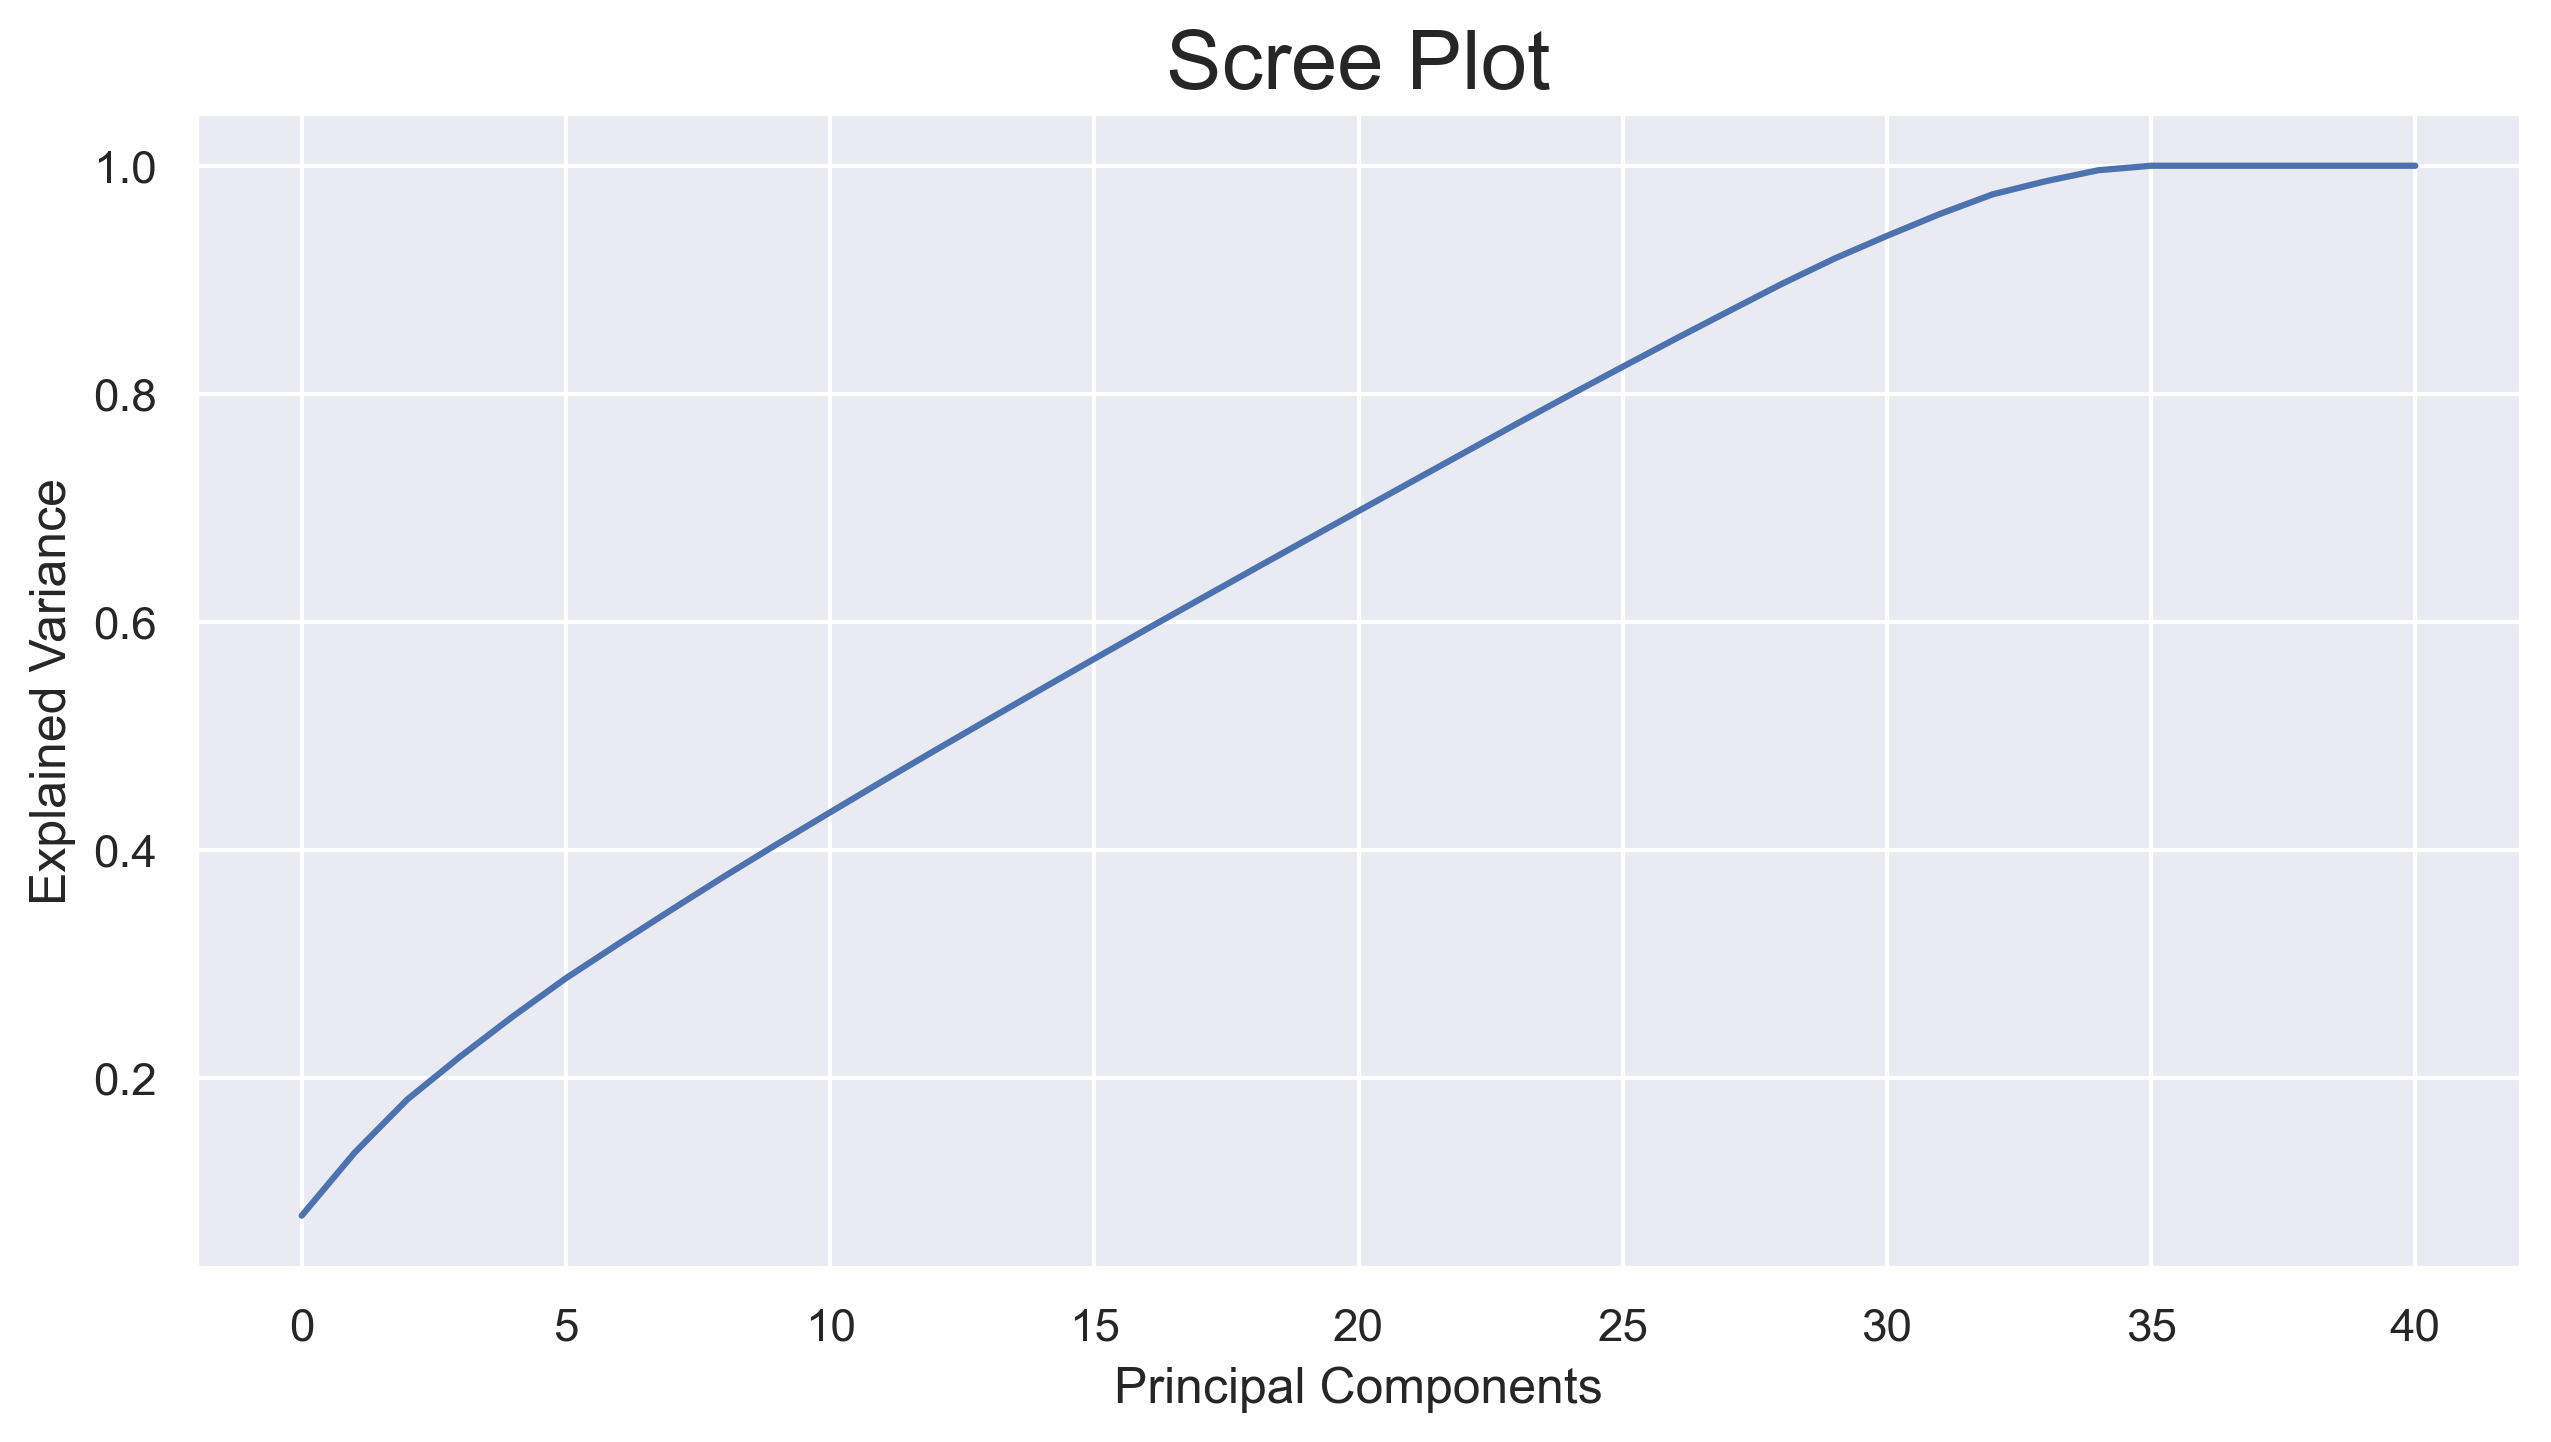

In [97]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

In [98]:
pca = PCA(n_components=30)
pcs = pca.fit_transform(x)
pcs

array([[ 0.46034527,  2.69870312,  0.39400374, ..., -0.18148356,
         1.62712486, -0.4064539 ],
       [ 2.67176115,  0.75879099,  0.88323216, ...,  0.82401942,
        -0.05476969, -0.16535025],
       [-0.48989176, -1.03872609,  0.47881323, ..., -0.03101159,
        -0.14460558, -0.00354505],
       ...,
       [-1.55284545, -1.24956157,  3.23672135, ..., -0.28493803,
        -0.51673142,  0.69188254],
       [-2.22938711, -0.49350407, -0.94174694, ..., -0.2246211 ,
        -0.39185739, -0.90335629],
       [ 0.39685926, -0.56477735,  2.17296883, ..., -0.67965311,
        -0.81482939,  0.75656095]])

In [99]:
data = pd.DataFrame(pcs,columns=['PC1','PC2',"PC3",'PC4', "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24", "PC25", "PC26", "PC27", "PC28", "PC29", "PC30", "PC31" ])
data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.460345  2.698703  0.394004  1.823624 -0.494483  1.028637  0.040720   
1      2.671761  0.758791  0.883232  1.296840 -0.523205  0.456997 -0.923210   
2     -0.489892 -1.038726  0.478813 -1.921550 -1.067866  0.075219  0.661661   
3      0.373518 -2.093351 -0.732554  0.535444  0.946544 -0.074467 -1.303614   
4     -0.636773  1.699198 -0.565211 -0.788527  3.813601  1.207835  0.813374   
...         ...       ...       ...       ...       ...       ...       ...   
32532 -0.820742  1.320246 -0.194247 -1.268258  0.471131 -0.352960 -0.305904   
32533  0.988597 -1.637694 -0.786002 -0.944864 -0.866589  0.532297  0.082175   
32534 -1.552845 -1.249562  3.236721 -2.109727  0.038118  0.176747 -1.311400   
32535 -2.229387 -0.493504 -0.941747  0.017815 -1.348344  1.240522  0.191738   
32536  0.396859 -0.564777  2.172969  0.329231 -0.917281  0.997597  1.080353   

            PC8       PC9      PC10  ...      PC22      PC23      PC24  \
0     -0.802629  1.850642  0.824859  ... -0.311145 -0.070751 -0.205268   
1     -2.400627  0.416778 -0.620604  ... -0.167748 -0.201709 -0.712663   
2      0.344228 -1.006335 -0.232706  ...  0.298680 -0.116750  0.059508   
3      0.385218 -0.494943  1.570315  ...  0.130871  0.545062 -1.146709   
4     -0.852962  0.027513 -1.150367  ...  0.680334  0.055692  0.346688   
...         ...       ...       ...  ...       ...       ...       ...   
32532  0.417131 -1.091199  0.788617  ...  0.124997 -0.317606 -0.601280   
32533  0.423553  0.636483 -0.041371  ... -0.028529 -0.001066 -0.136278   
32534 -1.369888  3.332131  0.464648  ...  0.108420 -0.381822 -0.065534   
32535 -0.011384  0.770430 -0.290705  ...  0.143145 -0.189056  0.180464   
32536 -1.116082 -0.161092 -0.744353  ... -0.168307  0.213898  0.077564   

           PC25      PC26      PC27      PC28      PC29      PC30      PC31  
0      0.308990  0.015767 -2.412555 -0.963003 -0.181484  1.627125 -0.406454  
1      0.885967  0.576862 -0.227539  0.406038  0.824019 -0.054770 -0.165350  
2     -0.242312  0.310385 -0.080218 -0.252135 -0.031012 -0.144606 -0.003545  
3      0.682025  0.845153  0.667041 -1.789617  0.842628 -1.287730  0.650978  
4     -0.071950  0.215759  0.225450 -1.356962  1.109846 -1.211599  0.552181  
...         ...       ...       ...       ...       ...       ...       ...  
32532  0.298151 -0.934021  0.351867  0.019693 -0.360231  1.163132  0.919000  
32533  0.148081 -0.002560  0.120846 -0.166096 -0.101328  0.376051 -0.240863  
32534  0.775958  0.456588  0.259754  0.382012 -0.284938 -0.516731  0.691883  
32535  0.242331 -0.091690 -0.396751  0.113823 -0.224621 -0.391857 -0.903356  
32536 -0.608851 -0.725774 -0.383437  0.555078 -0.679653 -0.814829  0.756561  

[32537 rows x 30 columns]

In [100]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32537, dtype: int32

In [101]:
data['income'] = y

In [102]:
data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.460345  2.698703  0.394004  1.823624 -0.494483  1.028637  0.040720   
1      2.671761  0.758791  0.883232  1.296840 -0.523205  0.456997 -0.923210   
2     -0.489892 -1.038726  0.478813 -1.921550 -1.067866  0.075219  0.661661   
3      0.373518 -2.093351 -0.732554  0.535444  0.946544 -0.074467 -1.303614   
4     -0.636773  1.699198 -0.565211 -0.788527  3.813601  1.207835  0.813374   
...         ...       ...       ...       ...       ...       ...       ...   
32532 -0.820742  1.320246 -0.194247 -1.268258  0.471131 -0.352960 -0.305904   
32533  0.988597 -1.637694 -0.786002 -0.944864 -0.866589  0.532297  0.082175   
32534 -1.552845 -1.249562  3.236721 -2.109727  0.038118  0.176747 -1.311400   
32535 -2.229387 -0.493504 -0.941747  0.017815 -1.348344  1.240522  0.191738   
32536  0.396859 -0.564777  2.172969  0.329231 -0.917281  0.997597  1.080353   

            PC8       PC9      PC10  ...      PC23      PC24      PC25  \
0     -0.802629  1.850642  0.824859  ... -0.070751 -0.205268  0.308990   
1     -2.400627  0.416778 -0.620604  ... -0.201709 -0.712663  0.885967   
2      0.344228 -1.006335 -0.232706  ... -0.116750  0.059508 -0.242312   
3      0.385218 -0.494943  1.570315  ...  0.545062 -1.146709  0.682025   
4     -0.852962  0.027513 -1.150367  ...  0.055692  0.346688 -0.071950   
...         ...       ...       ...  ...       ...       ...       ...   
32532  0.417131 -1.091199  0.788617  ... -0.317606 -0.601280  0.298151   
32533  0.423553  0.636483 -0.041371  ... -0.001066 -0.136278  0.148081   
32534 -1.369888  3.332131  0.464648  ... -0.381822 -0.065534  0.775958   
32535 -0.011384  0.770430 -0.290705  ... -0.189056  0.180464  0.242331   
32536 -1.116082 -0.161092 -0.744353  ...  0.213898  0.077564 -0.608851   

           PC26      PC27      PC28      PC29      PC30      PC31  income  
0      0.015767 -2.412555 -0.963003 -0.181484  1.627125 -0.406454     0.0  
1      0.576862 -0.227539  0.406038  0.824019 -0.054770 -0.165350     0.0  
2      0.310385 -0.080218 -0.252135 -0.031012 -0.144606 -0.003545     0.0  
3      0.845153  0.667041 -1.789617  0.842628 -1.287730  0.650978     0.0  
4      0.215759  0.225450 -1.356962  1.109846 -1.211599  0.552181     0.0  
...         ...       ...       ...       ...       ...       ...     ...  
32532 -0.934021  0.351867  0.019693 -0.360231  1.163132  0.919000     1.0  
32533 -0.002560  0.120846 -0.166096 -0.101328  0.376051 -0.240863     1.0  
32534  0.456588  0.259754  0.382012 -0.284938 -0.516731  0.691883     0.0  
32535 -0.091690 -0.396751  0.113823 -0.224621 -0.391857 -0.903356     0.0  
32536 -0.725774 -0.383437  0.555078 -0.679653 -0.814829  0.756561     1.0  

[32537 rows x 31 columns]

In [103]:
data['PC1'].mean()

7.861677009977443e-18

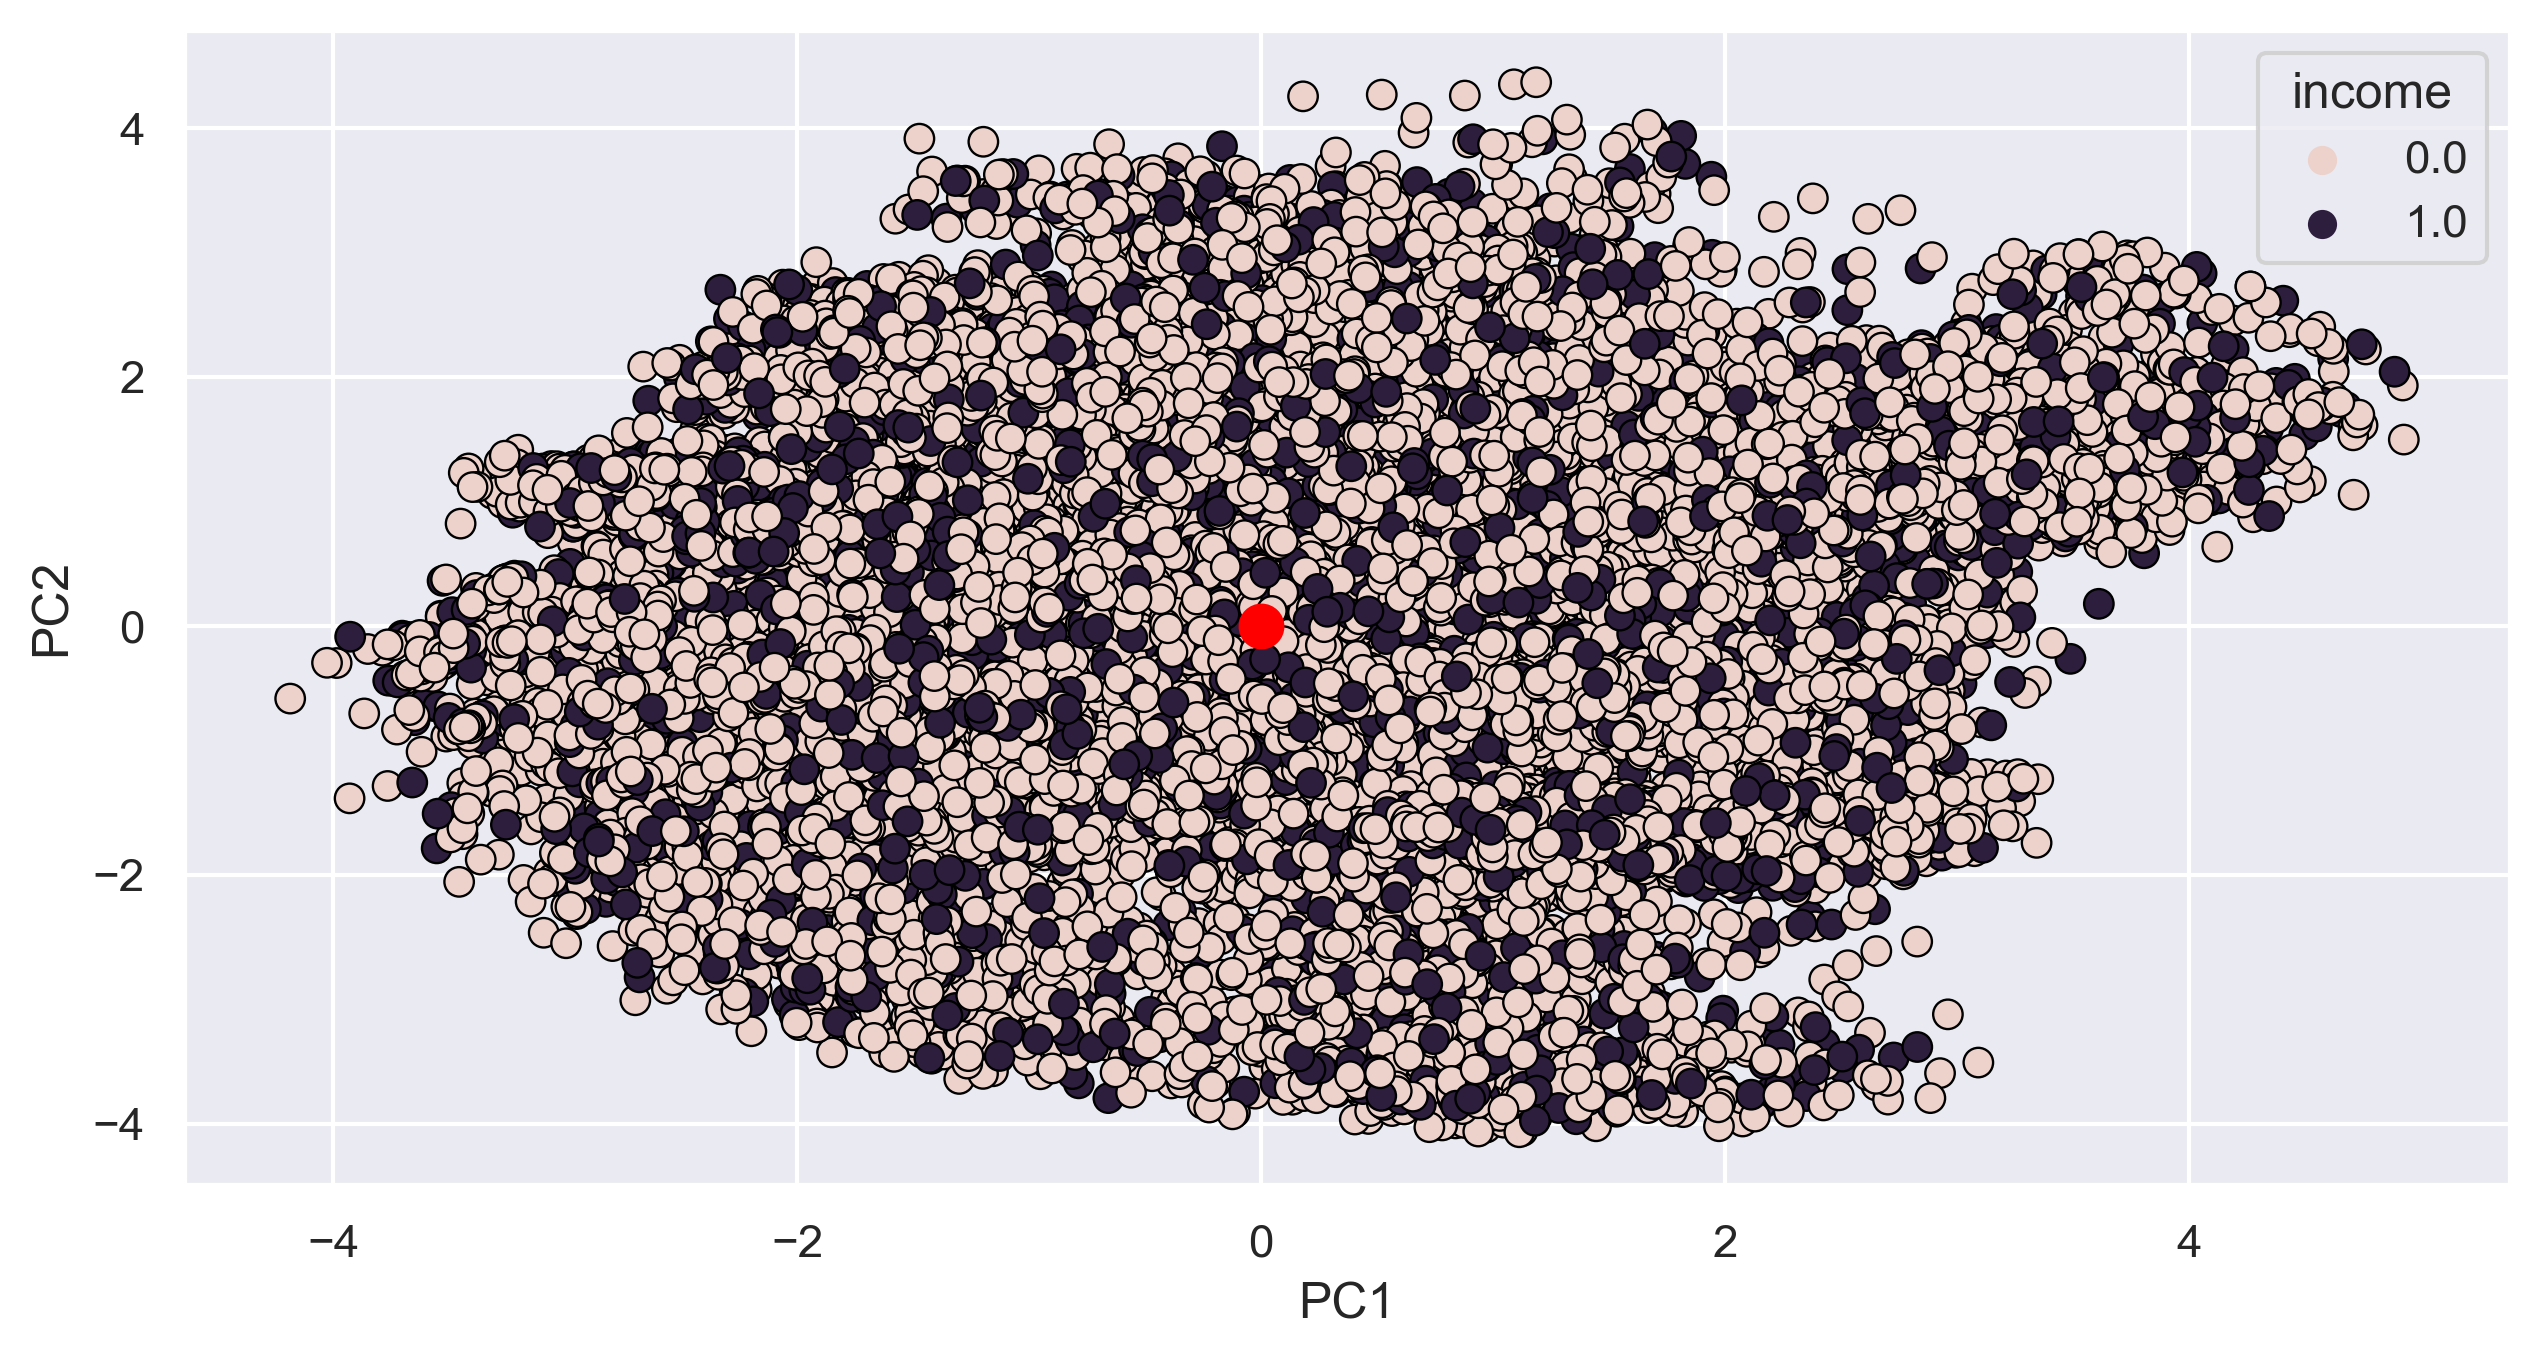

In [104]:
sns.scatterplot(x = data['PC1'], y = data['PC2'],s = 50, edgecolor = 'black',hue=data['income'])
plt.scatter(pcs[:,0].mean(),pcs[:,1].mean(), s = 100,c = 'red')

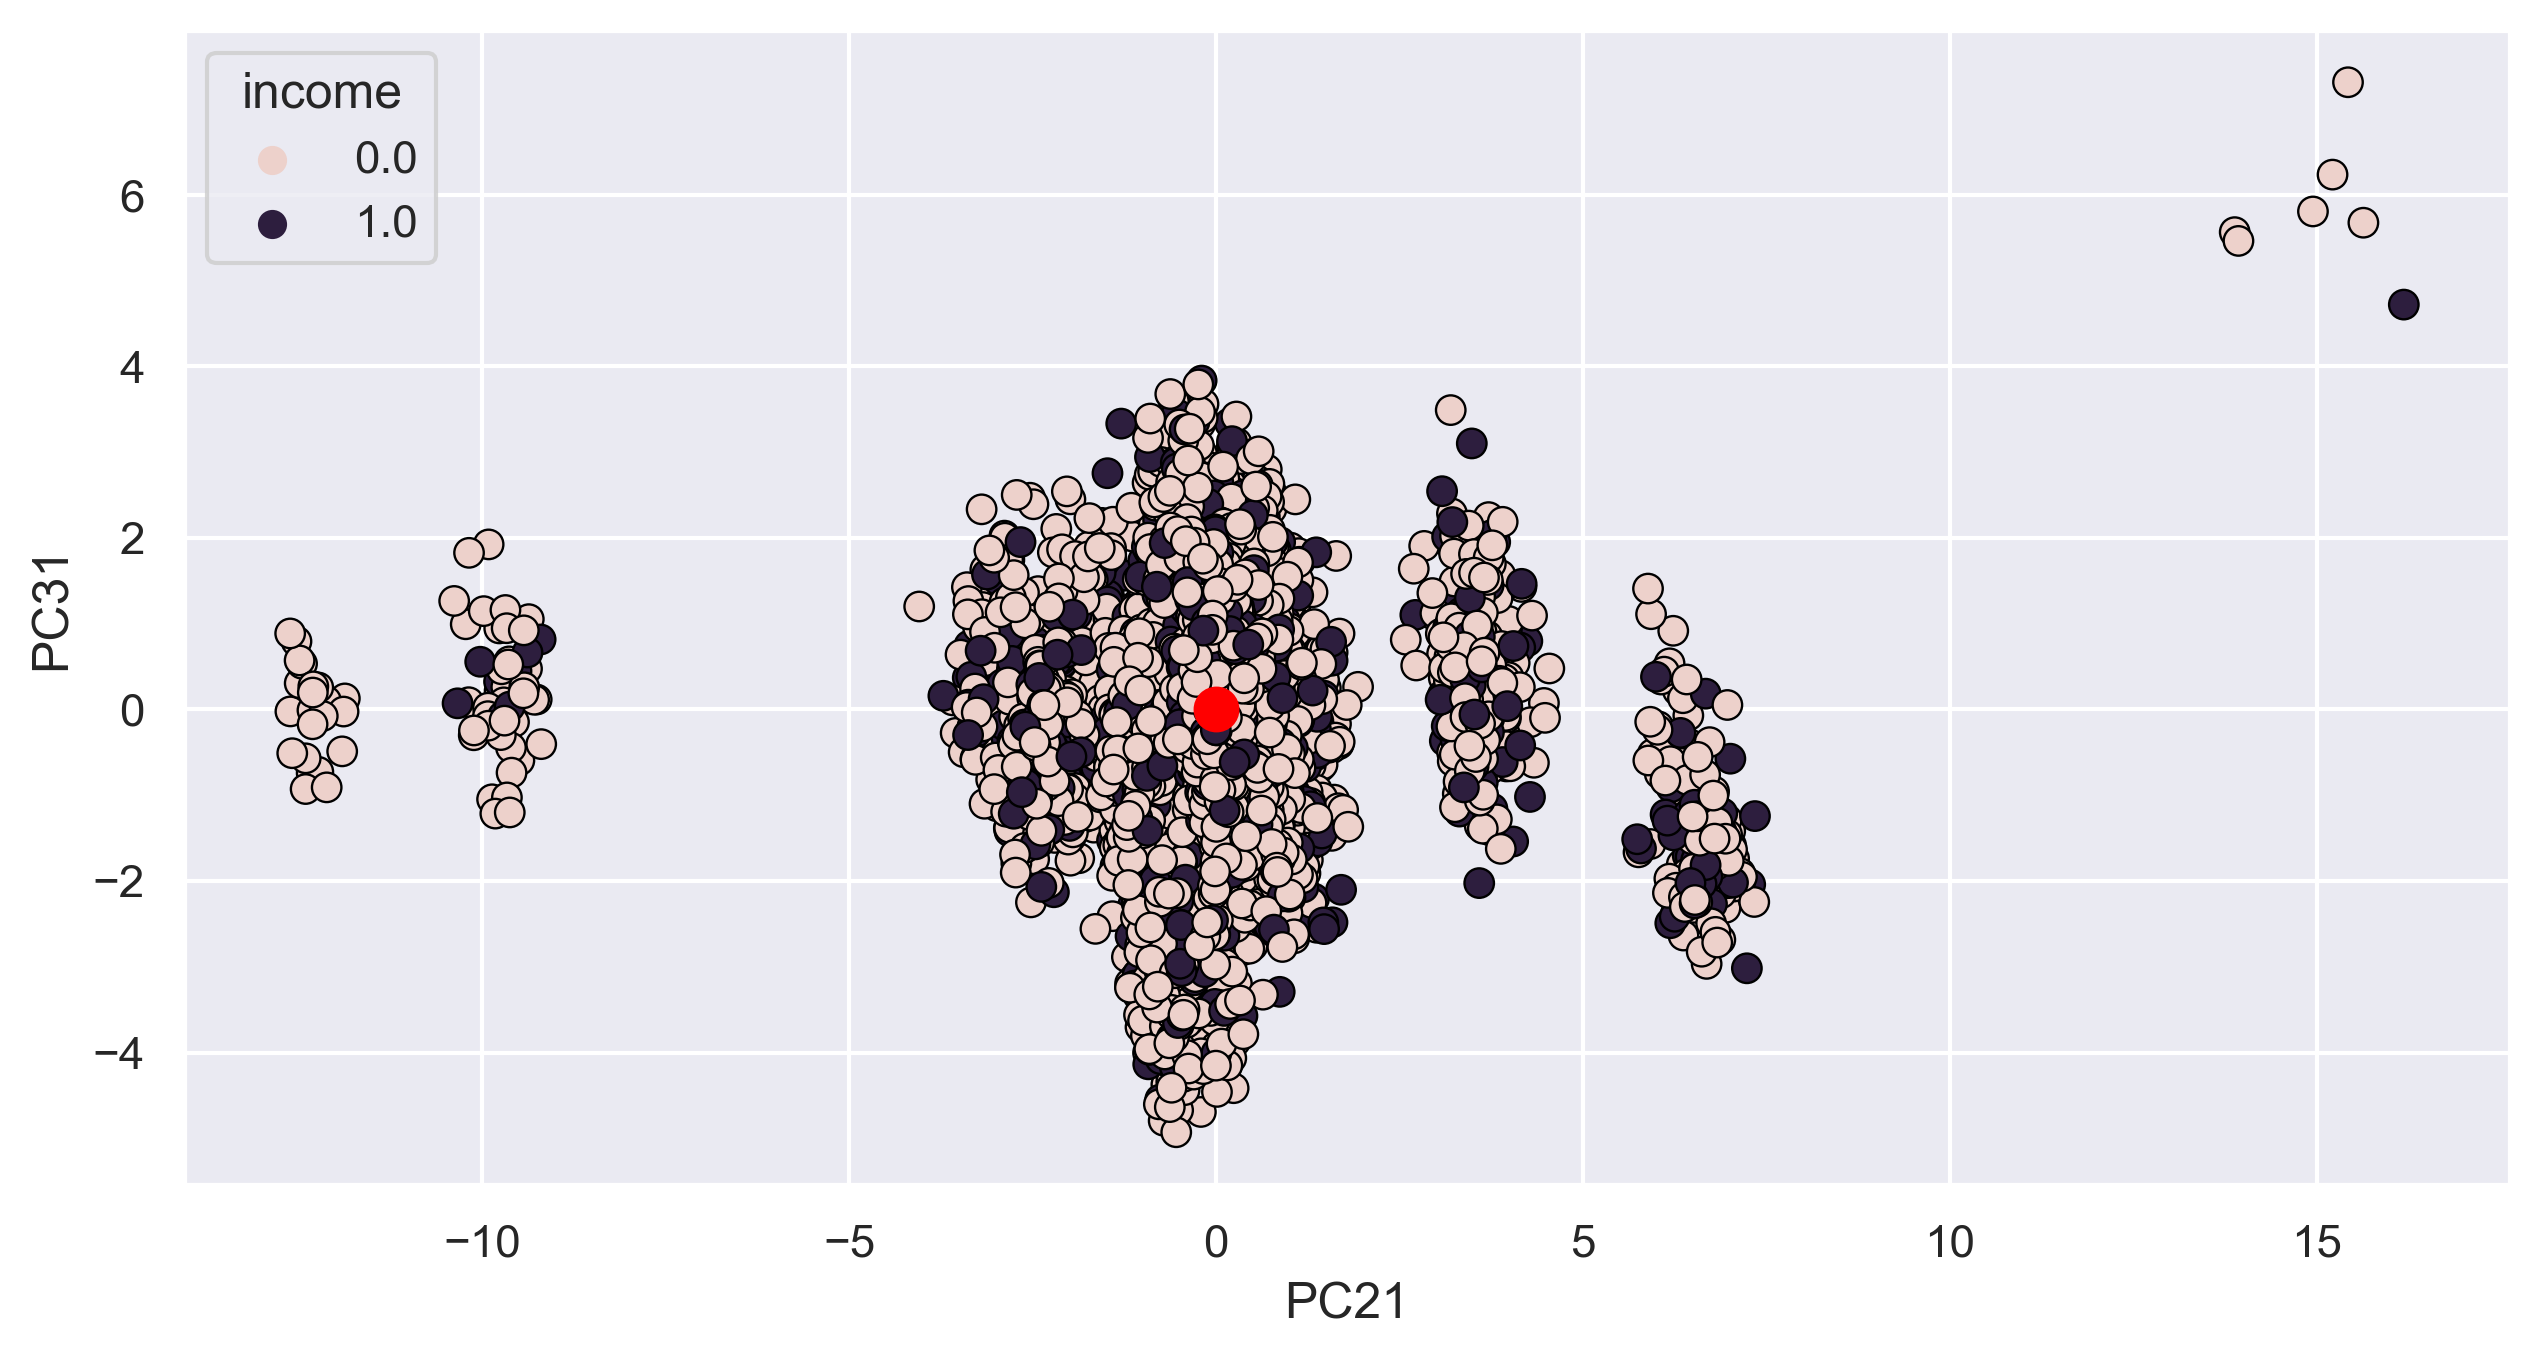

In [105]:
sns.scatterplot(x = data['PC21'], y = data['PC31'],s = 50, edgecolor = 'black',hue=data['income'])
plt.scatter(pcs[:,0].mean(),pcs[:,1].mean(), s = 100,c = 'red')

# As we can see from the PCA percentage above, if we skip the last ten columns, we still have 95% of the information to predict the data set. So the PCA contributes to the reduction of the curse of dimensionality. We may also use this PCA to move forward with the model building.

# Feature Selection

# Isolation Forest

In [145]:
from sklearn.ensemble import IsolationForest

In [146]:
df

age  fnlwgt  education_num  occupation  relationship  race  sex  \
0       39   77516           13.0           1             1     4    1   
1       50   83311           13.0           4             0     4    1   
2       38  215646            9.0           6             1     4    1   
3       53  234721            7.0           6             0     2    1   
4       28  338409           13.0          10             5     2    0   
...    ...     ...            ...         ...           ...   ...  ...   
32556   27  257302           12.0          13             5     4    0   
32557   40  154374            9.0           7             0     4    1   
32558   58  151910            9.0           1             4     4    0   
32559   22  201490            9.0           1             3     4    1   
32560   52  287927            9.0           4             5     4    0   

       capital_gain  capital_loss  hours_per_week  ...  education_ Preschool  \
0                 0             0            40.0  ...                     0   
1                 0             0            32.5  ...                     0   
2                 0             0            40.0  ...                     0   
3                 0             0            40.0  ...                     0   
4                 0             0            40.0  ...                     0   
...             ...           ...             ...  ...                   ...   
32556             0             0            38.0  ...                     0   
32557             0             0            40.0  ...                     0   
32558             0             0            40.0  ...                     0   
32559             0             0            32.5  ...                     0   
32560             0             0            40.0  ...                     0   

       education_ Prof-school  education_ Some-college  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
32556                       0                        0   
32557                       0                        0   
32558                       0                        0   
32559                       0                        0   
32560                       0                        0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
32556                         0                                  0   
32557                         0                                  0   
32558                         0                                  0   
32559                         0                                  0   
32560                         0                                  0   

       marital_status_ Married-civ-spouse  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
32556                                   1   
32557                                   1   
32558                                   0   
32559                                   0   
32560                                   1   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \

In [147]:
iso = IsolationForest()

iso.fit(df)

IsolationForest()

In [148]:
outlier = iso.predict(df)

outlier

array([1, 1, 1, ..., 1, 1, 1])

In [149]:
df["outliers"] = outlier

In [150]:
df

age  fnlwgt  education_num  occupation  relationship  race  sex  \
0       39   77516           13.0           1             1     4    1   
1       50   83311           13.0           4             0     4    1   
2       38  215646            9.0           6             1     4    1   
3       53  234721            7.0           6             0     2    1   
4       28  338409           13.0          10             5     2    0   
...    ...     ...            ...         ...           ...   ...  ...   
32556   27  257302           12.0          13             5     4    0   
32557   40  154374            9.0           7             0     4    1   
32558   58  151910            9.0           1             4     4    0   
32559   22  201490            9.0           1             3     4    1   
32560   52  287927            9.0           4             5     4    0   

       capital_gain  capital_loss  hours_per_week  ...  \
0                 0             0            40.0  ...   
1                 0             0            32.5  ...   
2                 0             0            40.0  ...   
3                 0             0            40.0  ...   
4                 0             0            40.0  ...   
...             ...           ...             ...  ...   
32556             0             0            38.0  ...   
32557             0             0            40.0  ...   
32558             0             0            40.0  ...   
32559             0             0            32.5  ...   
32560             0             0            40.0  ...   

       education_ Prof-school  education_ Some-college  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
32556                       0                        0   
32557                       0                        0   
32558                       0                        0   
32559                       0                        0   
32560                       0                        0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
32556                         0                                  0   
32557                         0                                  0   
32558                         0                                  0   
32559                         0                                  0   
32560                         0                                  0   

       marital_status_ Married-civ-spouse  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
32556                                   1   
32557                                   1   
32558                                   0   
32559                                   0   
32560                                   1   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \
0                                          0                              1   
1                                          0                              0   
2                                          0                              0   
3                         

In [155]:
len(df[df['outliers'] == -1])

989

In [156]:
df['outliers'].value_counts()

 1    31548
-1      989
Name: outliers, dtype: int64

In [157]:
Outliers = df[df['outliers'] == 1]
Outliers

age  fnlwgt  education_num  occupation  relationship  race  sex  \
0       39   77516           13.0           1             1     4    1   
1       50   83311           13.0           4             0     4    1   
2       38  215646            9.0           6             1     4    1   
3       53  234721            7.0           6             0     2    1   
4       28  338409           13.0          10             5     2    0   
...    ...     ...            ...         ...           ...   ...  ...   
32556   27  257302           12.0          13             5     4    0   
32557   40  154374            9.0           7             0     4    1   
32558   58  151910            9.0           1             4     4    0   
32559   22  201490            9.0           1             3     4    1   
32560   52  287927            9.0           4             5     4    0   

       capital_gain  capital_loss  hours_per_week  ...  \
0                 0             0            40.0  ...   
1                 0             0            32.5  ...   
2                 0             0            40.0  ...   
3                 0             0            40.0  ...   
4                 0             0            40.0  ...   
...             ...           ...             ...  ...   
32556             0             0            38.0  ...   
32557             0             0            40.0  ...   
32558             0             0            40.0  ...   
32559             0             0            32.5  ...   
32560             0             0            40.0  ...   

       education_ Prof-school  education_ Some-college  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
32556                       0                        0   
32557                       0                        0   
32558                       0                        0   
32559                       0                        0   
32560                       0                        0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
32556                         0                                  0   
32557                         0                                  0   
32558                         0                                  0   
32559                         0                                  0   
32560                         0                                  0   

       marital_status_ Married-civ-spouse  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
32556                                   1   
32557                                   1   
32558                                   0   
32559                                   0   
32560                                   1   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \
0                                          0                              1   
1                                          0                              0   
2                                          0                              0   
3                         

# PPS

In [158]:
pip install ppscore

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [159]:
import ppscore as ps

In [160]:
df

age  fnlwgt  education_num  occupation  relationship  race  sex  \
0       39   77516           13.0           1             1     4    1   
1       50   83311           13.0           4             0     4    1   
2       38  215646            9.0           6             1     4    1   
3       53  234721            7.0           6             0     2    1   
4       28  338409           13.0          10             5     2    0   
...    ...     ...            ...         ...           ...   ...  ...   
32556   27  257302           12.0          13             5     4    0   
32557   40  154374            9.0           7             0     4    1   
32558   58  151910            9.0           1             4     4    0   
32559   22  201490            9.0           1             3     4    1   
32560   52  287927            9.0           4             5     4    0   

       capital_gain  capital_loss  hours_per_week  ...  \
0                 0             0            40.0  ...   
1                 0             0            32.5  ...   
2                 0             0            40.0  ...   
3                 0             0            40.0  ...   
4                 0             0            40.0  ...   
...             ...           ...             ...  ...   
32556             0             0            38.0  ...   
32557             0             0            40.0  ...   
32558             0             0            40.0  ...   
32559             0             0            32.5  ...   
32560             0             0            40.0  ...   

       education_ Prof-school  education_ Some-college  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
32556                       0                        0   
32557                       0                        0   
32558                       0                        0   
32559                       0                        0   
32560                       0                        0   

       marital_status_ Divorced  marital_status_ Married-AF-spouse  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
32556                         0                                  0   
32557                         0                                  0   
32558                         0                                  0   
32559                         0                                  0   
32560                         0                                  0   

       marital_status_ Married-civ-spouse  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       1   
...                                   ...   
32556                                   1   
32557                                   1   
32558                                   0   
32559                                   0   
32560                                   1   

       marital_status_ Married-spouse-absent  marital_status_ Never-married  \
0                                          0                              1   
1                                          0                              0   
2                                          0                              0   
3                         

In [161]:
feature_sel = ps.matrix(df)

In [162]:
feature_sel

x                                      y   ppscore  \
0          age                                    age  1.000000   
1          age                                 fnlwgt  0.000000   
2          age                          education_num  0.000000   
3          age                             occupation  0.000000   
4          age                           relationship  0.016845   
...        ...                                    ...       ...   
1931  outliers  marital_status_ Married-spouse-absent  0.000000   
1932  outliers          marital_status_ Never-married  0.000000   
1933  outliers              marital_status_ Separated  0.000000   
1934  outliers                marital_status_ Widowed  0.000000   
1935  outliers                               outliers  1.000000   

                case  is_valid_score               metric  baseline_score  \
0     predict_itself            True                 None          0.0000   
1         regression            True  mean absolute error      73014.7696   
2         regression            True  mean absolute error          1.8202   
3         regression            True  mean absolute error          3.7502   
4         regression            True  mean absolute error          1.2476   
...              ...             ...                  ...             ...   
1931      regression            True  mean absolute error          0.0128   
1932      regression            True  mean absolute error          0.3314   
1933      regression            True  mean absolute error          0.0330   
1934      regression            True  mean absolute error          0.0272   
1935  predict_itself            True                 None          0.0000   

       model_score                    model  
0         1.000000                     None  
1     73967.032999  DecisionTreeRegressor()  
2         1.861959  DecisionTreeRegressor()  
3         3.776597  DecisionTreeRegressor()  
4         1.226584  DecisionTreeRegressor()  
...            ...                      ...  
1931      0.025148  DecisionTreeRegressor()  
1932      0.441248  DecisionTreeRegressor()  
1933      0.063602  DecisionTreeRegressor()  
1934      0.050958  DecisionTreeRegressor()  
1935      1.000000                     None  

[1936 rows x 9 columns]

In [163]:
feature_sel[feature_sel['y'] == 'income']

x       y  ppscore            case  \
11                                      age  income      0.0      regression   
55                                   fnlwgt  income      0.0      regression   
99                            education_num  income      0.0      regression   
143                              occupation  income      0.0      regression   
187                            relationship  income      0.0      regression   
231                                    race  income      0.0      regression   
275                                     sex  income      0.0      regression   
319                            capital_gain  income      0.0      regression   
363                            capital_loss  income      0.0      regression   
407                          hours_per_week  income      0.0      regression   
451                          native_country  income      0.0      regression   
495                                  income  income      1.0  predict_itself   
539                  workclass_ Federal-gov  income      0.0      regression   
583                    workclass_ Local-gov  income      0.0      regression   
627                 workclass_ Never-worked  income      0.0      regression   
671                      workclass_ Private  income      0.0      regression   
715                 workclass_ Self-emp-inc  income      0.0      regression   
759             workclass_ Self-emp-not-inc  income      0.0      regression   
803                    workclass_ State-gov  income      0.0      regression   
847                  workclass_ Without-pay  income      0.0      regression   
891                         education_ 10th  income      0.0      regression   
935                         education_ 11th  income      0.0      regression   
979                         education_ 12th  income      0.0      regression   
1023                     education_ 1st-4th  income      0.0      regression   
1067                     education_ 5th-6th  income      0.0      regression   
1111                     education_ 7th-8th  income      0.0      regression   
1155                         education_ 9th  income      0.0      regression   
1199                  education_ Assoc-acdm  income      0.0      regression   
1243                   education_ Assoc-voc  income      0.0      regression   
1287                   education_ Bachelors  income      0.0      regression   
1331                   education_ Doctorate  income      0.0      regression   
1375                     education_ HS-grad  income      0.0      regression   
1419                     education_ Masters  income      0.0      regression   
1463                   education_ Preschool  income      0.0      regression   
1507                 education_ Prof-school  income      0.0      regression   
1551                education_ Some-college  income      0.0      regression   
1595               marital_status_ Divorced  income      0.0      regression   
1639      marital_status_ Married-AF-spouse  income      0.0      regression   
1683     marital_status_ Married-civ-spouse  income      0.0      regression   
1727  marital_status_ Married-spouse-absent  income      0.0      regression   
1771          marital_status_ Never-married  income      0.0      regression   
1815              marital_status_ Separated  income      0.0      regression   
1859                marital_status_ Widowed  income      0.0      regression   
1903                               outliers  income      0.0      regression   

      is_valid_score               metric  baseline_score  model_score  \
11              True  mean absolute error          0.2474     0.331270   
55              True  mean absolute error          0.2474     0.366004   
99              True  mean absolute error          0.2474     0.319841   
143             True  mean absolute error          0.2474     0.327343   
187             True  mean absolute error          0.2474     0.291262 